# STEP 1: Import The Following Relevant Scientific and Computational Libraries for Data Manipulation, Modelling, Interpretation, Visualization ETC.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Lambda, Input, Dense, Embedding, multiply, Flatten, Concatenate
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.losses import mse, binary_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K
import tensorflow as tf
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# STEP 2A: DATA EXPLORATORY

In [3]:
# Assuming your DataFrame is named lowerBackPains_df
# print(cardio_df.describe())

# Load your dataset
# lowerBackPains_df = pd.read_csv('path_to_your_dataset.csv')

# Plotting histograms for each feature
# cardio_df.hist(bins=15, figsize=(15, 10))
# plt.show()

# Count plot for the target variable
# sns.countplot(x='cardio', data=cardio_df)
# plt.title('Distribution of Target Variable')
# plt.show()

# Heatmap of correlations
# plt.figure(figsize=(12, 8))
# sns.heatmap(cardio_df.corr(), annot=True, fmt=".2f")
# plt.title('Correlation Heatmap')
# plt.show()

# Pairplot to visualize relationships between features
# Note: This can be resource-intensive for large datasets
# sns.pairplot(cardio_df, hue='cardio')
# plt.show()



In [4]:
# Assuming you have loaded your dataset into a DataFrame named lowerBackPains_df
# lowerBackPains_df = pd.read_csv('path_to_your_dataset.csv')

# Separate the features and the target variable
# X = lowerBackPains_df.drop('cardio', axis=1)
# y = lowerBackPains_df['cardio']

# It's a good practice to scale your features, especially when using algorithms that are distance-based
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Apply SMOTE only to training data to avoid information leakage into the test set
# smote = SMOTE(random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the class distribution after applying SMOTE
# print("Class distribution after SMOTE:")
# print(pd.Series(y_train_smote).value_counts())


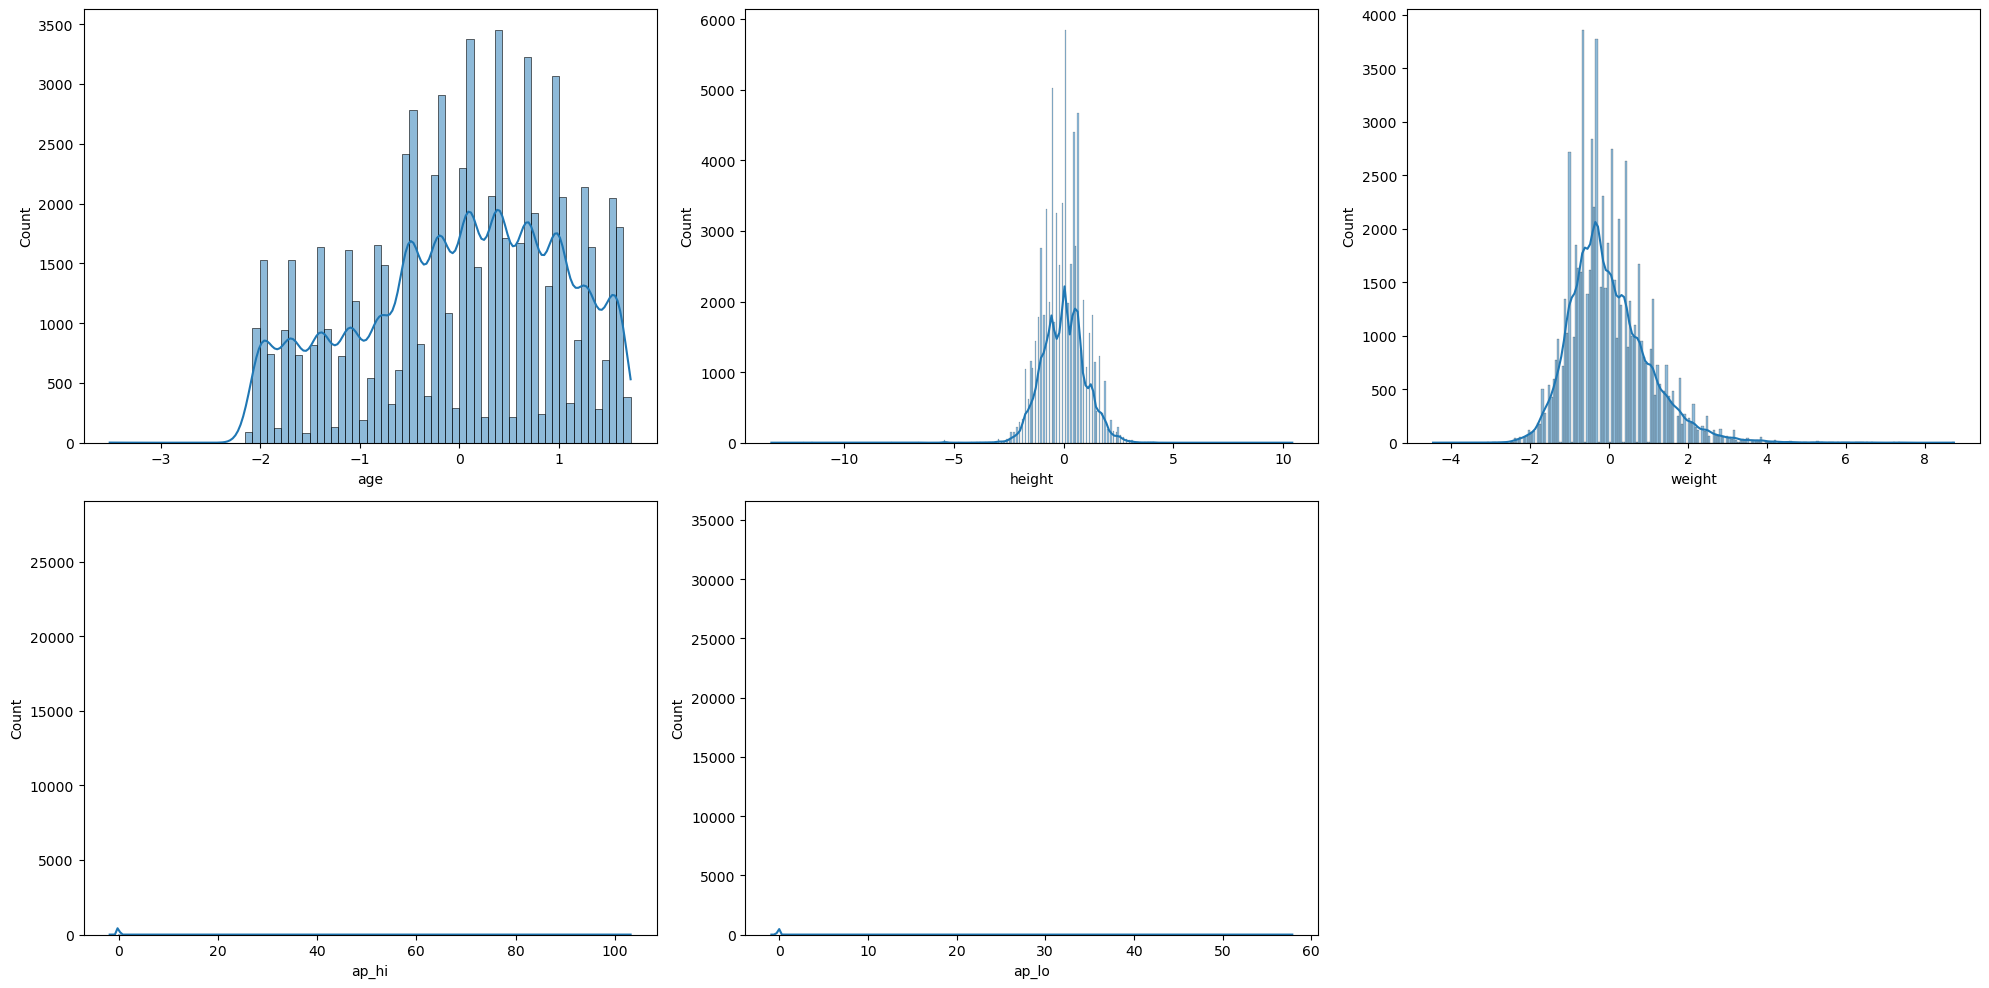

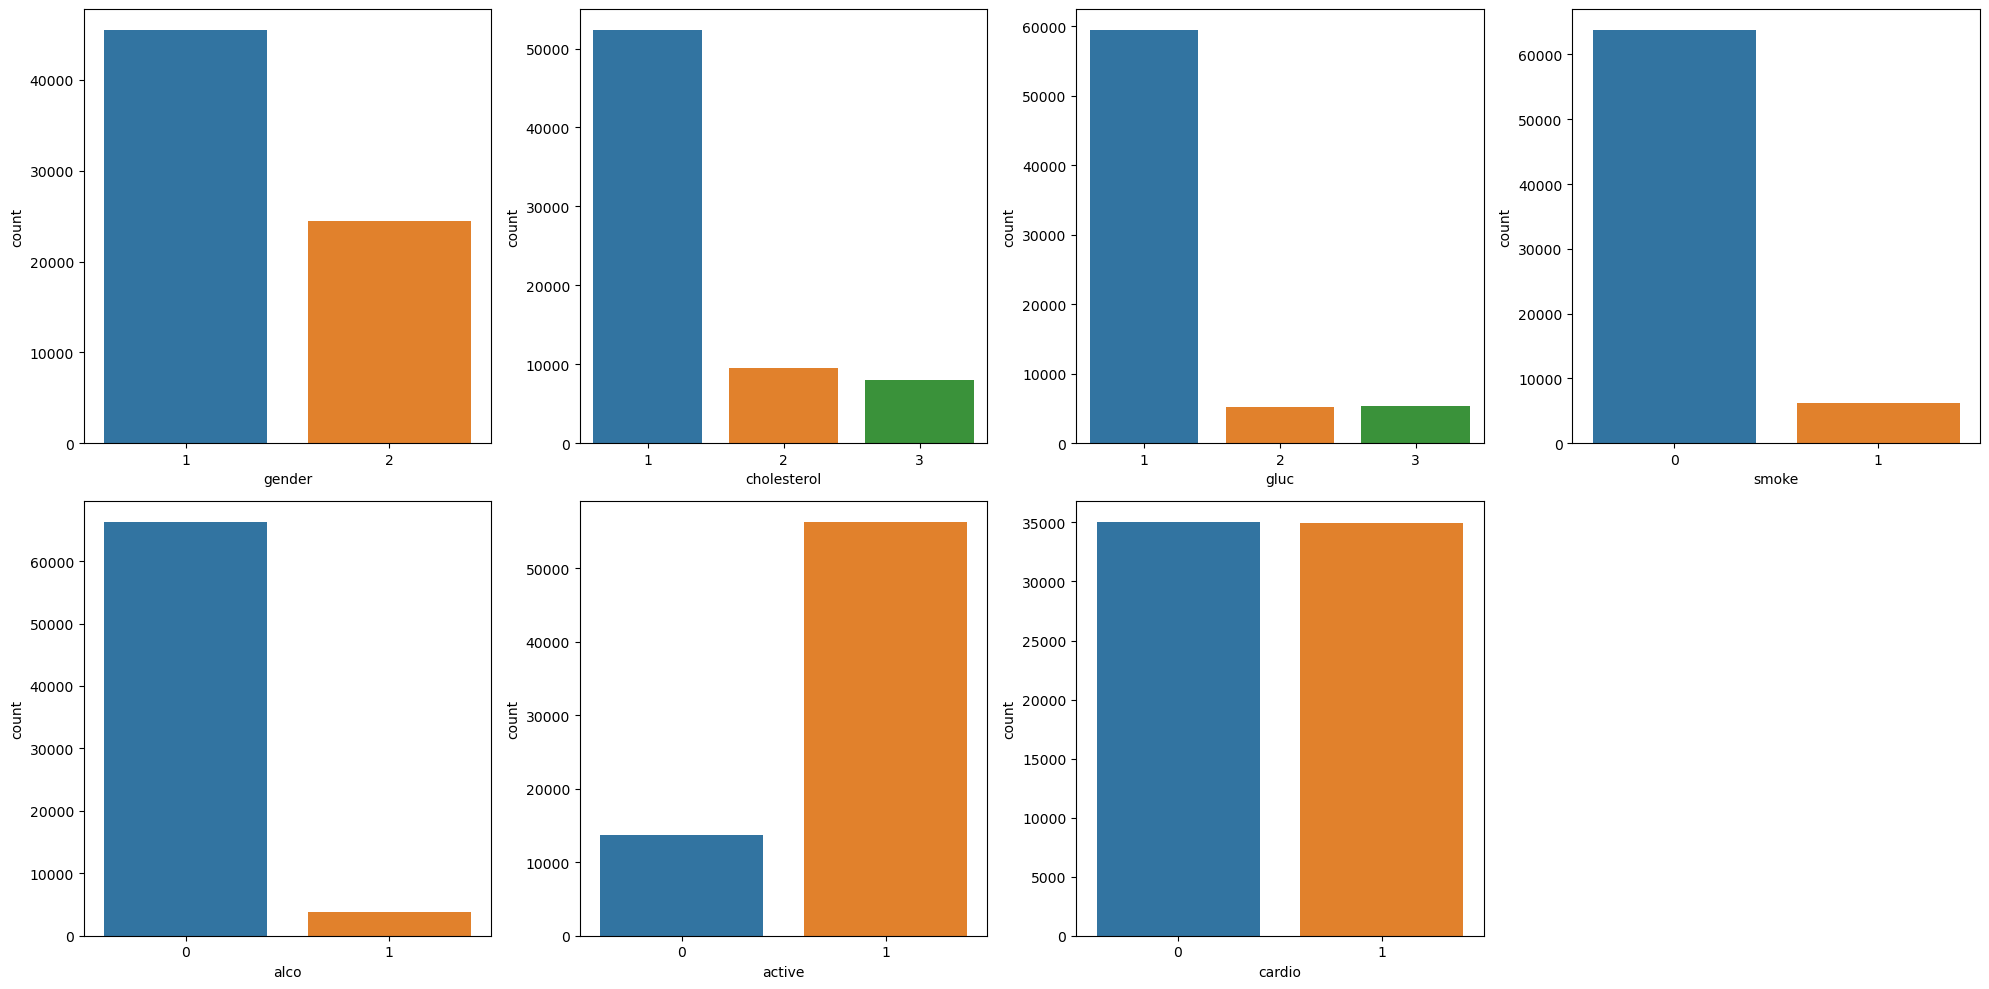

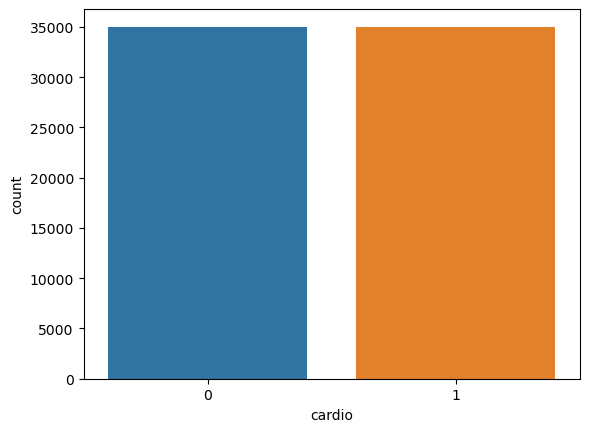

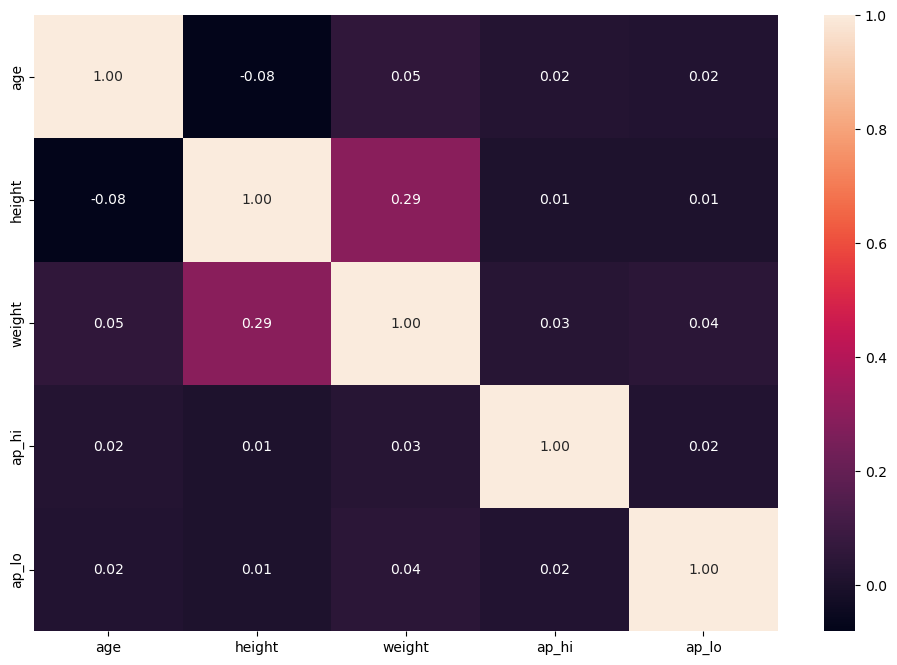

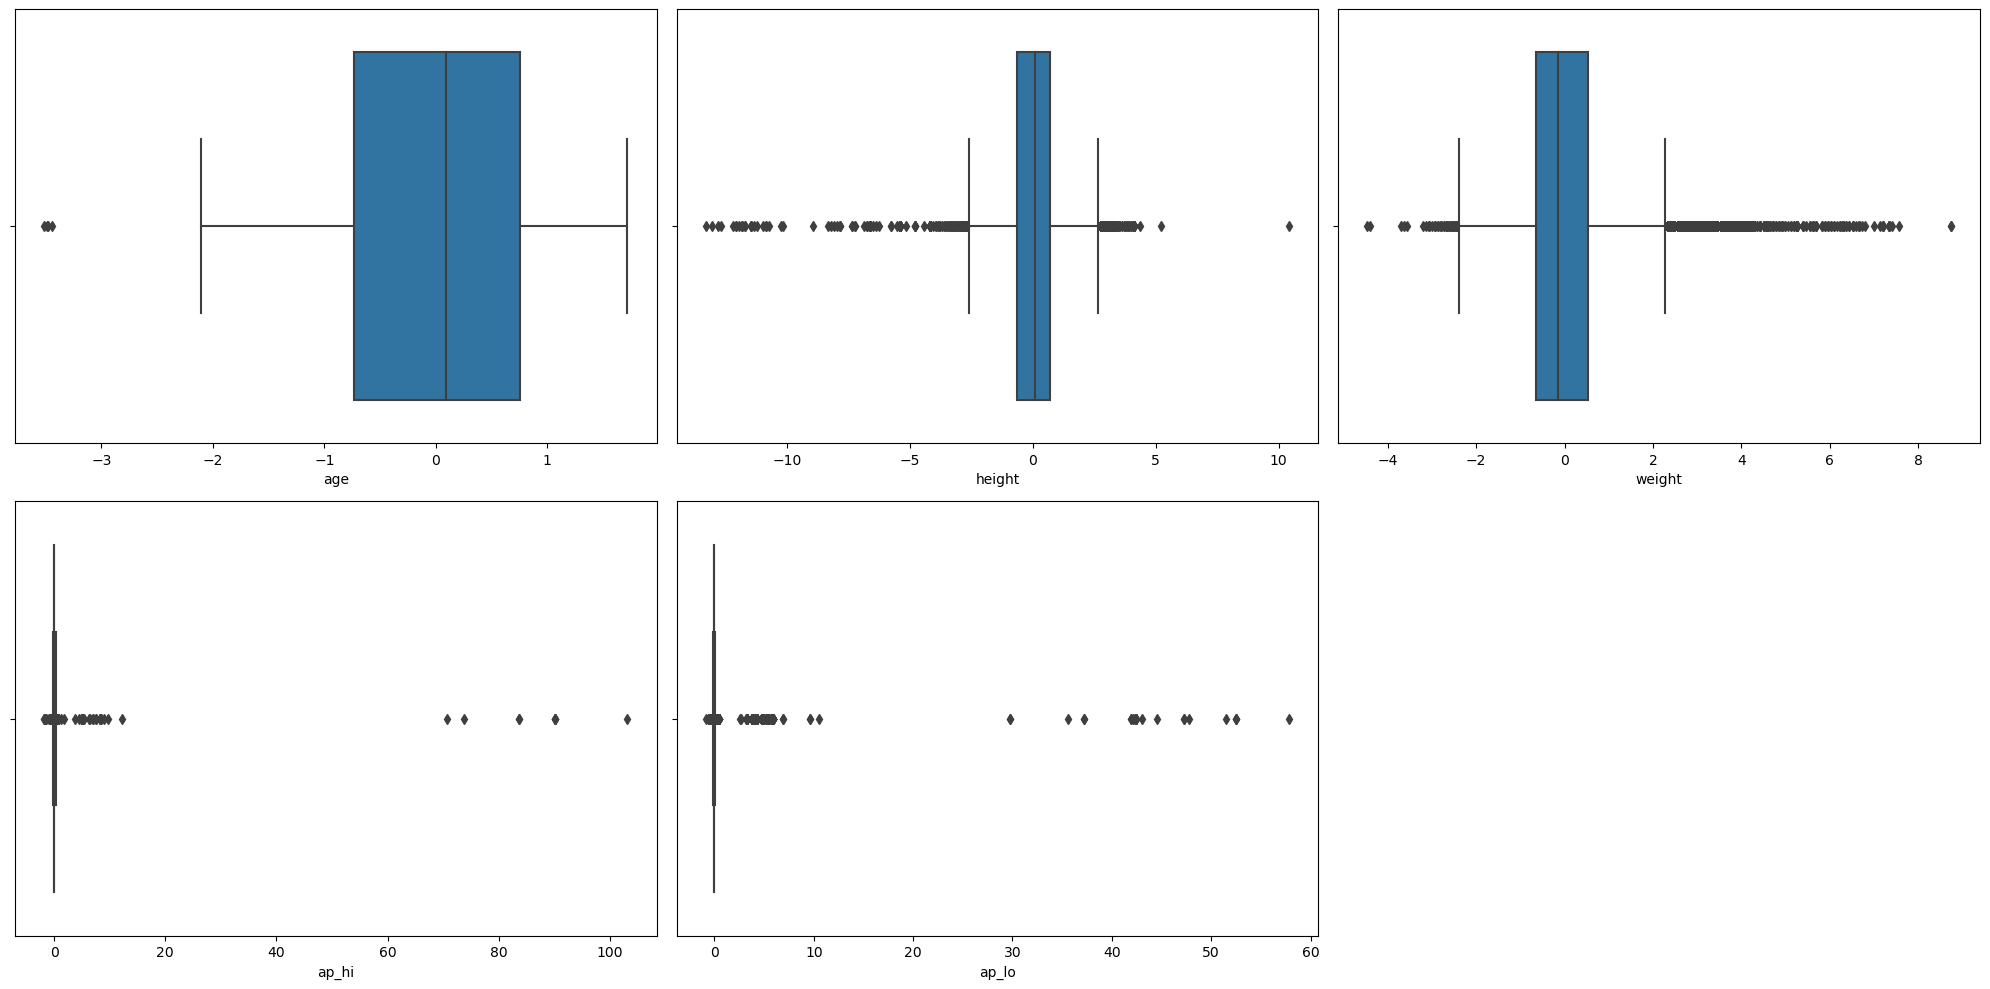

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
cardio_df = pd.read_csv('C:\\Users\\Ede\\Desktop\\Synthetic_Real_Data_Using_AE_VAE_Techniques\\master_thesis2024\\cardio.csv')
# lowerBackPains_Data_Path = 'C:\\Users\\Ede\\Desktop\\Synthetic_Real_Data_Using_AE_VAE_Techniques\\cardio.csv'
# Data Preprocessing

## Convert age from days to years
cardio_df['age'] = cardio_df['age'] / 365

## Convert certain features to categorical types if necessary
categorical_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
cardio_df[categorical_cols] = cardio_df[categorical_cols].astype('category')

## Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
cardio_df[scaled_cols] = scaler.fit_transform(cardio_df[scaled_cols])

# Exploratory Data Analysis

## Distribution of each feature
plt.figure(figsize=(20, 10))
for i, col in enumerate(scaled_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(cardio_df[col], kde=True)
plt.tight_layout()
plt.show()

## Distribution of categorical features
plt.figure(figsize=(20, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 4, i+1)
    sns.countplot(x=col, data=cardio_df)
plt.tight_layout()
plt.show()

## Target variable analysis
sns.countplot(x='cardio', data=cardio_df)
plt.show()

## Correlation analysis
plt.figure(figsize=(12, 8))
sns.heatmap(cardio_df.corr(), annot=True, fmt=".2f")
plt.show()

## Outliers identification
plt.figure(figsize=(20, 10))
for i, col in enumerate(scaled_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=cardio_df[col])
plt.tight_layout()
plt.show()


Statistical Summary for ap_hi and ap_lo:
              ap_hi         ap_lo
count  7.000000e+04  7.000000e+04
mean  -1.518658e-15 -7.473280e-16
std    1.000007e+00  1.000007e+00
min   -1.810381e+00 -8.841161e-01
25%   -5.725127e-02 -8.823850e-02
50%   -5.725127e-02 -8.823850e-02
75%    7.261016e-02 -3.517999e-02
max    1.031826e+02  5.785165e+01
Unique values in ap_hi: [-1.22181980e-01  7.26101623e-02  7.67944830e-03  1.37540876e-01
 -1.87112694e-01 -5.72512657e-02  1.05075519e-01  2.67402304e-01
  4.01448053e-02 -2.47859087e-02 -2.52043408e-01  3.32333018e-01
  2.02471590e-01  2.71586625e-02  3.97263732e-01 -3.16974122e-01
 -4.42651229e-02  2.60909233e-01 -1.82928373e-02  1.89485448e-01
  4.62194446e-01 -7.45516834e-01 -3.77720515e-02 -3.81904836e-01
  2.08964662e-01  1.18061662e-01 -8.97166227e-02  5.31309481e-02
  1.57020091e-01 -7.64996048e-01  1.24554734e-01 -1.54647337e-01
  5.92055874e-01 -6.37443371e-02  7.91032337e-02  2.34936947e-01
  2.28443876e-01 -7.58502977e-01 -3.12789801

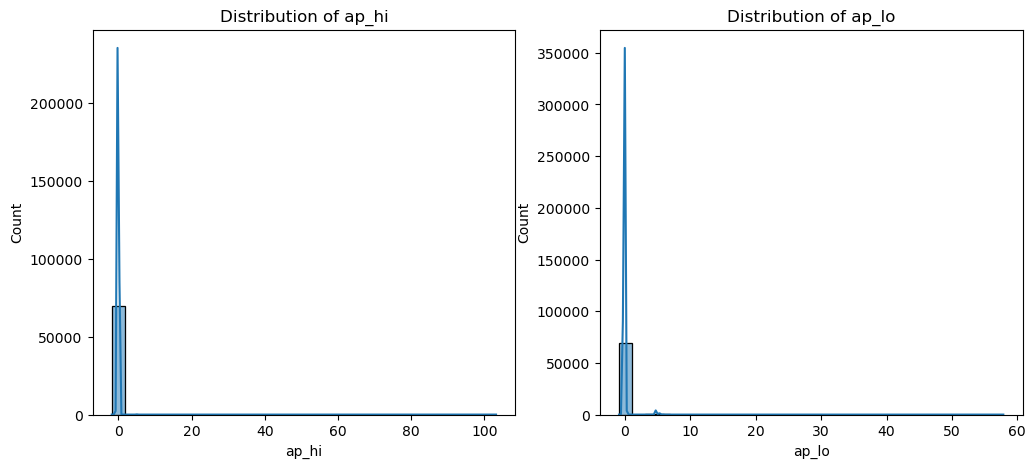

C:\Users\Ede\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


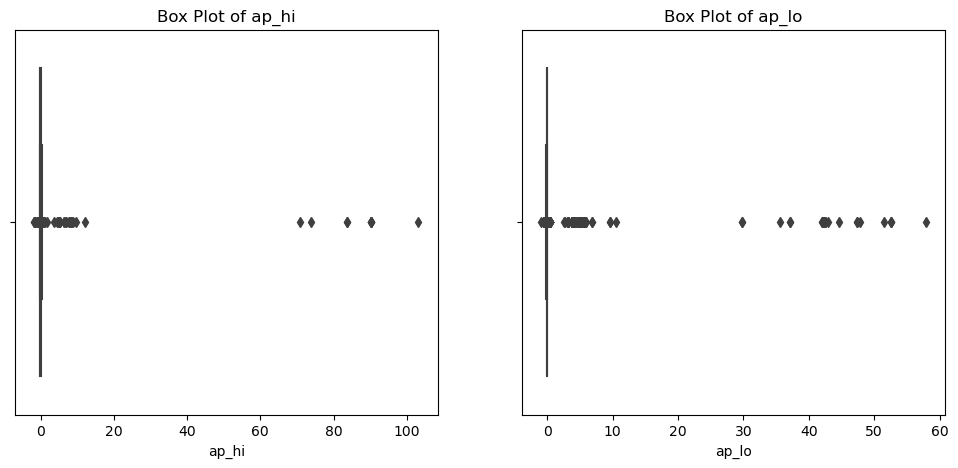

Value counts for ap_hi:
-0.057251    27699
 0.072610     9506
 0.007679     8961
-0.122182     8644
 0.137541     4450
 0.202472     3036
-0.187113     2581
-0.252043      982
 0.267402      717
 0.332333      695
Name: ap_hi, dtype: int64

Value counts for ap_lo:
-0.088238    34847
-0.035180    14316
-0.141297    10245
 0.017879     4082
-0.194356     2727
 4.793144      666
 0.070937      401
-0.093544      357
-0.061709      290
-0.114768      211
Name: ap_lo, dtype: int64


In [4]:
# Step 1: Basic Statistical Summary
# First, let's look at the basic statistical summary of these features to understand their range, mean, standard deviation, etc.
print("Statistical Summary for ap_hi and ap_lo:")
print(cardio_df[['ap_hi', 'ap_lo']].describe())

# Step 2: Checking for Unique Values
# It's helpful to see the unique values these features hold. This can give us insights into any potential erroneous data entries.
print("Unique values in ap_hi:", cardio_df['ap_hi'].unique())
print("Unique values in ap_lo:", cardio_df['ap_lo'].unique())

# Step 3: Visualizing Distribution
# Visualizing the distribution of these features can help us understand their spread and detect any anomalies.
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting histograms for ap_hi and ap_lo
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(cardio_df['ap_hi'], kde=True, bins=30)
plt.title('Distribution of ap_hi')

plt.subplot(1, 2, 2)
sns.histplot(cardio_df['ap_lo'], kde=True, bins=30)
plt.title('Distribution of ap_lo')
plt.show()

# Step 4: Identifying Outliers
# Box plots can be effective in visualizing outliers.

# Box plots for ap_hi and ap_lo
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(cardio_df['ap_hi'])
plt.title('Box Plot of ap_hi')

plt.subplot(1, 2, 2)
sns.boxplot(cardio_df['ap_lo'])
plt.title('Box Plot of ap_lo')
plt.show()

# Step 5: Checking Value Counts
# Understanding the frequency of different values can reveal any data entry issues.
print("Value counts for ap_hi:")
print(cardio_df['ap_hi'].value_counts().head(10)) # Displaying top 10 most frequent values

print("\nValue counts for ap_lo:")
print(cardio_df['ap_lo'].value_counts().head(10)) # Displaying top 10 most frequent values

# These steps will provide a comprehensive overview of the ap_hi and ap_lo features,
# allowing us to decide if any data cleaning, transformation, or scaling is necessary.
# Keep in mind that the range of normal blood pressure values is well established in medical literature,
# and any significant deviation might indicate data quality issues.

Extreme values in ap_hi: []
Extreme values in ap_lo: []


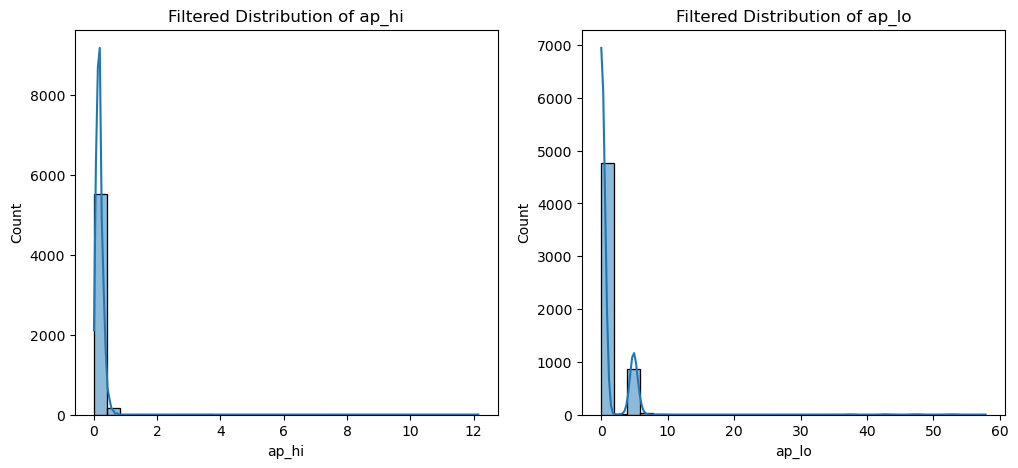

C:\Users\Ede\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


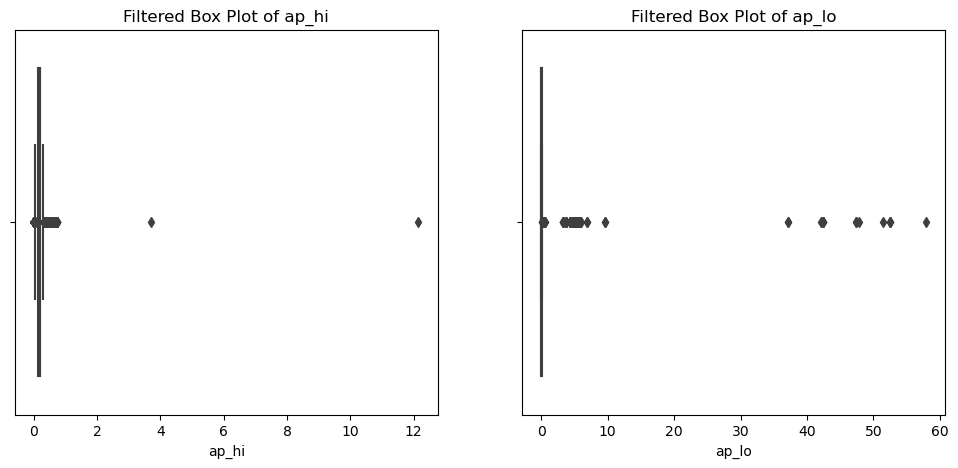

Statistical Summary for Filtered ap_hi and ap_lo:
             ap_hi        ap_lo
count  5681.000000  5681.000000
mean      0.184894     0.928102
std       0.196201     2.964357
min       0.007679     0.001961
25%       0.137541     0.017879
50%       0.202472     0.017879
75%       0.202472     0.070937
max      12.149723    57.851653


In [5]:
# Step 1: Identifying Extreme Values
# First, identify extreme values that are biologically implausible for blood pressure readings.
print("Extreme values in ap_hi:", cardio_df[cardio_df['ap_hi'] > 200]['ap_hi'].unique())
print("Extreme values in ap_lo:", cardio_df[cardio_df['ap_lo'] > 200]['ap_lo'].unique())

# Step 2: Filtering the Data
# Consider removing values that are physiologically impossible (e.g., systolic blood pressure above 200 mmHg or diastolic blood pressure above 120 mmHg).
filtered_df = cardio_df[(cardio_df['ap_hi'] > 0) & (cardio_df['ap_hi'] <= 200) & 
                        (cardio_df['ap_lo'] > 0) & (cardio_df['ap_lo'] <= 120)]

# Step 3: Re-evaluating the Distribution
# After filtering, re-examine the distribution of these features.
# Plotting histograms for ap_hi and ap_lo after filtering
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(filtered_df['ap_hi'], kde=True, bins=30)
plt.title('Filtered Distribution of ap_hi')

plt.subplot(1, 2, 2)
sns.histplot(filtered_df['ap_lo'], kde=True, bins=30)
plt.title('Filtered Distribution of ap_lo')
plt.show()

# Step 4: Re-visualizing Outliers
# Check the box plots again after filtering to see if the distribution appears more normal.
# Box plots for ap_hi and ap_lo after filtering
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(filtered_df['ap_hi'])
plt.title('Filtered Box Plot of ap_hi')

plt.subplot(1, 2, 2)
sns.boxplot(filtered_df['ap_lo'])
plt.title('Filtered Box Plot of ap_lo')
plt.show()

# Step 5: Re-assessing the Statistical Summary
# Finally, look at the statistical summary of the filtered data.
print("Statistical Summary for Filtered ap_hi and ap_lo:")
print(filtered_df[['ap_hi', 'ap_lo']].describe())

# These steps should help in understanding the distribution of ap_hi and ap_lo better and ensuring that the values are within a reasonable range for blood pressure readings.
# It's crucial in data preprocessing to ensure that the data you're working with is accurate and reflective of real-world measurements, especially in healthcare-related datasets.
#
#

Extreme values in ap_hi: [  5.02033057   5.04630285   5.06578207  73.83390127   8.38374155
   3.71522322   8.90318727   5.05279593  90.19644119   8.25388013
   9.68235583   6.50075085 103.18258399   6.96825199   4.39699571
   7.60457299   8.31231777  70.71722699   5.39692871  83.63843908
   6.37088942   6.9877312   12.14972297]
Extreme values in ap_lo: [ 5.32372941  4.79314432  3.73197414  4.9682374   4.79845017  5.8543145
 52.54580235 42.167558    5.02660176 47.77053654  4.27317093  4.83559113
 10.56591009  3.74258585 41.93410056  4.90987304  3.99726669  3.24383586
 47.29831582  4.85150868  4.83028528  5.73227993 37.15883476  3.24914171
 44.58702601  5.37678792 42.4593798   5.2600592   5.20169484  5.42984643
  5.45637568 42.46468565  3.25444756 29.73064351 42.35326278  5.38209377
  4.80906187  9.56841012  3.7797268   3.73727999  4.80375602  3.78503265
 37.15352891 57.85165324 51.48463217 42.99527074  5.5306576   3.83809116
  6.91548468  4.26255923 35.56707949  3.20138905  5.32903526  

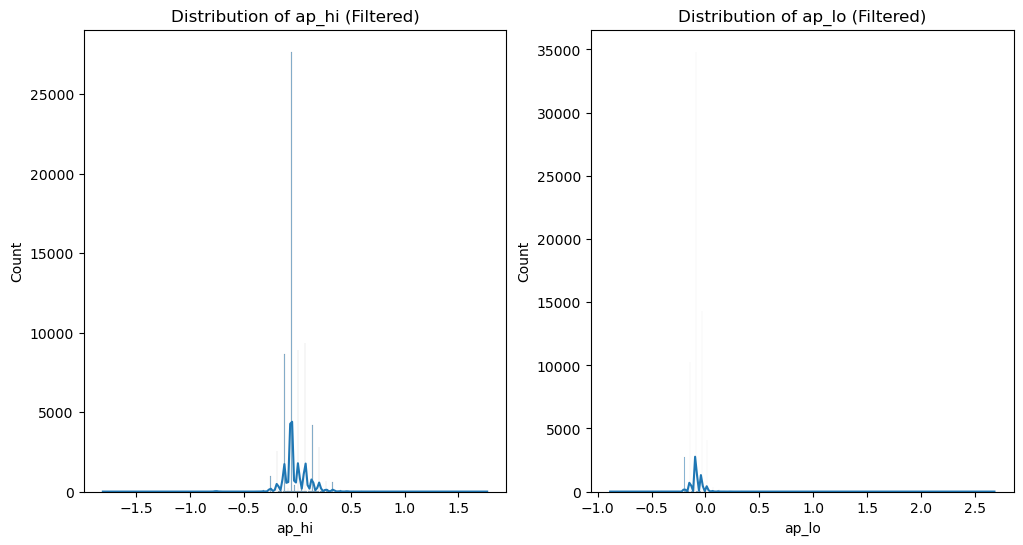

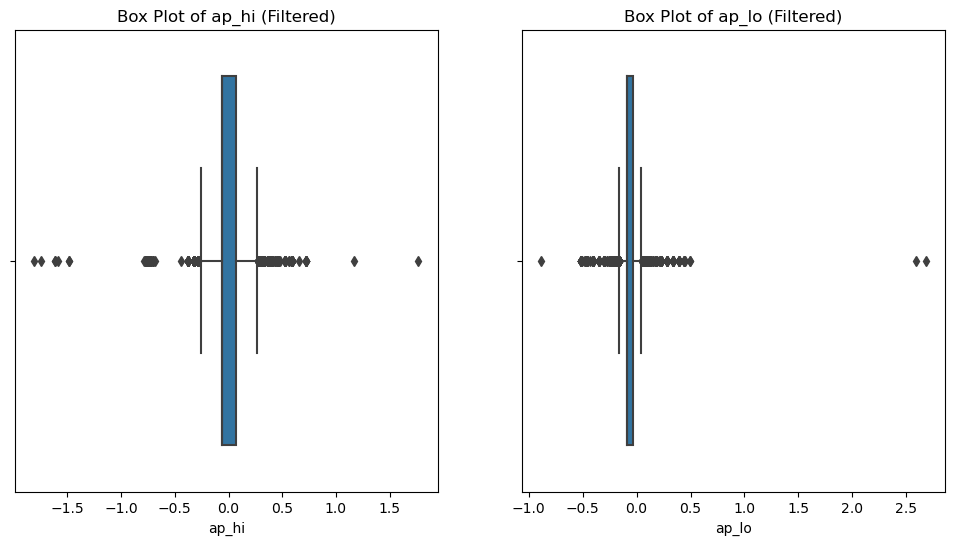

Statistical Summary for Filtered ap_hi and ap_lo:
              ap_hi         ap_lo
count  69011.000000  69011.000000
mean      -0.016340     -0.081101
std        0.116459      0.054497
min       -1.810381     -0.884116
25%       -0.057251     -0.088238
50%       -0.057251     -0.088238
75%        0.072610     -0.035180
max        1.767302      2.681416


In [6]:
# Step 3: Investigate Extreme Values
# Examine the extreme values more closely to understand their impact on the data. 
# Look for values that are several standard deviations away from the mean.
# Identifying extreme values in ap_hi and ap_lo
extreme_values_ap_hi = cardio_df[cardio_df['ap_hi'] > 3]['ap_hi']
extreme_values_ap_lo = cardio_df[cardio_df['ap_lo'] > 3]['ap_lo']

print("Extreme values in ap_hi:", extreme_values_ap_hi.unique())
print("Extreme values in ap_lo:", extreme_values_ap_lo.unique())


# Step 4: Visualizing Distributions with Extreme Values Removed
# If the extreme values are not biologically plausible, 
# consider removing them and re-plotting the distributions.
# Filter out extreme values
filtered_cardio_df = cardio_df[(cardio_df['ap_hi'] <= 3) & (cardio_df['ap_lo'] <= 3)]

# Re-plot histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(filtered_cardio_df['ap_hi'], kde=True)
plt.title('Distribution of ap_hi (Filtered)')

plt.subplot(1, 2, 2)
sns.histplot(filtered_cardio_df['ap_lo'], kde=True)
plt.title('Distribution of ap_lo (Filtered)')
plt.show()

# Step 5: Box Plot Analysis (Post-filtering)
# After filtering, re-examine the box plots to check for outliers.
# Box plots after filtering
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=filtered_cardio_df['ap_hi'])
plt.title('Box Plot of ap_hi (Filtered)')

plt.subplot(1, 2, 2)
sns.boxplot(x=filtered_cardio_df['ap_lo'])
plt.title('Box Plot of ap_lo (Filtered)')
plt.show()

# Step 6: Reassess Statistical Summary
# Finally, reassess the statistical summary of these features after the adjustments.
print("Statistical Summary for Filtered ap_hi and ap_lo:")
print(filtered_cardio_df[['ap_hi', 'ap_lo']].describe())

# These steps should provide a clearer understanding of the ap_hi and ap_lo features, ensuring that their distributions are more representative of typical blood pressure readings.
# This analysis is crucial, especially in a healthcare context, where accurate and realistic data are vital for meaningful insights.
#

# RE-DATA VISUALIZING AFTER REMOVING OUTLIERS

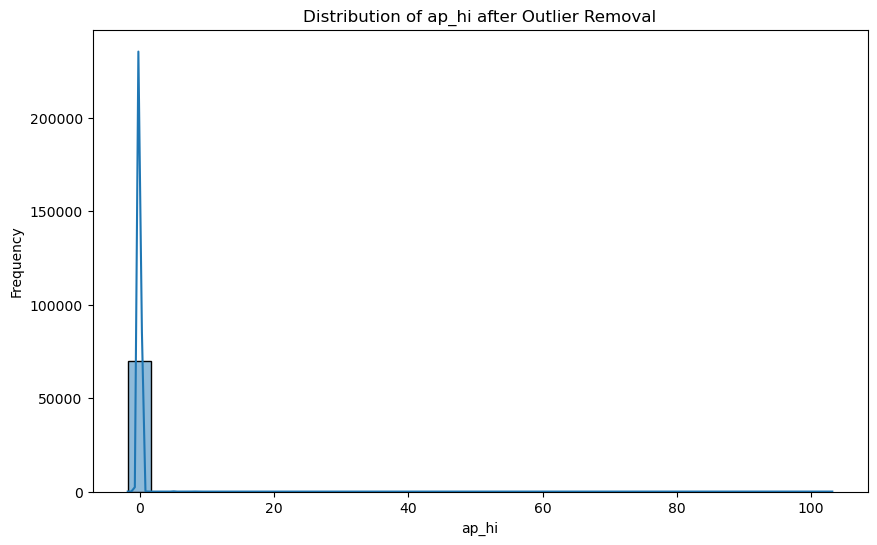

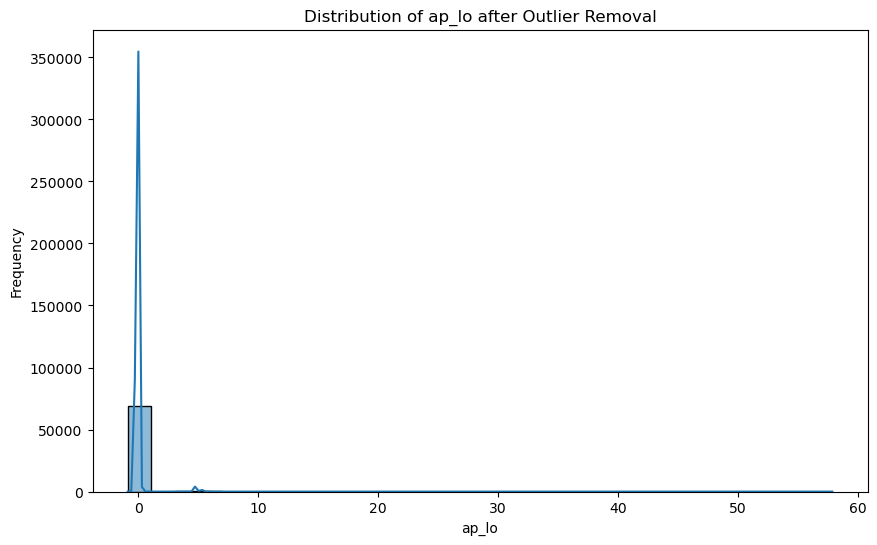

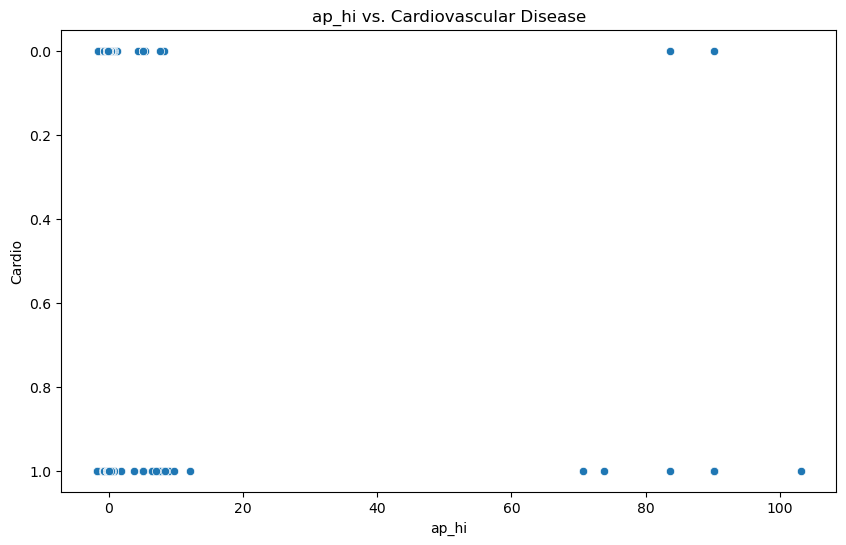

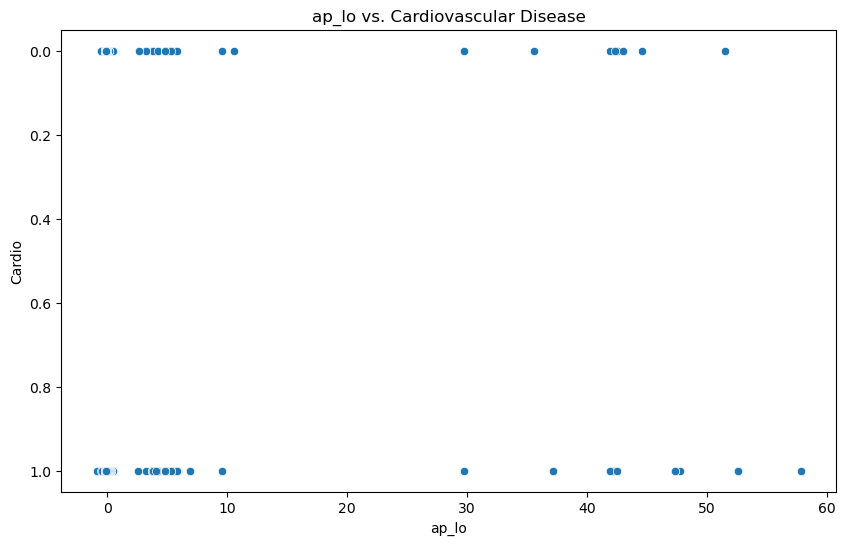

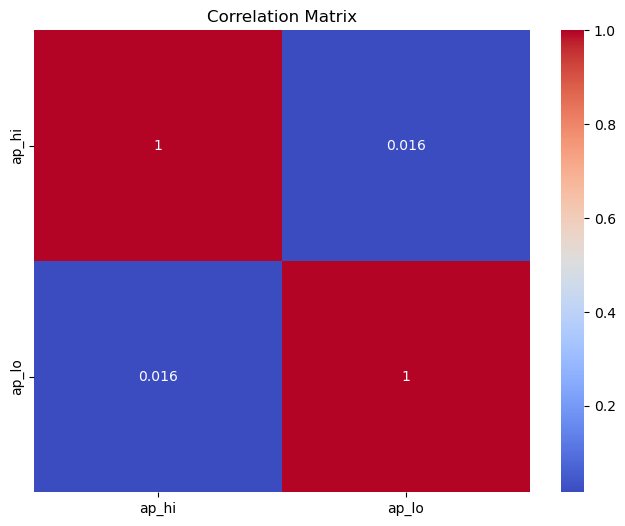

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming cardio_df is your DataFrame after outlier removal

# 1. Data Visualization

# Histogram for ap_hi
plt.figure(figsize=(10, 6))
sns.histplot(cardio_df['ap_hi'], bins=30, kde=True)
plt.title('Distribution of ap_hi after Outlier Removal')
plt.xlabel('ap_hi')
plt.ylabel('Frequency')
plt.show()

# Histogram for ap_lo
plt.figure(figsize=(10, 6))
sns.histplot(cardio_df['ap_lo'], bins=30, kde=True)
plt.title('Distribution of ap_lo after Outlier Removal')
plt.xlabel('ap_lo')
plt.ylabel('Frequency')
plt.show()

# 2. Relationship Analysis

# Scatter plot for ap_hi vs. cardio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ap_hi', y='cardio', data=cardio_df)
plt.title('ap_hi vs. Cardiovascular Disease')
plt.xlabel('ap_hi')
plt.ylabel('Cardio')
plt.show()

# Scatter plot for ap_lo vs. cardio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ap_lo', y='cardio', data=cardio_df)
plt.title('ap_lo vs. Cardiovascular Disease')
plt.xlabel('ap_lo')
plt.ylabel('Cardio')
plt.show()

# Correlation analysis
correlation_matrix = cardio_df[['ap_hi', 'ap_lo', 'cardio']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# STEP 2B: DATA PREPARATION AND PREPROCESSING

In [10]:
# Data Normalization
# from sklearn.preprocessing import StandardScaler

# Columns to normalize
# columns_to_normalize = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Standard Scaler for normalization
# scaler = StandardScaler()

# Apply normalization on the dataset
# cardio_df[columns_to_normalize] = scaler.fit_transform(cardio_df[columns_to_normalize])

#  Splitting the Dataset
# We'll split the dataset into a training set and a testing set.
# from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
# X_train2, X_test2 = train_test_split(cardio_df, test_size=0.2, random_state=42)

# Confirm the shape of X_train and X_test
# print("Shape of X_train2:", X_train2.shape)  # Should be (samples, 12)
# print("Shape of X_test2:", X_test2.shape)  # Should be (samples, 12)

In [6]:
cardio_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,-0.436062,2,0.443452,-0.847873,-0.122182,-0.088238,1,1,0,0,1,0
1,0.307686,1,-1.018168,0.749831,0.072610,-0.035180,3,1,0,0,1,1
2,-0.247997,1,0.078047,-0.708942,0.007679,-0.141297,3,1,0,0,0,1
3,-0.748152,2,0.565254,0.541435,0.137541,0.017879,1,1,0,0,1,1
4,-0.808543,1,-1.018168,-1.264666,-0.187113,-0.194356,1,1,0,0,0,0


In [13]:
cardio_df.tail()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,-0.092762,2,0.443452,0.124642,-0.057251,-0.088238,1,1,1,0,1,0
69996,1.269492,1,-0.774565,3.597913,0.072610,-0.035180,2,2,0,0,1,1
69997,-0.163286,2,2.270477,2.139139,0.332333,-0.035180,3,1,0,1,0,1
69998,1.200589,1,-0.165556,-0.153219,0.040145,-0.088238,1,2,0,0,0,1
69999,0.434144,1,0.687055,-0.153219,-0.057251,-0.088238,2,1,0,0,1,0


In [14]:
# Check for missing values
cardio_df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [15]:
# Assuming 'Class_att' is your target column with binary classes 0 and 1
class_counts = cardio_df['cardio'].value_counts()
total_counts = len(cardio_df)

# Calculate class percentages
class_percentages = (class_counts / total_counts) * 100

# Print class percentages
print("Class Percentages:")
print(class_percentages)

# Check if the data is imbalanced
if abs(class_percentages[0] - class_percentages[1]) > 20:  # You can adjust this threshold
    print("\nThe dataset is imbalanced.")
else:
    print("\nThe dataset is balanced.")

Class Percentages:
0    50.03
1    49.97
Name: cardio, dtype: float64

The dataset is balanced.


In [11]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          70000 non-null  float64 
 1   gender       70000 non-null  category
 2   height       70000 non-null  float64 
 3   weight       70000 non-null  float64 
 4   ap_hi        70000 non-null  float64 
 5   ap_lo        70000 non-null  float64 
 6   cholesterol  70000 non-null  category
 7   gluc         70000 non-null  category
 8   smoke        70000 non-null  category
 9   alco         70000 non-null  category
 10  active       70000 non-null  category
 11  cardio       70000 non-null  category
dtypes: category(7), float64(5)
memory usage: 3.1 MB


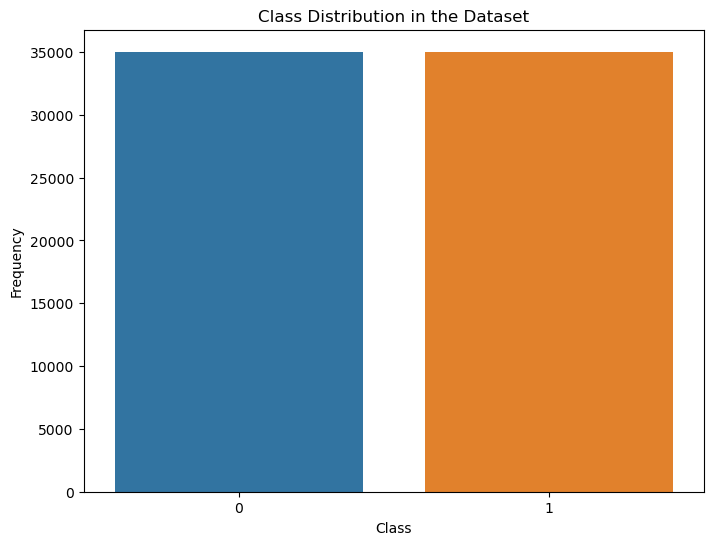

In [16]:
# Assuming 'Class_att' is your target column
class_counts = cardio_df['cardio'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution in the Dataset')
plt.show()

# Preamble

Prior to synthetic data generation, data preprocessing steps were meticulously applied to each dataset, ensuring data cleanliness, normalization, and partitioning into the said two main component data. The original dataset, comprising 80% of the total data, served as the foundation for generating synthetic data. In contrast, the remaining 20%, referred to as control data, was reserved for evaluating both the privacy risks associated with the synthetic dataset and the utility as well.

# Ensuring Privacy Preservation and Data Utility
1. Privacy Preservation: By using an autoencoder to generate synthetic data, we minimize the risk of exposing original data entries. The classifier's role is solely to provide labels for synthetic instances, further abstracting the process from direct data duplication.

2. Data Utility: The utility of the synthetic data is maintained through the autoencoder's ability to capture and replicate the complex relationships in the original data. The trained classifier ensures that synthetic data receives labels that are consistent with the learned patterns, making the synthetic dataset useful for downstream tasks.


# Purpose of the Control Dataset
1. Benchmarking Privacy Leakage: The control dataset (control_data_df) is used to differentiate what an attacker learns purely from the synthetic dataset's utility versus what constitutes an actual privacy leak. By comparing the success of attacks on the control dataset against those on the original dataset, one can more accurately assess the extent of privacy risk.

2. Ensuring Fair Evaluation: It ensures that the assessment accounts for the possibility that the synthetic dataset might inadvertently reveal specific patterns or information that could lead to re-identification or information inference not due to the inherent utility of the synthetic data but due to direct data leakage.

# Creating a Control Dataset
The control dataset should consist of records that are not included in the synthetic dataset's generation process. Here's how to create or obtain a control dataset:

1. Splitting Original Data: Before generating your synthetic dataset, split your original dataset into two parts. One part is used to generate the synthetic dataset (original_data_df), and the other part serves as the control dataset (control_data_df). This way, the control dataset contains real data points that were not used to train the model creating the synthetic data, ensuring they share similar distributions without direct overlaps.



# Anonymeter Tool
Anonymeter’s development as an open-source tool underlines Anonos’s commitment to enhancing privacy technologies’ accessibility. It is crafted to be adaptable, ensuring it remains relevant amid evolving privacy regulations and research advancements. The Anonymeter framework plays a pivotal role in the field of synthetic data by providing a structured approach to evaluate and mitigate privacy risks. By assessing singling-out, linkability, and inference risks, Anonymeter helps researchers and practitioners balance the trade-offs between maintaining data utility and ensuring privacy. This is particularly relevant in the era of big data and machine learning, where the use of synthetic data is becoming increasingly prevalent. For more information on this tool, including its installation and configurations, do visit their website and github via the links below.

https://www.anonos.com/blog/presenting-anonymeter-the-tool-for-assessing-privacy-risks-in-synthetic-datasets

https://github.com/statice/anonymeter


# Partioning the Original Data () into 80% and 20% respectiively as shown below

In [8]:
cardiovascular_train_dataframe, control_cardio_dataframe = train_test_split(cardio_df, test_size=0.2, random_state=42)

In [9]:
cardiovascular_train_dataframe.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
47339,0.975641,1,-1.261771,0.402504,0.007679,-0.035180,2,1,0,0,1,1
67456,-1.115365,2,-0.287358,-0.292150,0.072610,-0.035180,1,1,0,0,0,1
12308,0.672467,2,1.174262,1.236089,0.137541,0.017879,1,1,0,0,1,1
32557,1.579556,2,1.052460,0.124642,-0.057251,-0.077627,1,1,0,0,1,1
664,0.329168,1,-0.530961,-0.986804,-0.057251,-0.088238,1,1,0,0,1,0


In [10]:
cardiovascular_train_dataframe.tail()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
37194,-1.405568,2,0.687055,0.055177,0.137541,-0.088238,1,1,1,0,1,1
6265,1.515922,2,-0.287358,-0.083754,0.202472,-0.035180,1,1,0,0,1,1
54886,1.669941,1,0.565254,-0.014288,-0.057251,-0.088238,1,1,0,0,1,0
860,-0.503343,1,0.321650,-0.292150,-0.057251,-0.088238,1,1,0,0,0,0
15795,-1.765080,2,1.539667,-0.708942,-0.057251,-0.088238,1,1,0,0,1,0


In [11]:
control_cardio_dataframe.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
46730,0.932678,1,-1.018168,-0.708942,0.072610,-0.088238,2,1,0,0,1,1
48393,0.975641,1,0.687055,0.749831,0.202472,-0.035180,1,1,0,0,1,1
41416,1.540646,1,-1.627176,1.097158,0.007679,-0.088238,1,1,0,0,1,1
34506,0.110299,1,-0.652763,1.583416,-0.057251,-0.088238,1,1,0,0,1,1
43725,-0.435251,1,-0.043755,-0.431081,-0.057251,-0.088238,1,1,0,0,1,0


In [12]:
# Assuming 'Class_att' is your target column with binary classes 0 and 1
class_counts = cardiovascular_train_dataframe['cardio'].value_counts()
total_counts = len(cardiovascular_train_dataframe)
print(total_counts) 

56000


In [13]:
# Verify encoding
cardiovascular_train_dataframe['cardio'].head()

47339    1
67456    1
12308    1
32557    1
664      0
Name: cardio, dtype: category
Categories (2, int64): [0, 1]

In [14]:
cardiovascular_train_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56000 entries, 47339 to 15795
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          56000 non-null  float64 
 1   gender       56000 non-null  category
 2   height       56000 non-null  float64 
 3   weight       56000 non-null  float64 
 4   ap_hi        56000 non-null  float64 
 5   ap_lo        56000 non-null  float64 
 6   cholesterol  56000 non-null  category
 7   gluc         56000 non-null  category
 8   smoke        56000 non-null  category
 9   alco         56000 non-null  category
 10  active       56000 non-null  category
 11  cardio       56000 non-null  category
dtypes: category(7), float64(5)
memory usage: 2.9 MB


In [15]:
control_cardio_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14000 entries, 46730 to 63452
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          14000 non-null  float64 
 1   gender       14000 non-null  category
 2   height       14000 non-null  float64 
 3   weight       14000 non-null  float64 
 4   ap_hi        14000 non-null  float64 
 5   ap_lo        14000 non-null  float64 
 6   cholesterol  14000 non-null  category
 7   gluc         14000 non-null  category
 8   smoke        14000 non-null  category
 9   alco         14000 non-null  category
 10  active       14000 non-null  category
 11  cardio       14000 non-null  category
dtypes: category(7), float64(5)
memory usage: 752.8 KB


In [16]:
# Verify encoding
control_cardio_dataframe['cardio'].head()

46730    1
48393    1
41416    1
34506    1
43725    0
Name: cardio, dtype: category
Categories (2, int64): [0, 1]

# SAVING THE PARTITIONED DATASETS TO CSV FOR FUTURE USE

In [10]:
control_cardio_dataframe.to_csv(r'C:\Users\Ede\Desktop\Synthetic_Real_Data_Using_AE_VAE_Techniques\master_thesis2024\control_cardio_dataframe.csv', index=False)

In [11]:
cardiovascular_train_dataframe.to_csv(r'C:\Users\Ede\Desktop\Synthetic_Real_Data_Using_AE_VAE_Techniques\master_thesis2024\cardiovascular_train_dataframe.csv', index=False)

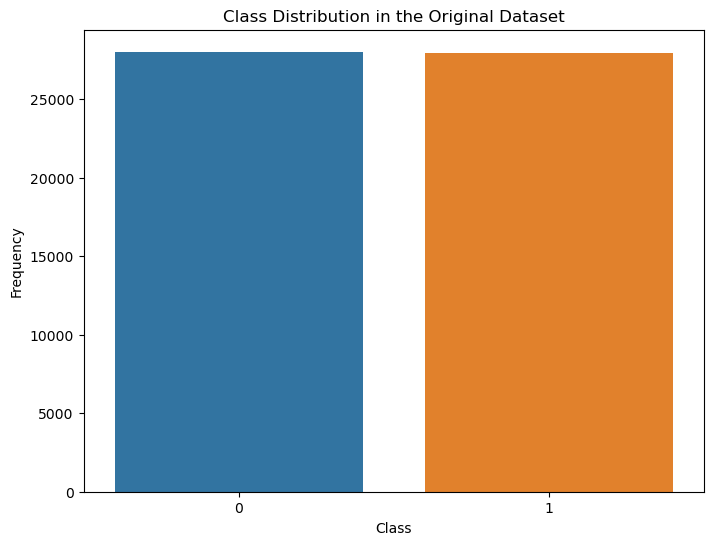

In [17]:
import matplotlib.pyplot as plt
# Assuming 'Class_att' is your target column
class_counts = cardiovascular_train_dataframe['cardio'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution in the Original Dataset')
plt.show()

# STEP 3: DEFINING AND TRAINING AUTO-ENCODER MODEL, AND GENERATE THE RELEVANT SYNTHETIC DATASET THAT MIMICS ORIGINAL DATA

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Separate features and target
features = cardiovascular_train_dataframe.drop('cardio', axis=1)
labels = cardiovascular_train_dataframe['cardio']

# Apply SMOTE to balance the dataset
# smote = SMOTE(random_state=42)
# features_smote, labels_smote = smote.fit_resample(features, labels)

# Split the balanced dataset into training and testing sets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(features, labels, test_size=0.2, random_state=42)

# We Normalize features 
scaler = MinMaxScaler()
X_train_orig_scaled = scaler.fit_transform(X_train_orig)
X_test_orig_scaled = scaler.transform(X_test_orig)

# Add noise for autoencoder training
noise_factor = 0.05
X_train_noisy = X_train_orig_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train_orig_scaled.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)

# Define and compile Autoencoder architecture
input_dim = X_train_orig_scaled.shape[1]

# Encoder
input_layer = Input(shape=(input_dim,))
encoder = Dense(24, activation="relu")(input_layer)
encoder = Dense(12, activation="relu")(encoder)

# Bottleneck
bottleneck = Dense(12, activation="relu")(encoder)

# Decoder
decoder = Dense(12, activation="relu")(bottleneck)
decoder = Dense(24, activation="relu")(decoder)
decoder = Dense(input_dim, activation="sigmoid")(decoder)

# Autoencoder
autoencoder_cardiovascular = Model(inputs=input_layer, outputs=decoder)
autoencoder_cardiovascular.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the autoencoder with noisy Data
autoencoder_cardiovascular.fit(X_train_noisy, X_train_orig_scaled, epochs=1000, batch_size=256, validation_split=0.2, verbose=2)

# Generate synthetic features from the entire original dataset scaled
synthetic_features_scaled = autoencoder_cardiovascular.predict(scaler.transform(features))

# Ensure synthetic data matches the original data's scale
# # Normalize synthetic data or features to original data range
synthetic_features = scaler.inverse_transform(synthetic_features_scaled)

# Train a classifier on the original dataset
# we'll use a simple RandomForestClassifier, which is a good starting point 
# for many classification tasks due to its versatility and ease of use
classifier = RandomForestClassifier(n_estimators=250, random_state=42)
classifier.fit(X_train_orig, y_train_orig)

# Predict labels for the synthetic features
# After training the classifier on the original data, we'll 
# use it to predict labels for the synthetic data generated from the autoencoder.
synthetic_labels_predicted = classifier.predict(synthetic_features)

# Convert synthetic features to a DataFrame
ae_synthetic_data_df = pd.DataFrame(synthetic_features, columns=features.columns)

# Convert predicted labels into a Series (assuming 'labels' is the name of your target variable)
ae_synthetic_labels_series = pd.Series(synthetic_labels_predicted, name='cardio') # , name='NObeyesdad'

# Example usage
print(ae_synthetic_data_df.head())
print(ae_synthetic_labels_series.head())


Epoch 1/1000

140/140 - 2s - loss: 0.0941 - val_loss: 0.0471 - 2s/epoch - 11ms/step
Epoch 2/1000
140/140 - 0s - loss: 0.0300 - val_loss: 0.0146 - 358ms/epoch - 3ms/step
Epoch 3/1000
140/140 - 0s - loss: 0.0129 - val_loss: 0.0114 - 399ms/epoch - 3ms/step
Epoch 4/1000
140/140 - 0s - loss: 0.0110 - val_loss: 0.0097 - 350ms/epoch - 2ms/step
Epoch 5/1000
140/140 - 0s - loss: 0.0083 - val_loss: 0.0066 - 343ms/epoch - 2ms/step
Epoch 6/1000
140/140 - 0s - loss: 0.0063 - val_loss: 0.0058 - 372ms/epoch - 3ms/step
Epoch 7/1000
140/140 - 0s - loss: 0.0058 - val_loss: 0.0055 - 434ms/epoch - 3ms/step
Epoch 8/1000
140/140 - 0s - loss: 0.0056 - val_loss: 0.0054 - 330ms/epoch - 2ms/step
Epoch 9/1000
140/140 - 0s - loss: 0.0054 - val_loss: 0.0052 - 309ms/epoch - 2ms/step
Epoch 10/1000
140/140 - 0s - loss: 0.0053 - val_loss: 0.0051 - 362ms/epoch - 3ms/step
Epoch 11/1000
140/140 - 0s - loss: 0.0051 - val_loss: 0.0050 - 397ms/epoch - 3ms/step
Epoch 12/1000
140/140 - 0s - loss: 0.0050 - val_loss: 0.0048 - 

Epoch 92/1000
140/140 - 0s - loss: 0.0018 - val_loss: 0.0018 - 316ms/epoch - 2ms/step
Epoch 93/1000
140/140 - 0s - loss: 0.0018 - val_loss: 0.0018 - 308ms/epoch - 2ms/step
Epoch 94/1000
140/140 - 0s - loss: 0.0018 - val_loss: 0.0018 - 323ms/epoch - 2ms/step
Epoch 95/1000
140/140 - 0s - loss: 0.0018 - val_loss: 0.0018 - 315ms/epoch - 2ms/step
Epoch 96/1000
140/140 - 0s - loss: 0.0018 - val_loss: 0.0018 - 318ms/epoch - 2ms/step
Epoch 97/1000
140/140 - 0s - loss: 0.0018 - val_loss: 0.0018 - 339ms/epoch - 2ms/step
Epoch 98/1000
140/140 - 0s - loss: 0.0018 - val_loss: 0.0018 - 326ms/epoch - 2ms/step
Epoch 99/1000
140/140 - 0s - loss: 0.0018 - val_loss: 0.0018 - 320ms/epoch - 2ms/step
Epoch 100/1000
140/140 - 0s - loss: 0.0018 - val_loss: 0.0018 - 330ms/epoch - 2ms/step
Epoch 101/1000
140/140 - 0s - loss: 0.0018 - val_loss: 0.0018 - 303ms/epoch - 2ms/step
Epoch 102/1000
140/140 - 0s - loss: 0.0018 - val_loss: 0.0018 - 296ms/epoch - 2ms/step
Epoch 103/1000
140/140 - 0s - loss: 0.0018 - val_lo

Epoch 187/1000
140/140 - 0s - loss: 0.0017 - val_loss: 0.0017 - 299ms/epoch - 2ms/step
Epoch 188/1000
140/140 - 0s - loss: 0.0017 - val_loss: 0.0017 - 307ms/epoch - 2ms/step
Epoch 189/1000
140/140 - 0s - loss: 0.0017 - val_loss: 0.0017 - 364ms/epoch - 3ms/step
Epoch 190/1000
140/140 - 0s - loss: 0.0017 - val_loss: 0.0017 - 305ms/epoch - 2ms/step
Epoch 191/1000
140/140 - 0s - loss: 0.0017 - val_loss: 0.0017 - 317ms/epoch - 2ms/step
Epoch 192/1000
140/140 - 0s - loss: 0.0017 - val_loss: 0.0017 - 302ms/epoch - 2ms/step
Epoch 193/1000
140/140 - 0s - loss: 0.0017 - val_loss: 0.0017 - 321ms/epoch - 2ms/step
Epoch 194/1000
140/140 - 0s - loss: 0.0017 - val_loss: 0.0017 - 321ms/epoch - 2ms/step
Epoch 195/1000
140/140 - 0s - loss: 0.0017 - val_loss: 0.0017 - 331ms/epoch - 2ms/step
Epoch 196/1000
140/140 - 0s - loss: 0.0017 - val_loss: 0.0017 - 315ms/epoch - 2ms/step
Epoch 197/1000
140/140 - 0s - loss: 0.0017 - val_loss: 0.0017 - 321ms/epoch - 2ms/step
Epoch 198/1000
140/140 - 0s - loss: 0.0017 

140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 315ms/epoch - 2ms/step
Epoch 282/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 322ms/epoch - 2ms/step
Epoch 283/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 318ms/epoch - 2ms/step
Epoch 284/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 319ms/epoch - 2ms/step
Epoch 285/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 301ms/epoch - 2ms/step
Epoch 286/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 307ms/epoch - 2ms/step
Epoch 287/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 322ms/epoch - 2ms/step
Epoch 288/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 307ms/epoch - 2ms/step
Epoch 289/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 310ms/epoch - 2ms/step
Epoch 290/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 308ms/epoch - 2ms/step
Epoch 291/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 337ms/epoch - 2ms/step
Epoch 292/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0

Epoch 376/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 319ms/epoch - 2ms/step
Epoch 377/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 318ms/epoch - 2ms/step
Epoch 378/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 315ms/epoch - 2ms/step
Epoch 379/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 313ms/epoch - 2ms/step
Epoch 380/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 320ms/epoch - 2ms/step
Epoch 381/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 344ms/epoch - 2ms/step
Epoch 382/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0017 - 330ms/epoch - 2ms/step
Epoch 383/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 359ms/epoch - 3ms/step
Epoch 384/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 303ms/epoch - 2ms/step
Epoch 385/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 317ms/epoch - 2ms/step
Epoch 386/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 334ms/epoch - 2ms/step
Epoch 387/1000
140/140 - 0s - loss: 0.0016 

140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 330ms/epoch - 2ms/step
Epoch 471/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 308ms/epoch - 2ms/step
Epoch 472/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 321ms/epoch - 2ms/step
Epoch 473/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 313ms/epoch - 2ms/step
Epoch 474/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 341ms/epoch - 2ms/step
Epoch 475/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 308ms/epoch - 2ms/step
Epoch 476/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 312ms/epoch - 2ms/step
Epoch 477/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 309ms/epoch - 2ms/step
Epoch 478/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 298ms/epoch - 2ms/step
Epoch 479/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 312ms/epoch - 2ms/step
Epoch 480/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 317ms/epoch - 2ms/step
Epoch 481/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0

Epoch 565/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 318ms/epoch - 2ms/step
Epoch 566/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 304ms/epoch - 2ms/step
Epoch 567/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 310ms/epoch - 2ms/step
Epoch 568/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 312ms/epoch - 2ms/step
Epoch 569/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 289ms/epoch - 2ms/step
Epoch 570/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 302ms/epoch - 2ms/step
Epoch 571/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 319ms/epoch - 2ms/step
Epoch 572/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 310ms/epoch - 2ms/step
Epoch 573/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 317ms/epoch - 2ms/step
Epoch 574/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 305ms/epoch - 2ms/step
Epoch 575/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 306ms/epoch - 2ms/step
Epoch 576/1000
140/140 - 0s - loss: 0.0016 

140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 317ms/epoch - 2ms/step
Epoch 660/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 321ms/epoch - 2ms/step
Epoch 661/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0015 - 283ms/epoch - 2ms/step
Epoch 662/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 307ms/epoch - 2ms/step
Epoch 663/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 309ms/epoch - 2ms/step
Epoch 664/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 305ms/epoch - 2ms/step
Epoch 665/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 278ms/epoch - 2ms/step
Epoch 666/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 305ms/epoch - 2ms/step
Epoch 667/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 330ms/epoch - 2ms/step
Epoch 668/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 304ms/epoch - 2ms/step
Epoch 669/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 311ms/epoch - 2ms/step
Epoch 670/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0

Epoch 754/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0015 - 279ms/epoch - 2ms/step
Epoch 755/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0015 - 309ms/epoch - 2ms/step
Epoch 756/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0015 - 262ms/epoch - 2ms/step
Epoch 757/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0015 - 315ms/epoch - 2ms/step
Epoch 758/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0015 - 294ms/epoch - 2ms/step
Epoch 759/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0015 - 286ms/epoch - 2ms/step
Epoch 760/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0015 - 296ms/epoch - 2ms/step
Epoch 761/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 279ms/epoch - 2ms/step
Epoch 762/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 279ms/epoch - 2ms/step
Epoch 763/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 296ms/epoch - 2ms/step
Epoch 764/1000
140/140 - 0s - loss: 0.0015 - val_loss: 0.0015 - 362ms/epoch - 3ms/step
Epoch 765/1000
140/140 - 0s - loss: 0.0016 

140/140 - 0s - loss: 0.0015 - val_loss: 0.0015 - 307ms/epoch - 2ms/step
Epoch 849/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 301ms/epoch - 2ms/step
Epoch 850/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0015 - 298ms/epoch - 2ms/step
Epoch 851/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 348ms/epoch - 2ms/step
Epoch 852/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0015 - 317ms/epoch - 2ms/step
Epoch 853/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0015 - 307ms/epoch - 2ms/step
Epoch 854/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 295ms/epoch - 2ms/step
Epoch 855/1000
140/140 - 0s - loss: 0.0015 - val_loss: 0.0016 - 294ms/epoch - 2ms/step
Epoch 856/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 328ms/epoch - 2ms/step
Epoch 857/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0015 - 322ms/epoch - 2ms/step
Epoch 858/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016 - 315ms/epoch - 2ms/step
Epoch 859/1000
140/140 - 0s - loss: 0.0015 - val_loss: 0.0

Epoch 943/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0015 - 372ms/epoch - 3ms/step
Epoch 944/1000
140/140 - 0s - loss: 0.0015 - val_loss: 0.0015 - 370ms/epoch - 3ms/step
Epoch 945/1000
140/140 - 0s - loss: 0.0015 - val_loss: 0.0015 - 359ms/epoch - 3ms/step
Epoch 946/1000
140/140 - 0s - loss: 0.0015 - val_loss: 0.0015 - 382ms/epoch - 3ms/step
Epoch 947/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0015 - 333ms/epoch - 2ms/step
Epoch 948/1000
140/140 - 0s - loss: 0.0015 - val_loss: 0.0015 - 348ms/epoch - 2ms/step
Epoch 949/1000
140/140 - 0s - loss: 0.0015 - val_loss: 0.0016 - 345ms/epoch - 2ms/step
Epoch 950/1000
140/140 - 0s - loss: 0.0015 - val_loss: 0.0015 - 327ms/epoch - 2ms/step
Epoch 951/1000
140/140 - 0s - loss: 0.0015 - val_loss: 0.0015 - 322ms/epoch - 2ms/step
Epoch 952/1000
140/140 - 0s - loss: 0.0015 - val_loss: 0.0016 - 345ms/epoch - 2ms/step
Epoch 953/1000
140/140 - 0s - loss: 0.0015 - val_loss: 0.0015 - 328ms/epoch - 2ms/step
Epoch 954/1000
140/140 - 0s - loss: 0.0015 

C:\Users\Ede\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


        age    gender    height    weight     ap_hi     ap_lo  cholesterol  \
0  0.963877  1.000005 -0.688871  0.193486  0.079572  0.094509     1.980801   
1 -1.172039  1.999993  0.432369 -0.197874 -0.027367 -0.051165     1.000764   
2  0.584678  1.999970  1.119699  0.880484  0.025791  0.014535     1.000271   
3  1.390376  1.999995  0.811746  0.126972  0.026004 -0.012729     1.000319   
4  0.269528  1.000001 -0.437429 -0.721238 -0.065352 -0.072479     1.000591   

       gluc         smoke          alco    active  
0  1.000561  4.545983e-15  6.999418e-06  0.999998  
1  1.000181  2.178047e-05  1.724056e-07  0.000082  
2  1.000439  3.540784e-06  1.310504e-06  0.999929  
3  1.000350  2.368253e-06  1.136121e-07  0.999947  
4  1.000503  1.428178e-15  5.737390e-06  0.999876  
0    1
1    0
2    1
3    1
4    0
Name: cardio, dtype: int64


# SAVE THE ABOVE CREATED GENERATIVE AUTOENCODER MODEL

In [13]:
from tensorflow.keras.models import load_model

# Assume 'autoencoder' is your trained model
autoencoder_cardiovascular.save('autoencoder_cardiovascular.keras')  # Saves the model to an HDF5 file


In [14]:
from tensorflow.keras.models import load_model

# Assume 'autoencoder' is your trained model
autoencoder_cardiovascular.save('autoencoder_cardiovascular.h5')  # Saves the model to an HDF5 file


C:\Users\Ede\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Join the Generated Synthetic Data and labels

In [19]:
import pandas as pd

# Join the labels with the synthetic data
ae_synthetic_cardio_data_labels_df = ae_synthetic_data_df.assign(cardio=ae_synthetic_labels_series.values)

In [20]:
ae_synthetic_cardio_data_labels_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0.944427,1.000002,-0.717776,0.183331,0.046840,0.021072,1.991724,1.0,1.060205e-05,5.923229e-10,1.000000e+00,1
1,-1.100085,1.999983,0.344761,-0.389752,0.004326,-0.088767,1.000750,1.0,8.913416e-06,2.792333e-06,3.588193e-08,0
2,0.677259,1.999997,1.006348,0.781194,0.026104,-0.027029,1.000136,1.0,2.434695e-06,2.704404e-06,1.000000e+00,1
3,1.448780,1.999988,0.715073,-0.069219,0.019139,-0.030482,1.000097,1.0,2.951753e-06,8.315566e-07,1.000000e+00,1
4,0.311490,1.000018,-0.485207,-0.755875,-0.017788,0.020800,1.000548,1.0,6.803642e-07,3.384826e-09,1.000000e+00,0


# SAVING THE GENERATED AE SYNTHETIC DATASET TO CSV

In [21]:
# Save the generated synthetic data to a CSV file

ae_synthetic_cardio_data_labels_df.to_csv(r'C:\Users\Ede\Desktop\Synthetic_Real_Data_Using_AE_VAE_Techniques\master_thesis2024\ae_synthetic_cardio_data_labels.csv', index=False)

In [22]:
# Split the dataset into training and testing sets
X_train_syn, X_test_syn, y_train_syn, y_test_syn = train_test_split(ae_synthetic_data_df, ae_synthetic_labels_series, test_size=0.2, random_state=42)

# Confirm the shapes
print("X_train_syn shape:", X_train_syn.shape)
print("X_test_syn shape:", X_test_syn.shape)
print("y_train_syn shape:", y_train_syn.shape)
print("y_test_syn shape:", y_test_syn.shape)

X_train_syn shape: (44800, 11)
X_test_syn shape: (11200, 11)
y_train_syn shape: (44800,)
y_test_syn shape: (11200,)


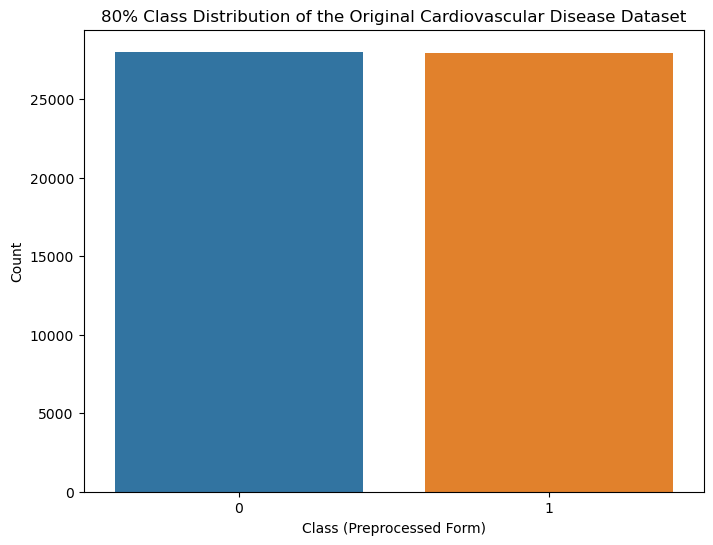

In [23]:
import matplotlib.pyplot as plt
# Assuming 'Class_att' is your target column
class_counts = cardiovascular_train_dataframe['cardio'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Class (Preprocessed Form)')
plt.ylabel('Count')
plt.title('80% Class Distribution of the Original Cardiovascular Disease Dataset')
plt.show()

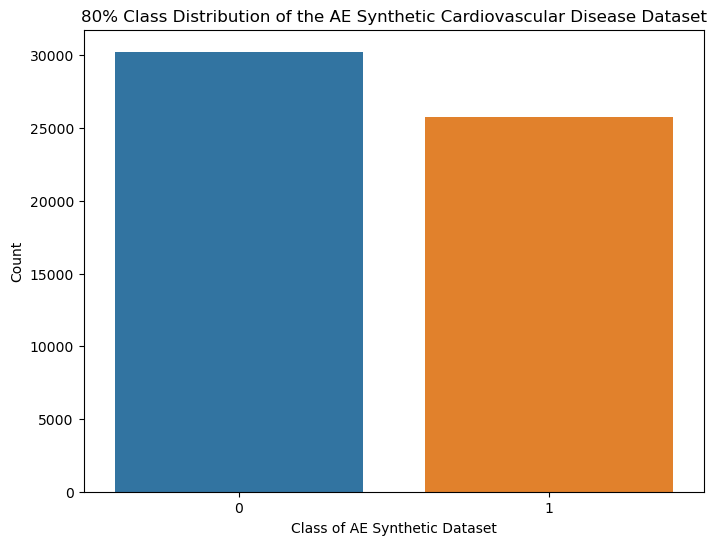

In [25]:
import matplotlib.pyplot as plt
# Assuming 'Class_att' is your target column
class_counts = ae_synthetic_cardio_data_labels_df['cardio'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Class of AE Synthetic Dataset')
plt.ylabel('Count')
plt.title('80% Class Distribution of the AE Synthetic Cardiovascular Disease Dataset')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

featuresORIG = cardiovascular_train_dataframe.drop('cardio', axis=1)
labelsORIG = cardiovascular_train_dataframe['cardio'] # Class group is (0,1)

# Split the original dataset
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(featuresORIG, labelsORIG, test_size=0.2, random_state=42)

# Confirm the shapes
print("X_train_orig shape:", X_train_orig.shape)
print("X_test_orig shape:", X_test_orig.shape)
print("y_train_orig shape:", y_train_orig.shape)
print("y_test_orig shape:", y_test_orig.shape)

X_train_orig shape: (44800, 11)
X_test_orig shape: (11200, 11)
y_train_orig shape: (44800,)
y_test_orig shape: (11200,)


In [28]:
featuresAE = ae_synthetic_cardio_data_labels_df.drop('cardio', axis=1)
labelsAE = ae_synthetic_cardio_data_labels_df['cardio']


# Split the synthetic dataset
X_train_syn_ae, X_test_syn_ae, y_train_syn_ae, y_test_syn_ae = train_test_split(featuresAE, labelsAE, test_size=0.2, random_state=42)

# Confirm the shapes
print("X_train_syn_ae shape:", X_train_syn_ae.shape)
print("X_test_syn_ae shape:", X_test_syn_ae.shape)
print("y_train_syn_ae shape:", y_train_syn_ae.shape)
print("y_test_syn_ae shape:", y_test_syn_ae.shape)

X_train_syn_ae shape: (44800, 11)
X_test_syn_ae shape: (11200, 11)
y_train_syn_ae shape: (44800,)
y_test_syn_ae shape: (11200,)


In [61]:
ae_synthetic_cardio_data_labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          56000 non-null  float32
 1   gender       56000 non-null  float32
 2   height       56000 non-null  float32
 3   weight       56000 non-null  float32
 4   ap_hi        56000 non-null  float32
 5   ap_lo        56000 non-null  float32
 6   cholesterol  56000 non-null  float32
 7   gluc         56000 non-null  float32
 8   smoke        56000 non-null  float32
 9   alco         56000 non-null  float32
 10  active       56000 non-null  float32
 11  cardio       56000 non-null  int64  
dtypes: float32(11), int64(1)
memory usage: 2.8 MB


In [29]:
featuresCONT = control_cardio_dataframe.drop('cardio', axis=1)
labelsCONT = control_cardio_dataframe['cardio'] # Class group is (0,1)
# Split the synthetic dataset
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# Confirm the shapes
print("X_train_cont shape:", X_train_cont.shape)
print("X_test_cont shape:", X_test_cont.shape)
print("y_train_cont shape:", y_train_cont.shape)
print("y_test_cont shape:", y_test_cont.shape)

X_train_cont shape: (11200, 11)
X_test_cont shape: (2800, 11)
y_train_cont shape: (11200,)
y_test_cont shape: (2800,)


In [60]:
control_cardio_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14000 entries, 46730 to 63452
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          14000 non-null  float64 
 1   gender       14000 non-null  category
 2   height       14000 non-null  float64 
 3   weight       14000 non-null  float64 
 4   ap_hi        14000 non-null  float64 
 5   ap_lo        14000 non-null  float64 
 6   cholesterol  14000 non-null  category
 7   gluc         14000 non-null  category
 8   smoke        14000 non-null  category
 9   alco         14000 non-null  category
 10  active       14000 non-null  category
 11  cardio       14000 non-null  category
dtypes: category(7), float64(5)
memory usage: 752.8 KB


In [30]:
# Split the synthetic dataset
X_train_syn, X_test_syn, y_train_syn, y_test_syn = train_test_split(ae_synthetic_data_df, ae_synthetic_labels_series, test_size=0.2, random_state=42)

# Confirm the shapes
print("X_train_syn shape:", X_train_syn.shape)
print("X_test_syn shape:", X_test_syn.shape)
print("y_train_syn shape:", y_train_syn.shape)
print("y_test_syn shape:", y_test_syn.shape)

X_train_syn shape: (44800, 11)
X_test_syn shape: (11200, 11)
y_train_syn shape: (44800,)
y_test_syn shape: (11200,)


# MICRO-AVERAGE ROC CURVES

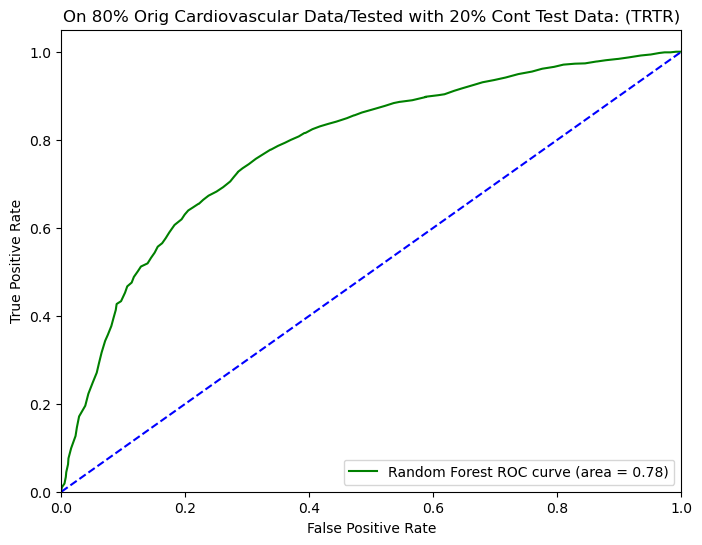

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Sample data preparation steps (replace with your actual DataFrame names)
# Assuming 'featuresORIG' and 'labelsORIG' are your original dataset features and labels
# Assuming 'featuresCONT' and 'labelsCONT' are your control (or synthetic) dataset features and labels

# Split the original dataset
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(featuresORIG, labelsORIG, test_size=0.2, random_state=42)

# Split the control dataset
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier on the original dataset
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_orig, y_train_orig)

# Predict probabilities on the control dataset
y_score = classifier.predict_proba(X_test_cont)

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test_cont, y_score[:, 1])  # Assuming the positive class is labeled as '1'
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', label='Random Forest ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% Orig Cardiovascular Data/Tested with 20% Cont Test Data: (TRTR)')
plt.legend(loc="lower right")
plt.show()


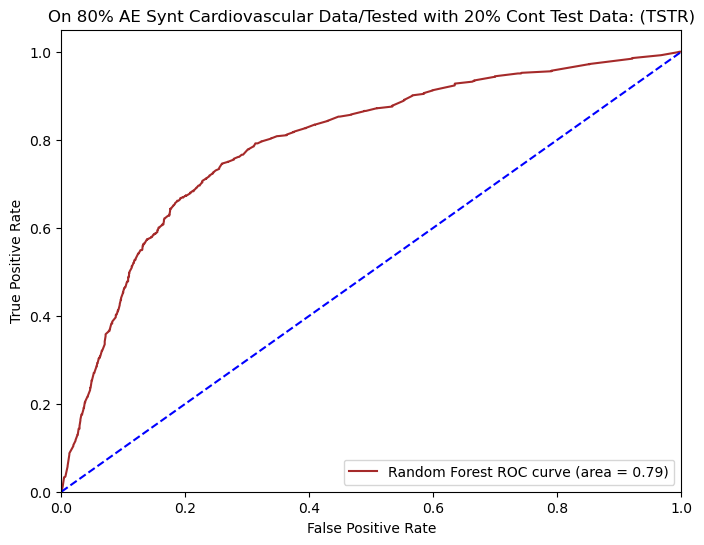

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Sample data preparation steps (replace with your actual DataFrame names)
# Assuming 'featuresORIG' and 'labelsORIG' are your original dataset features and labels
# Assuming 'featuresCONT' and 'labelsCONT' are your control (or synthetic) dataset features and labels

# And X_train, X_test, y_train, y_test are your 80% Original Obesity dataset split
X_train_syn_ae, X_test_syn_ae, y_train_syn_ae, y_test_syn_ae = train_test_split(featuresAE, labelsAE, test_size=0.2, random_state=42)

# Split the control dataset
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier on the original dataset
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_syn_ae, y_train_syn_ae)

# Predict probabilities on the control dataset
y_score = classifier.predict_proba(X_test_cont)

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test_cont, y_score[:, 1])  # Assuming the positive class is labeled as '1'
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='brown', label='Random Forest ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% AE Synt Cardiovascular Data/Tested with 20% Cont Test Data: (TSTR)')
plt.legend(loc="lower right")
plt.show()


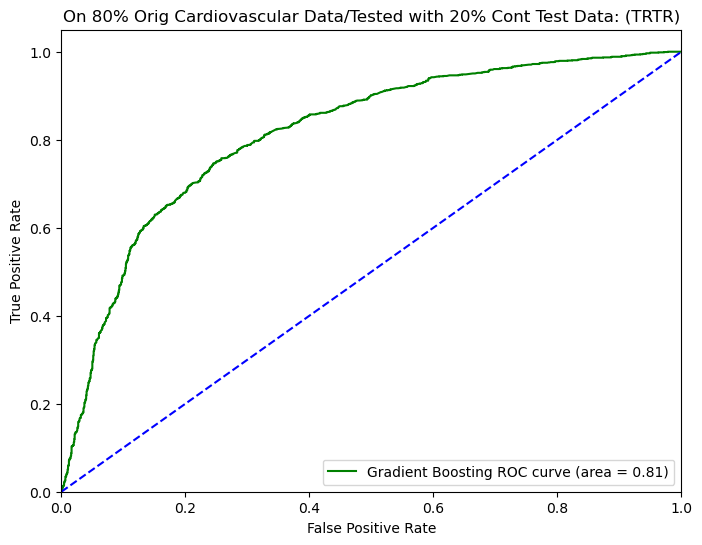

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Sample data preparation steps (replace with your actual DataFrame names)
# Assuming 'featuresORIG' and 'labelsORIG' are your original dataset features and labels
# Assuming 'featuresCONT' and 'labelsCONT' are your control (or synthetic) dataset features and labels

# Split the original dataset
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(featuresORIG, labelsORIG, test_size=0.2, random_state=42)

# Split the control dataset
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier on the original dataset
classifier = GradientBoostingClassifier(random_state=42)
classifier.fit(X_train_orig, y_train_orig)

# Predict probabilities on the control dataset
y_score = classifier.predict_proba(X_test_cont)

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test_cont, y_score[:, 1])  # Assuming the positive class is labeled as '1'
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', label='Gradient Boosting ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% Orig Cardiovascular Data/Tested with 20% Cont Test Data: (TRTR)')
plt.legend(loc="lower right")
plt.show()


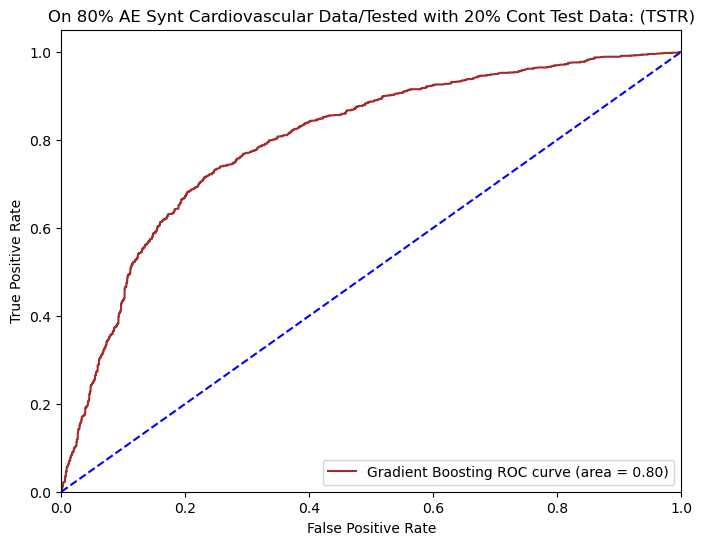

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Sample data preparation steps (replace with your actual DataFrame names)
# Assuming 'featuresORIG' and 'labelsORIG' are your original dataset features and labels
# Assuming 'featuresCONT' and 'labelsCONT' are your control (or synthetic) dataset features and labels

# And X_train, X_test, y_train, y_test are your 80% Original Obesity dataset split
X_train_syn_ae, X_test_syn_ae, y_train_syn_ae, y_test_syn_ae = train_test_split(featuresAE, labelsAE, test_size=0.2, random_state=42)

# Split the control dataset
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier on the original dataset
classifier = GradientBoostingClassifier(random_state=42)
classifier.fit(X_train_syn_ae, y_train_syn_ae)

# Predict probabilities on the control dataset
y_score = classifier.predict_proba(X_test_cont)

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test_cont, y_score[:, 1])  # Assuming the positive class is labeled as '1'
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='brown', label='Gradient Boosting ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% AE Synt Cardiovascular Data/Tested with 20% Cont Test Data: (TSTR)')
plt.legend(loc="lower right")
plt.show()


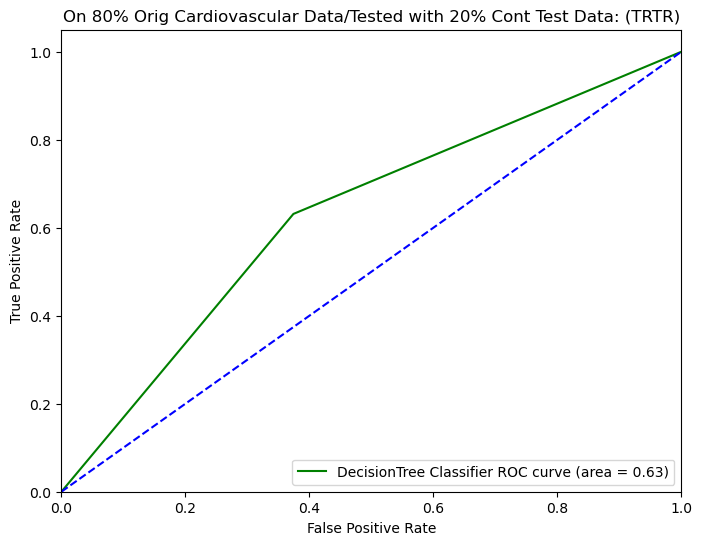

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Sample data preparation steps (replace with your actual DataFrame names)
# Assuming 'featuresORIG' and 'labelsORIG' are your original dataset features and labels
# Assuming 'featuresCONT' and 'labelsCONT' are your control (or synthetic) dataset features and labels

# Split the original dataset
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(featuresORIG, labelsORIG, test_size=0.2, random_state=42)

# Split the control dataset
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier on the original dataset
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train_orig, y_train_orig)

# Predict probabilities on the control dataset
y_score = classifier.predict_proba(X_test_cont)

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test_cont, y_score[:, 1])  # Assuming the positive class is labeled as '1'
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', label='DecisionTree Classifier ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% Orig Cardiovascular Data/Tested with 20% Cont Test Data: (TRTR)')
plt.legend(loc="lower right")
plt.show()


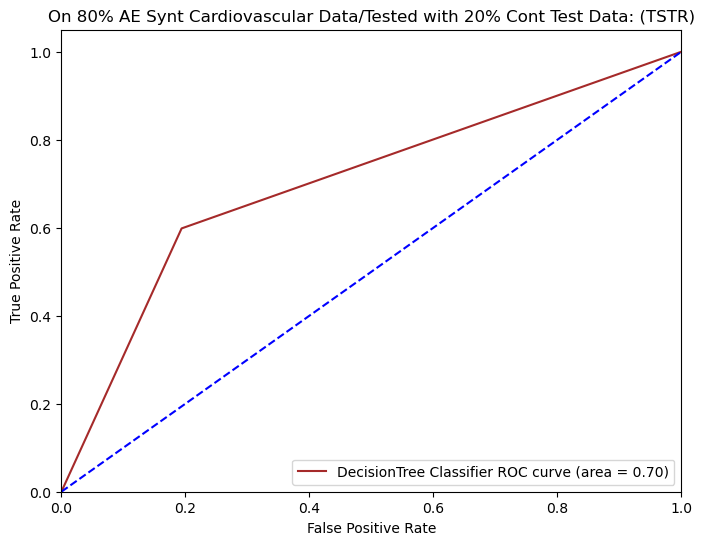

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np


# And X_train, X_test, y_train, y_test are your 80% Original Obesity dataset split
X_train_syn_ae, X_test_syn_ae, y_train_syn_ae, y_test_syn_ae = train_test_split(featuresAE, labelsAE, test_size=0.2, random_state=42)

# Split the control dataset
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier on the original dataset
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train_syn_ae, y_train_syn_ae)

# Predict probabilities on the control dataset
y_score = classifier.predict_proba(X_test_cont)

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test_cont, y_score[:, 1])  # Assuming the positive class is labeled as '1'
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='brown', label='DecisionTree Classifier ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% AE Synt Cardiovascular Data/Tested with 20% Cont Test Data: (TSTR)')
plt.legend(loc="lower right")
plt.show()


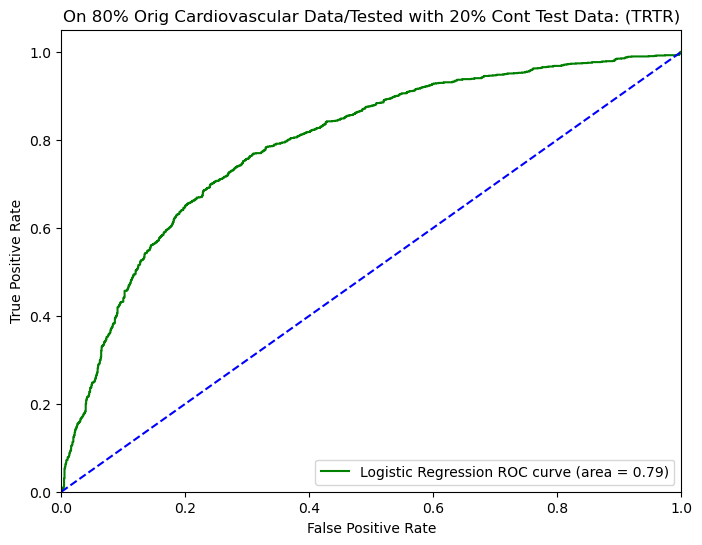

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Split the original dataset
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(featuresORIG, labelsORIG, test_size=0.2, random_state=42)

# Split the control dataset
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier on the original dataset
classifier = LogisticRegression()
classifier.fit(X_train_orig, y_train_orig)

# Predict probabilities on the control dataset
y_score = classifier.predict_proba(X_test_cont)

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test_cont, y_score[:, 1])  # Assuming the positive class is labeled as '1'
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', label='Logistic Regression ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% Orig Cardiovascular Data/Tested with 20% Cont Test Data: (TRTR)')
plt.legend(loc="lower right")
plt.show()


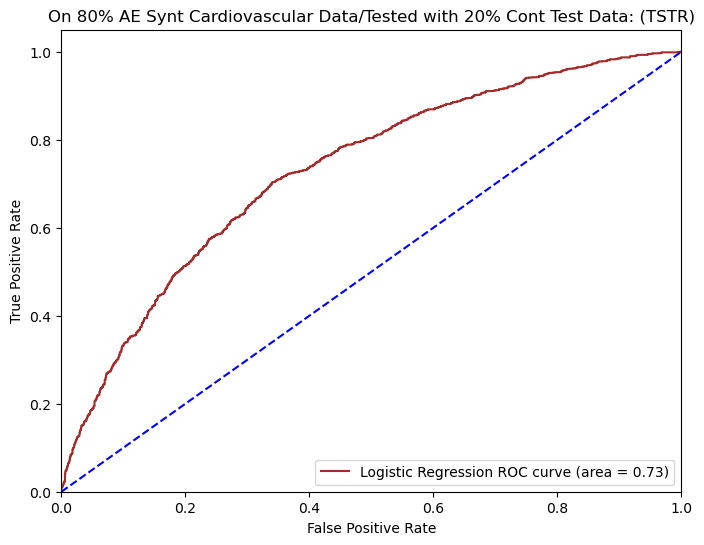

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np


# And X_train, X_test, y_train, y_test are your 80% Original Obesity dataset split
X_train_syn_ae, X_test_syn_ae, y_train_syn_ae, y_test_syn_ae = train_test_split(featuresAE, labelsAE, test_size=0.2, random_state=42)

# Split the control dataset
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier on the original dataset
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train_syn_ae, y_train_syn_ae)

# Predict probabilities on the control dataset
y_score = classifier.predict_proba(X_test_cont)

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test_cont, y_score[:, 1])  # Assuming the positive class is labeled as '1'
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='brown', label='Logistic Regression ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% AE Synt Cardiovascular Data/Tested with 20% Cont Test Data: (TSTR)')
plt.legend(loc="lower right")
plt.show()


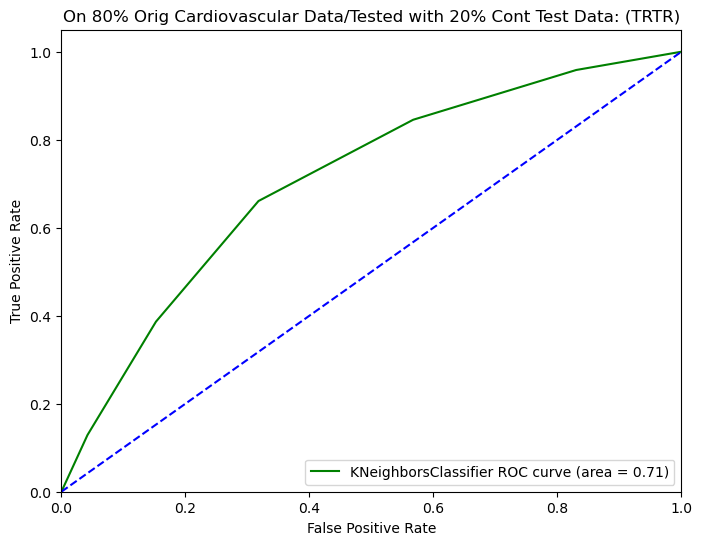

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Split the original dataset
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(featuresORIG, labelsORIG, test_size=0.2, random_state=42)

# Split the control dataset
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier on the original dataset
classifier = KNeighborsClassifier()
classifier.fit(X_train_orig, y_train_orig)

# Predict probabilities on the control dataset
y_score = classifier.predict_proba(X_test_cont)

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test_cont, y_score[:, 1])  # Assuming the positive class is labeled as '1'
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', label='KNeighborsClassifier ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% Orig Cardiovascular Data/Tested with 20% Cont Test Data: (TRTR)')
plt.legend(loc="lower right")
plt.show()


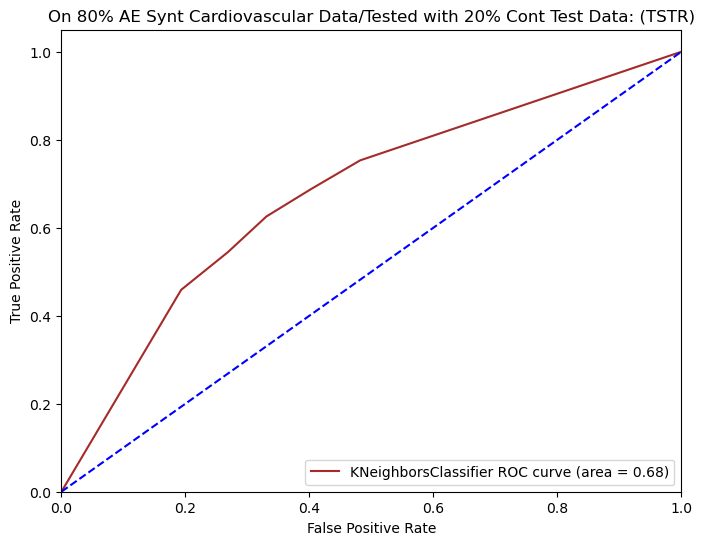

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np


# And X_train, X_test, y_train, y_test are your 80% Original Obesity dataset split
X_train_syn_ae, X_test_syn_ae, y_train_syn_ae, y_test_syn_ae = train_test_split(featuresAE, labelsAE, test_size=0.2, random_state=42)

# Split the control dataset
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier on the original dataset
classifier = KNeighborsClassifier()
classifier.fit(X_train_syn_ae, y_train_syn_ae)

# Predict probabilities on the control dataset
y_score = classifier.predict_proba(X_test_cont)

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test_cont, y_score[:, 1])  # Assuming the positive class is labeled as '1'
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='brown', label='KNeighborsClassifier ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% AE Synt Cardiovascular Data/Tested with 20% Cont Test Data: (TSTR)')
plt.legend(loc="lower right")
plt.show()


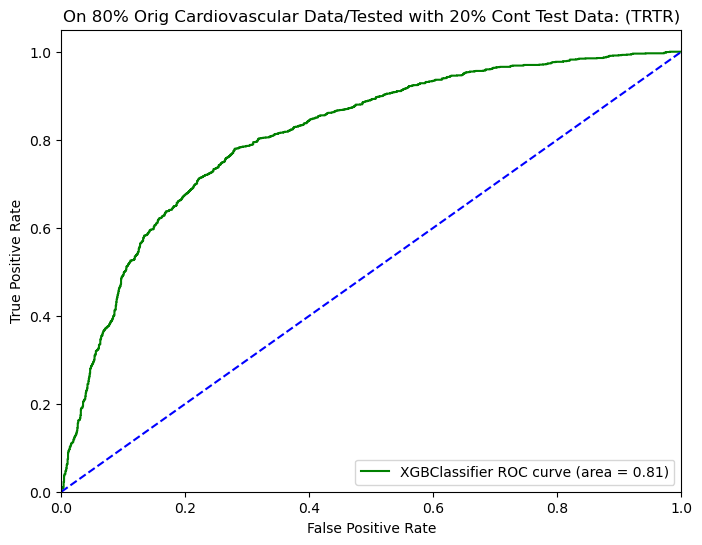

In [51]:
import pandas as pd

# Assuming featuresORIG and featuresCONT are your original and control feature DataFrames
# Convert categorical columns to one-hot encoded columns
featuresORIG_encoded = pd.get_dummies(featuresORIG, drop_first=True)
featuresCONT_encoded = pd.get_dummies(featuresCONT, drop_first=True)

# Ensure both DataFrames have the same columns in the same order
featuresORIG_encoded, featuresCONT_encoded = featuresORIG_encoded.align(featuresCONT_encoded, join='inner', axis=1)

# Now, let's split the datasets again with the encoded features
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(featuresORIG_encoded, labelsORIG, test_size=0.2, random_state=42)
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT_encoded, labelsCONT, test_size=0.2, random_state=42)

# Initialize and train the XGBClassifier on the original dataset
classifier = XGBClassifier()
classifier.fit(X_train_orig, y_train_orig)

# Predict probabilities on the control dataset
y_score = classifier.predict_proba(X_test_cont)

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test_cont, y_score[:, 1])  # Assuming the positive class is labeled as '1'
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', label='XGBClassifier ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% Orig Cardiovascular Data/Tested with 20% Cont Test Data: (TRTR)')
plt.legend(loc="lower right")
plt.show()


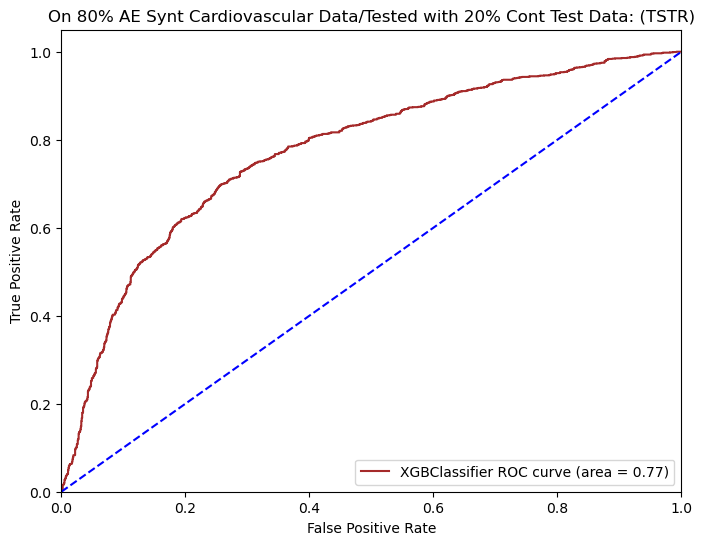

In [52]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np


# And X_train, X_test, y_train, y_test are your 80% Original Obesity dataset split
X_train_syn_ae, X_test_syn_ae, y_train_syn_ae, y_test_syn_ae = train_test_split(featuresAE, labelsAE, test_size=0.2, random_state=42)

# Split the control dataset
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier on the original dataset
classifier = XGBClassifier()
classifier.fit(X_train_syn_ae, y_train_syn_ae)

# Predict probabilities on the control dataset
y_score = classifier.predict_proba(X_test_cont)

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test_cont, y_score[:, 1])  # Assuming the positive class is labeled as '1'
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='brown', label='XGBClassifier ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% AE Synt Cardiovascular Data/Tested with 20% Cont Test Data: (TSTR)')
plt.legend(loc="lower right")
plt.show()


[LightGBM] [Info] Number of positive: 22315, number of negative: 22485
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 699
[LightGBM] [Info] Number of data points in the train set: 44800, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498103 -> initscore=-0.007589
[LightGBM] [Info] Start training from score -0.007589


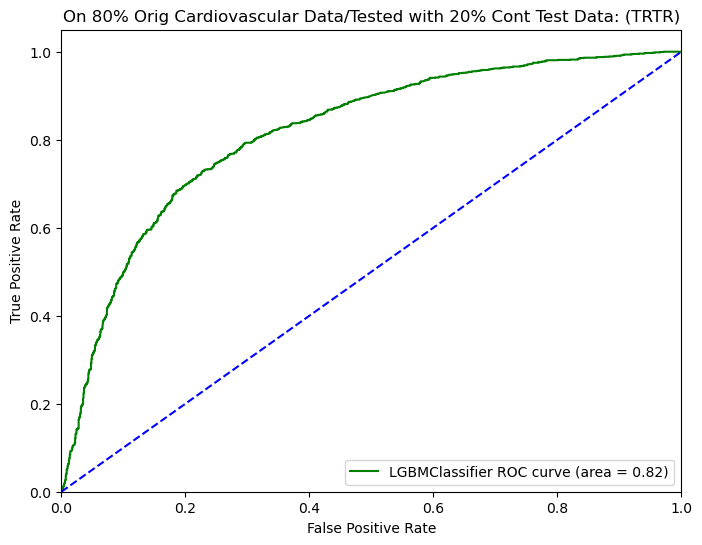

In [54]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Split the original dataset
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(featuresORIG, labelsORIG, test_size=0.2, random_state=42)

# Split the control dataset
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier on the original dataset
classifier = LGBMClassifier()
classifier.fit(X_train_orig, y_train_orig)

# Predict probabilities on the control dataset
y_score = classifier.predict_proba(X_test_cont)

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test_cont, y_score[:, 1])  # Assuming the positive class is labeled as '1'
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', label='LGBMClassifier ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% Orig Cardiovascular Data/Tested with 20% Cont Test Data: (TRTR)')
plt.legend(loc="lower right")
plt.show()


In [64]:
control_cardio_dataframe2 = control_cardio_dataframe.copy()

for col in control_cardio_dataframe2.select_dtypes(include=['category']).columns:
    control_cardio_dataframe2[col] = control_cardio_dataframe2[col].cat.codes


featuresCONT2 = control_cardio_dataframe2.drop('cardio', axis=1)
labelsCONT2 = control_cardio_dataframe2['cardio'] # Class group is (0,1)
# Split the synthetic dataset
X_train_cont2, X_test_cont2, y_train_cont2, y_test_cont2 = train_test_split(featuresCONT2, labelsCONT2, test_size=0.2, random_state=42)

# Confirm the shapes
print("X_train_cont2 shape:", X_train_cont2.shape)
print("X_test_cont2 shape:", X_test_cont2.shape)
print("y_train_cont2 shape:", y_train_cont2.shape)
print("y_test_cont2 shape:", y_test_cont2.shape)

X_train_cont2 shape: (11200, 11)
X_test_cont2 shape: (2800, 11)
y_train_cont2 shape: (11200,)
y_test_cont2 shape: (2800,)


[LightGBM] [Info] Number of positive: 20525, number of negative: 24275
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001845 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2792
[LightGBM] [Info] Number of data points in the train set: 44800, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.458147 -> initscore=-0.167803
[LightGBM] [Info] Start training from score -0.167803


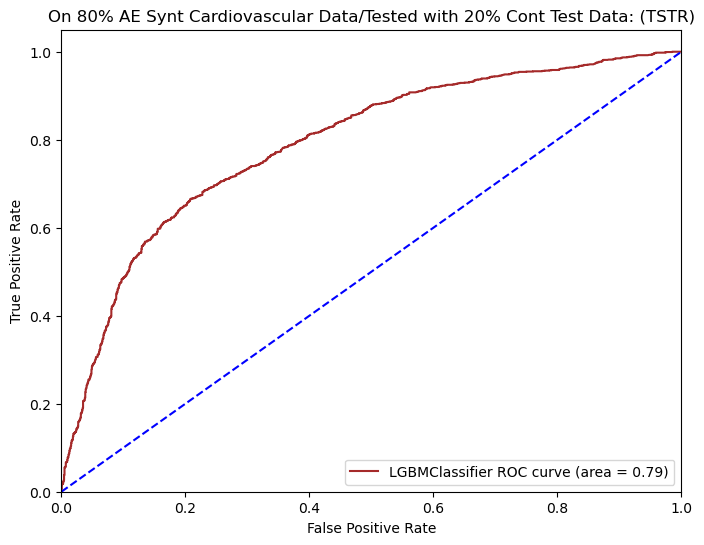

In [66]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# And X_train, X_test, y_train, y_test are your 80% Original Obesity dataset split
X_train_syn_ae, X_test_syn_ae, y_train_syn_ae, y_test_syn_ae = train_test_split(featuresAE, labelsAE, test_size=0.2, random_state=42)


# Assuming X_train_syn_ae, y_train_syn_ae, and X_test_cont, y_test_cont are already defined and split
X_train_cont2, X_test_cont2, y_train_cont2, y_test_cont2 = train_test_split(featuresCONT2, labelsCONT2, test_size=0.2, random_state=42)

# Initialize LGBMClassifier
classifier = LGBMClassifier()

# Fit the classifier to the synthetic AE dataset
classifier.fit(X_train_syn_ae, y_train_syn_ae)

# Predict probabilities on the control dataset
y_score = classifier.predict_proba(X_test_cont2)

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test_cont, y_score[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='brown', label='LGBMClassifier ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% AE Synt Cardiovascular Data/Tested with 20% Cont Test Data: (TSTR)')
plt.legend(loc="lower right")
plt.show()


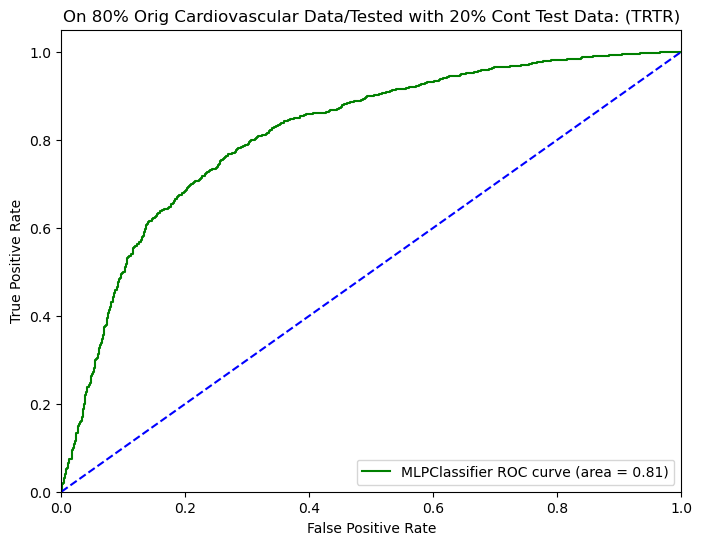

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Split the original dataset
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(featuresORIG, labelsORIG, test_size=0.2, random_state=42)

# Split the control dataset
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier on the original dataset
classifier = MLPClassifier()
classifier.fit(X_train_orig, y_train_orig)

# Predict probabilities on the control dataset
y_score = classifier.predict_proba(X_test_cont)

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test_cont, y_score[:, 1])  # Assuming the positive class is labeled as '1'
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', label='MLPClassifier ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% Orig Cardiovascular Data/Tested with 20% Cont Test Data: (TRTR)')
plt.legend(loc="lower right")
plt.show()


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


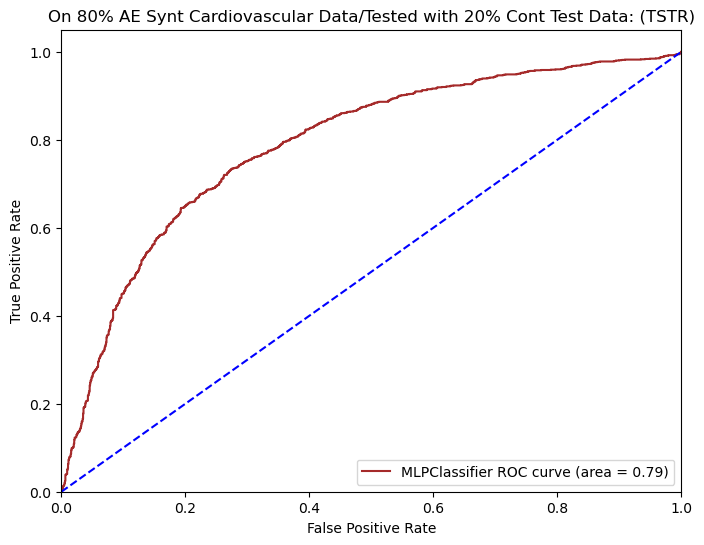

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np


# And X_train, X_test, y_train, y_test are your 80% Original Obesity dataset split
X_train_syn_ae, X_test_syn_ae, y_train_syn_ae, y_test_syn_ae = train_test_split(featuresAE, labelsAE, test_size=0.2, random_state=42)

# Split the control dataset
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier on the original dataset
classifier = MLPClassifier()
classifier.fit(X_train_syn_ae, y_train_syn_ae)

# Predict probabilities on the control dataset
y_score = classifier.predict_proba(X_test_cont)

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test_cont, y_score[:, 1])  # Assuming the positive class is labeled as '1'
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='brown', label='MLPClassifier ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% AE Synt Cardiovascular Data/Tested with 20% Cont Test Data: (TSTR)')
plt.legend(loc="lower right")
plt.show()


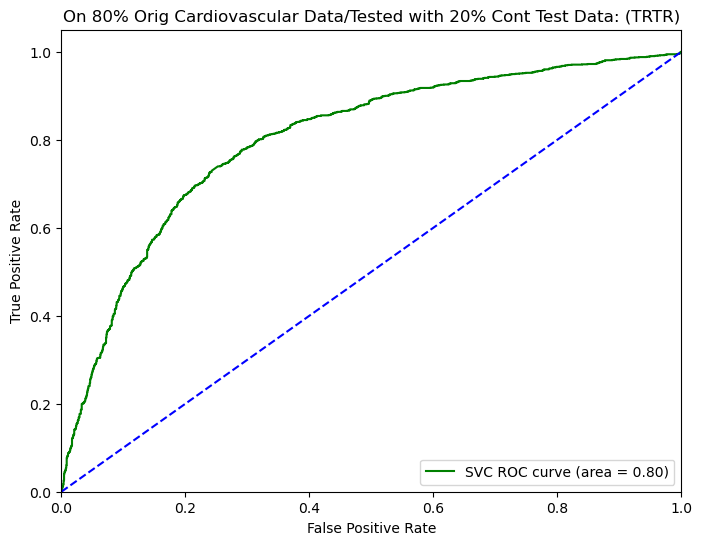

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Split the original dataset
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(featuresORIG, labelsORIG, test_size=0.2, random_state=42)

# Split the control dataset
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier on the original dataset
classifier =  SVC(probability=True)
classifier.fit(X_train_orig, y_train_orig)

# Predict probabilities on the control dataset
y_score = classifier.predict_proba(X_test_cont)

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test_cont, y_score[:, 1])  # Assuming the positive class is labeled as '1'
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', label='SVC ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% Orig Cardiovascular Data/Tested with 20% Cont Test Data: (TRTR)')
plt.legend(loc="lower right")
plt.show()


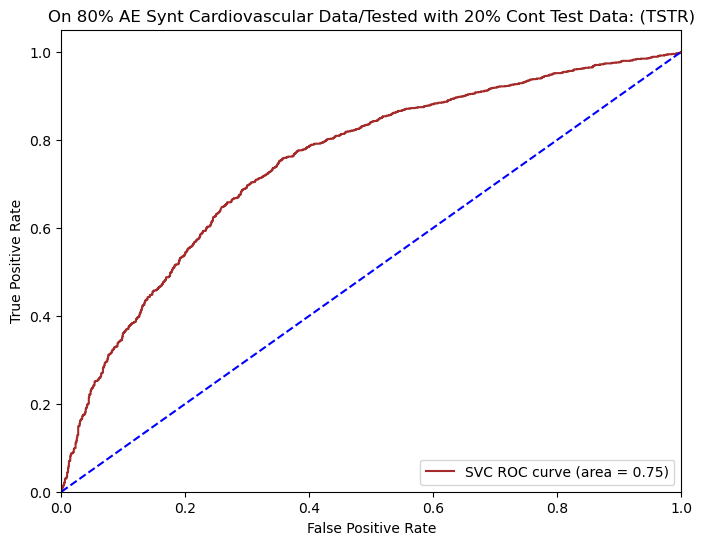

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np


# And X_train, X_test, y_train, y_test are your 80% Original Cardiovascular dataset split
X_train_syn_ae, X_test_syn_ae, y_train_syn_ae, y_test_syn_ae = train_test_split(featuresAE, labelsAE, test_size=0.2, random_state=42)

# Split the control dataset
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier on the original dataset
classifier =  SVC(probability=True)
classifier.fit(X_train_syn_ae, y_train_syn_ae)

# Predict probabilities on the control dataset
y_score = classifier.predict_proba(X_test_cont)

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test_cont, y_score[:, 1])  # Assuming the positive class is labeled as '1'
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='brown', label='SVC ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% AE Synt Cardiovascular Data/Tested with 20% Cont Test Data: (TSTR)')
plt.legend(loc="lower right")
plt.show()


# Computational and Graphical Representations of AUC-ROC Curves by Classifiers

[LightGBM] [Info] Number of positive: 22315, number of negative: 22485
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 699
[LightGBM] [Info] Number of data points in the train set: 44800, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498103 -> initscore=-0.007589
[LightGBM] [Info] Start training from score -0.007589


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


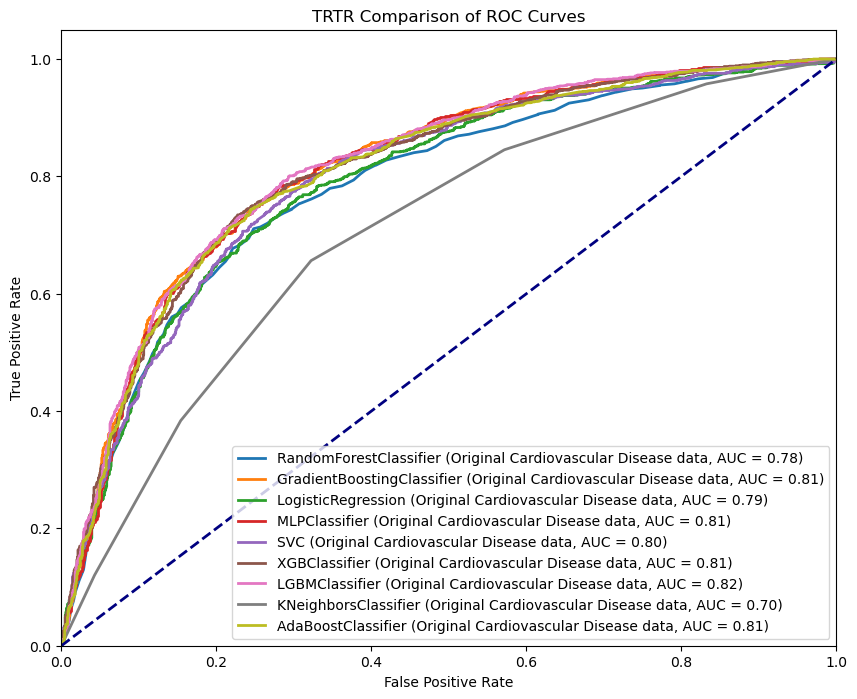

In [134]:
# 1. Import Necessary Libraries
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# 2. Define Data Splits for Original Dataset
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(featuresORIG, labelsORIG, test_size=0.2, random_state=42)
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)



# 3. Scale the Data
scaler = StandardScaler()
X_train_orig_scaled = scaler.fit_transform(X_train_orig)
X_test_cont_scaled = scaler.transform(X_test_cont)

# 5. Define the `plot_auc_roc` Function
def plot_auc_roc(model, X_train, y_train, X_test, y_test, data_type):
    model.fit(X_train, y_train)
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_pred_proba = model.decision_function(X_test)
    else:
        raise AttributeError(f"{model.__class__.__name__} does not have predict_proba or decision_function.")
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model.__class__.__name__} ({data_type} data, AUC = {roc_auc:.2f})')

# 6. Define Models
models = {
    "RandomForestClassifier": RandomForestClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "LogisticRegression": LogisticRegression(),
    "MLPClassifier": MLPClassifier(),
    "SVC": SVC(probability=True),
    "XGBClassifier": XGBClassifier(),
    "LGBMClassifier": LGBMClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier()
}

# 7. Plot AUC-ROC Curves for Models Trained on Original Data
plt.figure(figsize=(10, 8))
for name, model in models.items():
    plot_auc_roc(model, X_train_orig_scaled, y_train_orig, X_test_cont_scaled, y_test_cont, "Original Cardiovascular Disease")

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('TRTR Comparison of ROC Curves')
plt.legend(loc="lower right")
plt.show()


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[LightGBM] [Info] Number of positive: 20525, number of negative: 24275
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001824 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2681
[LightGBM] [Info] Number of data points in the train set: 44800, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.458147 -> initscore=-0.167803
[LightGBM] [Info] Start training from score -0.167803
[LightGBM] [Info] Number of positive: 22315, number of negative: 22485
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 700
[LightGBM] [Info] Number of data points in the train set: 44800, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498103 -> initscore=-0.007589
[Li

C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


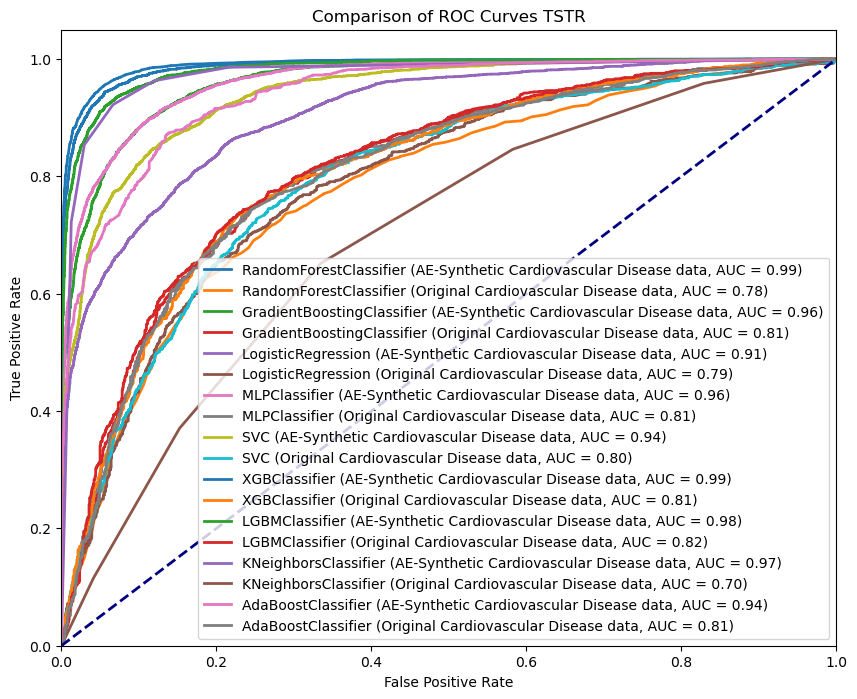

In [133]:
# 1. Import Necessary Libraries
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


# 2. Define Data Splits for Original and Control Datasets
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)
X_train_syn_ae, X_test_syn_ae, y_train_syn_ae, y_test_syn_ae = train_test_split(featuresAE, labelsAE, test_size=0.2, random_state=42)

# 3. Scale the Data
scaler = StandardScaler()
X_train_syn_ae_scaled = scaler.fit_transform(X_train_syn_ae)
X_test_syn_ae_scaled = scaler.transform(X_test_syn_ae)
X_train_cont_scaled = scaler.transform(X_train_cont)
X_test_cont_scaled = scaler.transform(X_test_cont)

# Assuming featuresAE and labelsAE are your synthetic dataset and its corresponding labels
X_original_scaled = scaler.transform(featuresORIG)

# 4. Split and Scale the Synthetic Dataset
X_train_orig_scaled, X_test_orig_scaled, y_train_orig, y_test_orig = train_test_split(X_original_scaled, labelsORIG, test_size=0.2, random_state=42)


# 5. Define the `plot_auc_roc` Function
def plot_auc_roc(model, X_train, y_train, X_test, y_test, data_type):
    model.fit(X_train, y_train)
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_pred_proba = model.decision_function(X_test)
    else:
        raise AttributeError(f"{model.__class__.__name__} does not have predict_proba or decision_function.")
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model.__class__.__name__} ({data_type} data, AUC = {roc_auc:.2f})')

# 6. Define Models
models = {
    "RandomForestClassifier": RandomForestClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "LogisticRegression": LogisticRegression(),
    "MLPClassifier": MLPClassifier(),
    "SVC": SVC(probability=True),
    "XGBClassifier": XGBClassifier(),
    "LGBMClassifier": LGBMClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier()
}

# 7. Plot AUC-ROC Curves for Models Trained on Synthetic and Real Data
plt.figure(figsize=(10, 8))
for name, model in models.items():
    plot_auc_roc(model, X_train_syn_ae_scaled, y_train_syn_ae, X_test_syn_ae_scaled, y_test_syn_ae, "AE-Synthetic Cardiovascular Disease")
    plot_auc_roc(model, X_train_orig_scaled, y_train_orig, X_test_cont_scaled, y_test_cont, "Original Cardiovascular Disease")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of ROC Curves TSTR')
plt.legend(loc="lower right")
plt.show()


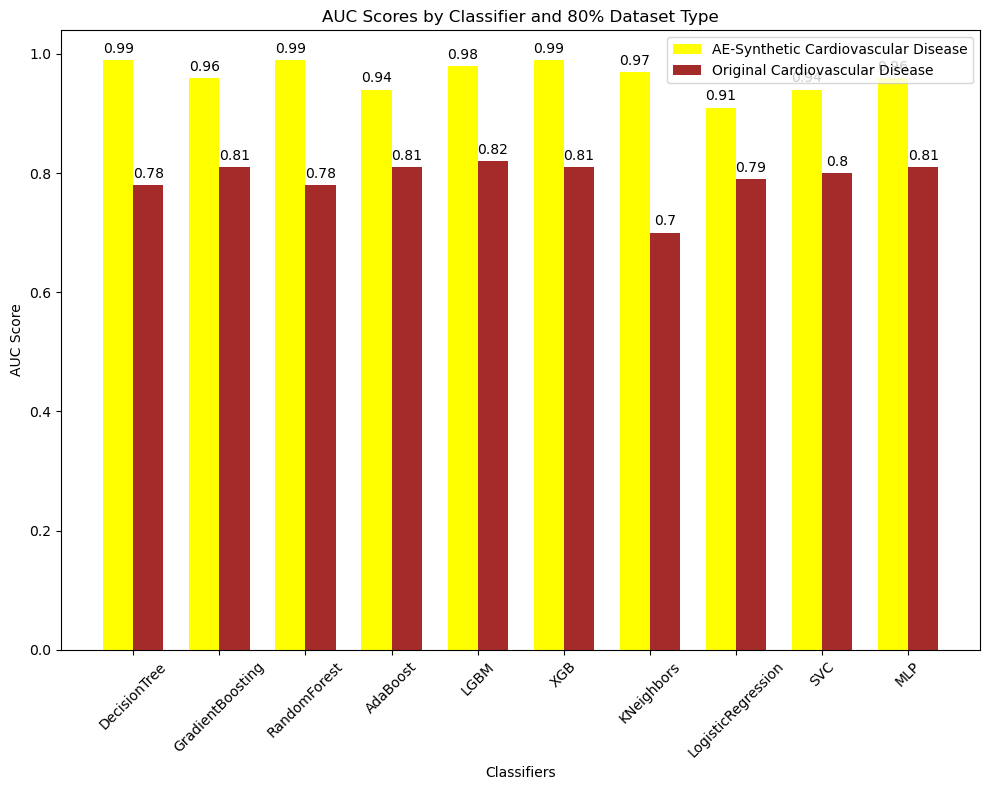

In [152]:
import matplotlib.pyplot as plt
import numpy as np

# Classifier names
classifiers = ["DecisionTree", "GradientBoosting", "RandomForest", "AdaBoost", "LGBM", "XGB", "KNeighbors", "LogisticRegression", "SVC", "MLP"]

# AUC scores for AE-synthetic data
auc_synthetic = [0.99, 0.96, 0.99, 0.94, 0.98, 0.99, 0.97, 0.91, 0.94, 0.96]

# AUC scores for original data
auc_original = [0.78, 0.81, 0.78, 0.81, 0.82, 0.81, 0.70, 0.79, 0.80, 0.81]

x = np.arange(len(classifiers))  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots(figsize=(10, 8))
# Customize colors here. Example: 'skyblue' and '#FF5733' (a shade of orange)
rects1 = ax.bar(x - width/2, auc_synthetic, width, label='AE-Synthetic Cardiovascular Disease', color='yellow')
rects2 = ax.bar(x + width/2, auc_original, width, label='Original Cardiovascular Disease', color='brown')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Classifiers')
ax.set_ylabel('AUC Score')
ax.set_title('AUC Scores by Classifier and 80% Dataset Type')
ax.set_xticks(x)
ax.set_xticklabels(classifiers, rotation=45)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()


# COMPUTING CROSS-VALIDATION OF ORIGINAL AND AE-SYNTHETIC CARDIOVASCULAR DISEASE DATASETS

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np


## vae_synthetic_data_df_new
# vae_synthetic_labels_series_new

# ae_synthetic_data_df
# ae_synthetic_labels_series
# X_train_syn_ae, X_test_syn_ae, y_train_syn_ae, y_test_syn_ae = train_test_split(featuresAE, labelsAE, test_size=0.2, random_state=42)


# Assuming final_synthetic_df and final_synthetic_labels are your features and labels DataFrames
# Encoding categorical labels if necessary
le = LabelEncoder()
ae_synthetic_labels_ae_encoded = le.fit_transform(ae_synthetic_labels_series)

# Splitting the dataset
X_train_syn_ae, X_test_syn_ae, y_train_syn_ae, y_test_syn_ae = train_test_split(ae_synthetic_data_df, ae_synthetic_labels_ae_encoded, test_size=0.2, random_state=42)

# List of classifiers to evaluate
classifiers = [
    DecisionTreeClassifier(random_state=2),
    GradientBoostingClassifier(random_state=2),
    RandomForestClassifier(n_estimators=100, random_state=2),
    AdaBoostClassifier(random_state=2),
    LGBMClassifier(random_state=2),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=2),
    KNeighborsClassifier(),
    LogisticRegression(max_iter=1000, random_state=2),
    SVC(random_state=2),
    MLPClassifier(max_iter=1000, random_state=2)
]

# Evaluate each classifier
for clf in classifiers:
    cv_scores = cross_val_score(clf, X_train_syn_ae, y_train_syn_ae, cv=5, scoring='accuracy')
    mean_cv_score = np.mean(cv_scores)
    std_cv_score = np.std(cv_scores)
    print(f"{clf.__class__.__name__}: Mean CV Accuracy for AE-Synthetic Cardiovascular Disease = {mean_cv_score:.4f}, Std = {std_cv_score:.4f}")


DecisionTreeClassifier: Mean CV Accuracy for AE-Synthetic Cardiovascular Disease = 0.9133, Std = 0.0018
GradientBoostingClassifier: Mean CV Accuracy for AE-Synthetic Cardiovascular Disease = 0.8772, Std = 0.0047
RandomForestClassifier: Mean CV Accuracy for AE-Synthetic Cardiovascular Disease = 0.9418, Std = 0.0030


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anacond

AdaBoostClassifier: Mean CV Accuracy for AE-Synthetic Cardiovascular Disease = 0.8453, Std = 0.0064
[LightGBM] [Info] Number of positive: 16420, number of negative: 19420
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2791
[LightGBM] [Info] Number of data points in the train set: 35840, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.458147 -> initscore=-0.167803
[LightGBM] [Info] Start training from score -0.167803
[LightGBM] [Info] Number of positive: 16420, number of negative: 19420
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001449 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2791
[LightGBM] [Info] Number of data points in the train set: 35840, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pav

In [78]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Convert categorical columns to numeric codes for the entire dataset
featuresORIG_num = featuresORIG.copy()
for col in featuresORIG.select_dtypes(include=['category']).columns:
    featuresORIG_num[col] = featuresORIG[col].cat.codes

# Proceed with your original process by Splitting the original dataset
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(featuresORIG_num, original_labels_ae_encoded, test_size=0.2, random_state=42)


# Assuming final_synthetic_df and final_synthetic_labels are your features and labels DataFrames
# Encoding categorical labels if necessary
le = LabelEncoder()
original_labels_ae_encoded = le.fit_transform(labelsORIG)


# List of classifiers to evaluate
classifiers = [
    DecisionTreeClassifier(random_state=2),
    GradientBoostingClassifier(random_state=2),
    RandomForestClassifier(n_estimators=100, random_state=2),
    AdaBoostClassifier(random_state=2),
    LGBMClassifier(random_state=2),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=2),
    KNeighborsClassifier(),
    LogisticRegression(max_iter=1000, random_state=2),
    SVC(random_state=2),
    MLPClassifier(max_iter=1000, random_state=2)
]

# Evaluate each classifier
for clf in classifiers:
    cv_scores = cross_val_score(clf, X_train_orig, y_train_orig, cv=5, scoring='accuracy')
    mean_cv_score = np.mean(cv_scores)
    std_cv_score = np.std(cv_scores)
    print(f"{clf.__class__.__name__}: Mean CV Accuracy for 80% Original Cardiovascular Disease Data= {mean_cv_score:.4f}, Std = {std_cv_score:.4f}")


DecisionTreeClassifier: Mean CV Accuracy for 80% Original Cardiovascular Disease Data= 0.6349, Std = 0.0032
GradientBoostingClassifier: Mean CV Accuracy for 80% Original Cardiovascular Disease Data= 0.7338, Std = 0.0021
RandomForestClassifier: Mean CV Accuracy for 80% Original Cardiovascular Disease Data= 0.7143, Std = 0.0020


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anacond

AdaBoostClassifier: Mean CV Accuracy for 80% Original Cardiovascular Disease Data= 0.7279, Std = 0.0033
[LightGBM] [Info] Number of positive: 17852, number of negative: 17988
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 663
[LightGBM] [Info] Number of data points in the train set: 35840, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498103 -> initscore=-0.007589
[LightGBM] [Info] Start training from score -0.007589
[LightGBM] [Info] Number of positive: 17852, number of negative: 17988
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM

# GRAPHICAL REPRESENTATION OF THE ABOVE MEAN CV OF ORIGINAL AND SYNTHETIC DATASETS

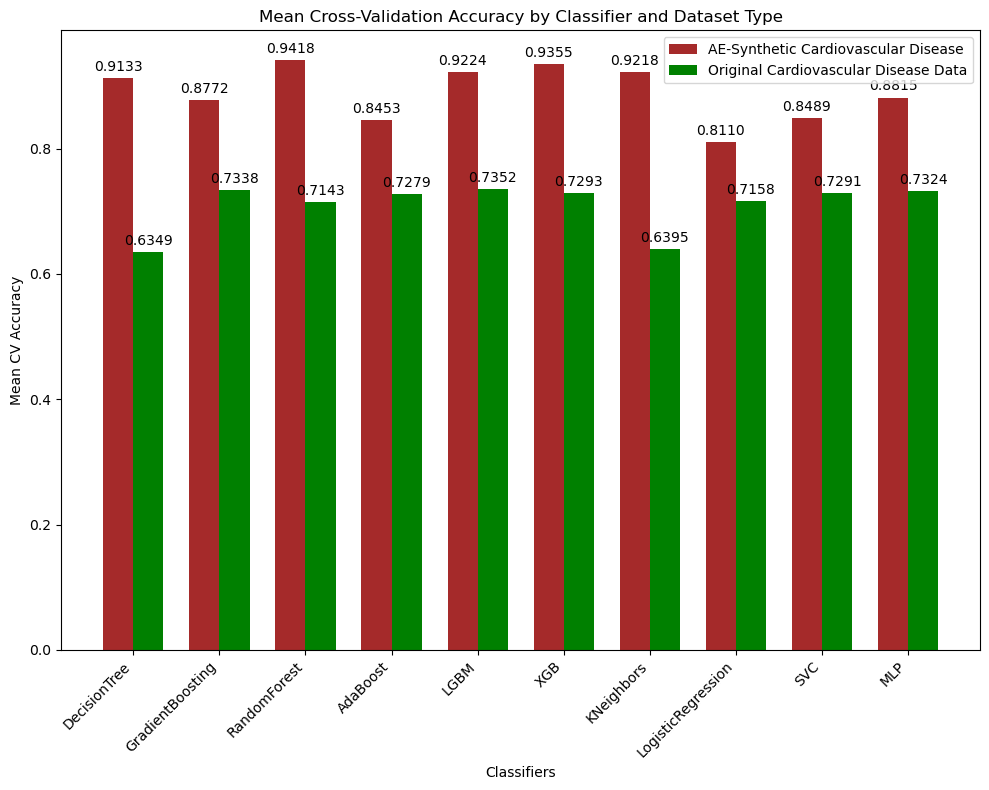

In [153]:
import matplotlib.pyplot as plt
import numpy as np

# Classifier names
classifiers = ["DecisionTree", "GradientBoosting", "RandomForest", "AdaBoost", "LGBM", "XGB", "KNeighbors", "LogisticRegression", "SVC", "MLP"]

# Mean CV Accuracy for AE-Synthetic Cardiovascular Disease
ae_synthetic_acc = [0.9133, 0.8772, 0.9418, 0.8453, 0.9224, 0.9355, 0.9218, 0.8110, 0.8489, 0.8815]

# Mean CV Accuracy for 80% Original Cardiovascular Disease Data
original_acc = [0.6349, 0.7338, 0.7143, 0.7279, 0.7352, 0.7293, 0.6395, 0.7158, 0.7291, 0.7324]

x = np.arange(len(classifiers))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 8))
rects1 = ax.bar(x - width/2, ae_synthetic_acc, width, label='AE-Synthetic Cardiovascular Disease', color='brown')
rects2 = ax.bar(x + width/2, original_acc, width, label='Original Cardiovascular Disease Data', color='green')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Classifiers')
ax.set_ylabel('Mean CV Accuracy')
ax.set_title('Mean Cross-Validation Accuracy by Classifier and Dataset Type')
ax.set_xticks(x)
ax.set_xticklabels(classifiers, rotation=45, ha="right")
ax.legend()

# Function to add labels on top of the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()

plt.show()

# Computing Numerical Statistical Values: KS-Test, P-Value, MSE, RMSE, MAE, F-Test for Variances, T-Test for Means

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import ks_2samp, f_oneway, ttest_ind
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


categorical_columns = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

# Initialize Label Encoder
le = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in categorical_columns:
    combined_data = pd.concat([ae_synthetic_cardio_data_labels_df[col], cardiovascular_train_dataframe[col]], axis=0)
    le.fit(combined_data)  # Fit on combined data to ensure all categories are covered
    ae_synthetic_cardio_data_labels_df[col] = le.transform(ae_synthetic_cardio_data_labels_df[col])
    cardiovascular_train_dataframe[col] = le.transform(cardiovascular_train_dataframe[col])

# Assuming we've already split your datasets into features and labels if necessary
# Now we can proceed with statistical analyses

results = []

for column in ae_synthetic_cardio_data_labels_df.columns.drop('cardio'):  # Assuming 'cardio' is the label column
    # Compute KS Test and P-Value
    ks_stat, ks_pvalue = ks_2samp(cardiovascular_train_dataframe[column], ae_synthetic_cardio_data_labels_df[column])

    # Compute MSE, RMSE, and MAE
    mse = mean_squared_error(cardiovascular_train_dataframe[column], ae_synthetic_cardio_data_labels_df[column])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(cardiovascular_train_dataframe[column], ae_synthetic_cardio_data_labels_df[column])

    # Compute F-Test and T-Test for comparing variances and means
    f_stat, f_pvalue = f_oneway(cardiovascular_train_dataframe[column], ae_synthetic_cardio_data_labels_df[column])
    t_stat, t_pvalue = ttest_ind(cardiovascular_train_dataframe[column], ae_synthetic_cardio_data_labels_df[column])

    # Collect results
    results.append({
        'Feature': column,
        'KS Stat': ks_stat,
        'KS P-Value': ks_pvalue,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'F-Test Stat': f_stat,
        'F-Test P-Value': f_pvalue,
        'T-Test Stat': t_stat,
        'T-Test P-Value': t_pvalue,
    })

results_df = pd.DataFrame(results)
print(results_df)


        Feature   KS Stat     KS P-Value           MSE          RMSE  \
0           age  0.062250   9.098879e-95  3.883827e-03      0.062320   
1        gender  0.635661   0.000000e+00  2.166981e+05    465.508457   
2        height  0.176054   0.000000e+00  2.931338e-01      0.541418   
3        weight  0.111018  4.960728e-301  9.526891e-02      0.308657   
4         ap_hi  0.505768   0.000000e+00  4.264288e-02      0.206502   
5         ap_lo  0.423911   0.000000e+00  2.846829e-01      0.533557   
6   cholesterol  0.748375   0.000000e+00  3.559789e+07   5966.396766   
7          gluc  0.093232  2.924432e-212  2.420648e+05    492.000836   
8         smoke  0.911250   0.000000e+00  7.827768e+08  27978.147774   
9          alco  0.945161   0.000000e+00  9.412467e+08  30679.743322   
10       active  0.196232   0.000000e+00  7.879198e+06   2806.990995   

             MAE   F-Test Stat  F-Test P-Value  T-Test Stat  T-Test P-Value  
0       0.046873      0.018662    8.913405e-01    -0.1366

In [149]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import ks_2samp, f_oneway, ttest_ind
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Define datasets
original_data = cardiovascular_train_dataframe
synthetic_data = ae_synthetic_cardio_data_labels_df

# Identify categorical columns
categorical_columns = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

# Initialize Label Encoder and encode categorical columns
le = LabelEncoder()
for col in categorical_columns:
    combined_data = pd.concat([synthetic_data[col], original_data[col]])
    le.fit(combined_data)
    synthetic_data[col] = le.transform(synthetic_data[col])
    original_data[col] = le.transform(original_data[col])

# Initialize the results list
results = []

# Calculate statistical measures for each feature, excluding the 'cardio' label
for column in synthetic_data.columns.drop('cardio'):
    # KS Test and P-Value
    ks_stat, ks_pvalue = ks_2samp(original_data[column], synthetic_data[column])

    # Mean Squared Error, Root Mean Squared Error, and Mean Absolute Error
    mse = mean_squared_error(original_data[column], synthetic_data[column])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(original_data[column], synthetic_data[column])

    # F-Test and T-Test for comparing variances and means
    f_stat, f_pvalue = f_oneway(original_data[column], synthetic_data[column])
    t_stat, t_pvalue = ttest_ind(original_data[column], synthetic_data[column])

    # Append results
    results.append({
        'Feature': column,
        'Original vs. Synthetic KS Stat': ks_stat,
        'Original vs. Synthetic KS P-Value': ks_pvalue,
        'Original vs. Synthetic MSE': mse,
        'Original vs. Synthetic RMSE': rmse,
        'Original vs. Synthetic MAE': mae,
        'Original vs. Synthetic F-Test Stat': f_stat,
        'Original vs. Synthetic F-Test P-Value': f_pvalue,
        'Original vs. Synthetic T-Test Stat': t_stat,
        'Original vs. Synthetic T-Test P-Value': t_pvalue,
    })

# Create DataFrame to display results
results_df = pd.DataFrame(results)
print(results_df)


        Feature  Original vs. Synthetic KS Stat  \
0           age                        0.062250   
1        gender                        0.635661   
2        height                        0.176054   
3        weight                        0.111018   
4         ap_hi                        0.505768   
5         ap_lo                        0.423911   
6   cholesterol                        0.748375   
7          gluc                        0.093232   
8         smoke                        0.911250   
9          alco                        0.945161   
10       active                        0.196232   

    Original vs. Synthetic KS P-Value  Original vs. Synthetic MSE  \
0                        9.098879e-95                3.883827e-03   
1                        0.000000e+00                2.166981e+05   
2                        0.000000e+00                2.931338e-01   
3                       4.960728e-301                9.526891e-02   
4                        0.000000e+00     

# Computing Graphical Statistical Values: KS-Test, P-Value, MSE, RMSE, MAE, F-Test for Variances, T-Test for Means

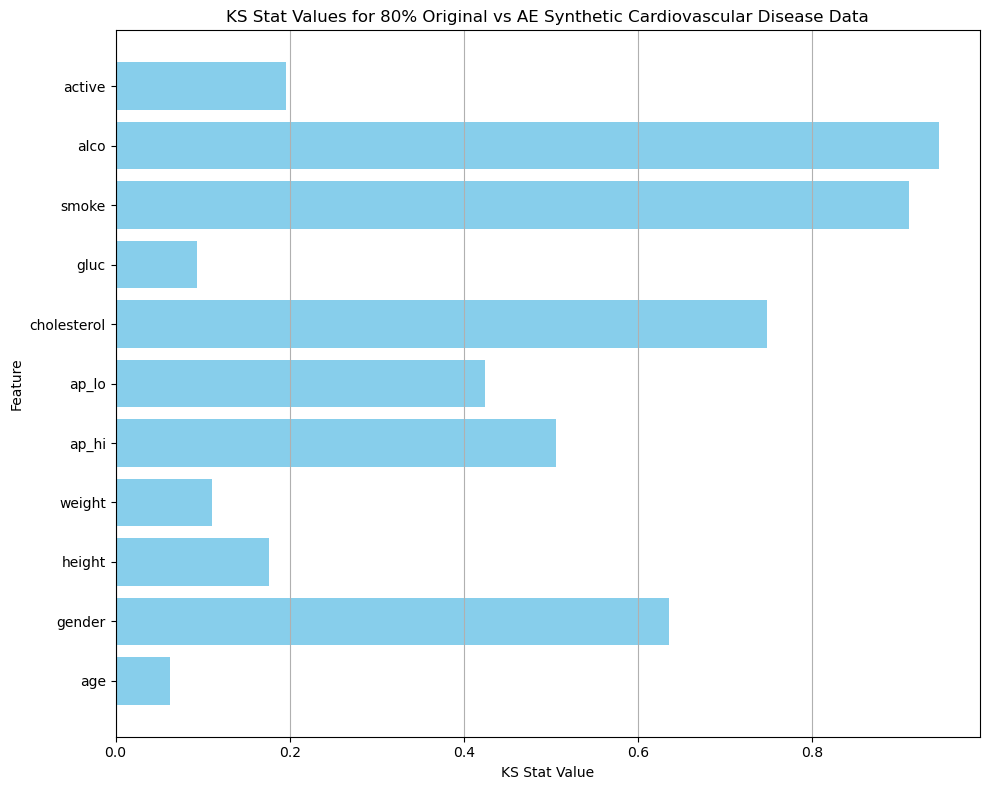

In [122]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'results_df' is the DataFrame with our statistical analysis results
results_df = pd.DataFrame({
    'Feature': ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active'],
    'KS Stat': [0.06225, 0.635661, 0.176054, 0.111018, 0.505768, 0.423911, 0.748375, 0.093232, 0.91125, 0.945161, 0.196232],
    'KS P-Value': [9.098879e-95, 0.0, 0.0, 4.960728e-301, 0.0, 0.0, 0.0, 2.924432e-212, 0.0, 0.0, 0.0]
})

plt.figure(figsize=(10, 8))
plt.barh(results_df['Feature'], results_df['KS Stat'], color='skyblue')
plt.xlabel('KS Stat Value')
plt.ylabel('Feature')
plt.title('KS Stat Values for 80% Original vs AE Synthetic Cardiovascular Disease Data')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


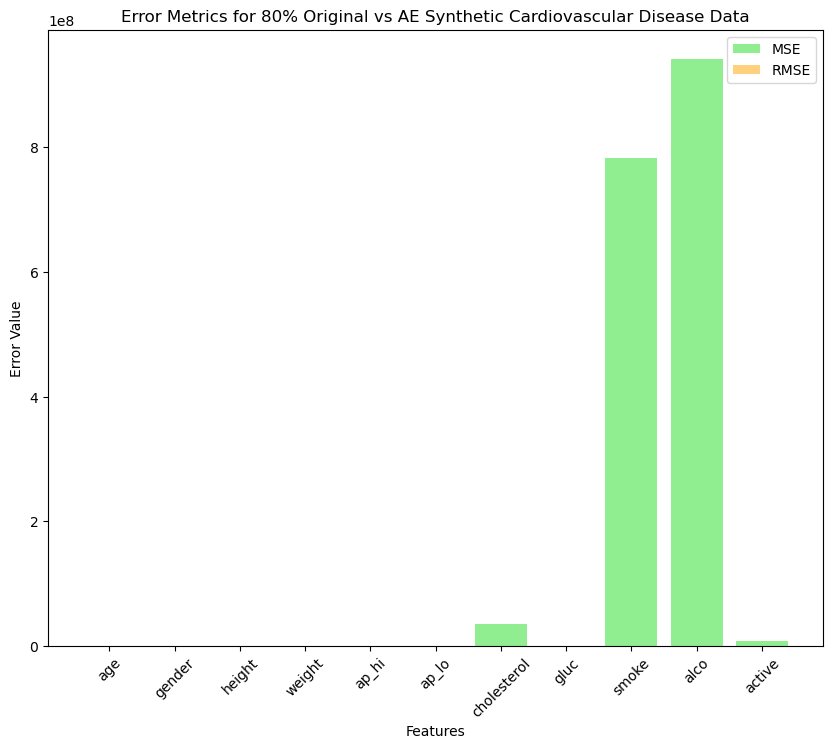

In [156]:
features = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
mse = [3.883827e-03, 2.166981e+05, 2.931338e-01, 9.526891e-02, 4.264288e-02, 2.846829e-01, 3.559789e+07, 2.420648e+05, 7.827768e+08, 9.412467e+08, 7.879198e+06]
rmse = [mse[i]**0.5 for i in range(len(mse))]  # Calculating RMSE based on the MSE values

plt.figure(figsize=(10, 8))
plt.bar(features, mse, color='lightgreen', label='MSE')
plt.bar(features, rmse, color='orange', label='RMSE', alpha=0.5)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Error Value')
plt.title('Error Metrics for 80% Original vs AE Synthetic Cardiovascular Disease Data')
plt.legend()
plt.show()


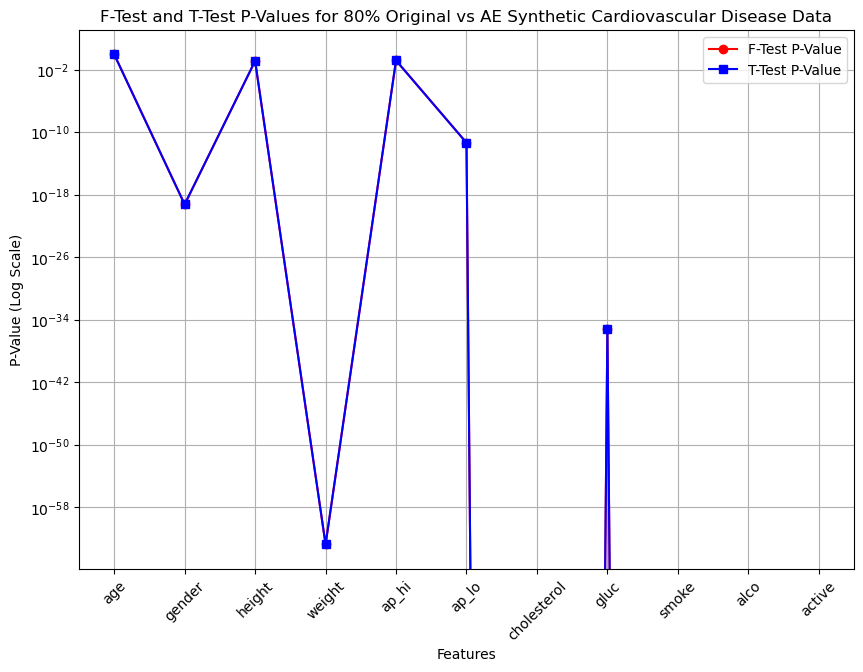

In [157]:
f_test_p_value = [8.913405e-01, 5.846648e-20, 1.293148e-01, 1.903612e-63, 1.511010e-01, 4.470833e-12, 0.0, 6.942658e-36, 0.0, 0.0, 0.0]
t_test_p_value = [8.913405e-01, 5.846648e-20, 1.293148e-01, 1.903589e-63, 1.511010e-01, 4.470826e-12, 0.0, 6.942658e-36, 0.0, 0.0, 0.0]

plt.figure(figsize=(10, 7))
plt.plot(features, f_test_p_value, '-o', label='F-Test P-Value', color='red')
plt.plot(features, t_test_p_value, '-s', label='T-Test P-Value', color='blue')
plt.yscale('log')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('P-Value (Log Scale)')
plt.title('F-Test and T-Test P-Values for 80% Original vs AE Synthetic Cardiovascular Disease Data')
plt.legend()
plt.grid(True)
plt.show()



# CLASSIFICATION REPORT FOR 80% AE SYNTHETIC AND ORIGINALCARDIOVASCULAR DISEASE DATA

In [98]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Adjusting model complexity by limiting the depth
classifier_orig = GradientBoostingClassifier(max_depth=1000, n_estimators=1000, random_state=42)
classifier_orig.fit(X_train_orig, y_train_orig)

# Predicting on the test set
y_pred = classifier_orig.predict(X_test_cont) # TRTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred, digits=2)
print("GB on 80% Original Cardio/Tested on 20% Control Data (TRTR):\n", report)


# Adjusting model complexity by limiting the depth
classifier_syn = GradientBoostingClassifier()
classifier_syn.fit(X_train_syn_ae, y_train_syn_ae)


# Predicting on the test set
y_pred1 = classifier_syn.predict(X_test_cont) # TSTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred1, digits=2)
print("GB on 80% AE SyntheticCardio/Tested on 20% Control Data (TSTR):\n", report)


GB on 80% Original Cardio/Tested on 20% Control Data (TRTR):
               precision    recall  f1-score   support

           0       0.64      0.64      0.64      1403
           1       0.64      0.65      0.64      1397

    accuracy                           0.64      2800
   macro avg       0.64      0.64      0.64      2800
weighted avg       0.64      0.64      0.64      2800

GB on 80% AE SyntheticCardio/Tested on 20% Control Data (TSTR):
               precision    recall  f1-score   support

           0       0.68      0.84      0.75      1403
           1       0.79      0.60      0.68      1397

    accuracy                           0.72      2800
   macro avg       0.73      0.72      0.71      2800
weighted avg       0.73      0.72      0.71      2800



In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Adjusting model complexity by limiting the depth
classifier_orig = RandomForestClassifier(max_depth=1000, n_estimators=1000, random_state=42)
classifier_orig.fit(X_train_orig, y_train_orig)

# Predicting on the test set
y_pred = classifier_orig.predict(X_test_cont) # TRTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred, digits=2)
print("RF on 80% Original Cardio/Tested on 20% Control Data (TRTR):\n", report)


# Adjusting model complexity by limiting the depth
classifier_syn = RandomForestClassifier(max_depth=1000, n_estimators=1000, random_state=42)
classifier_syn.fit(X_train_syn_ae, y_train_syn_ae)


# Predicting on the test set
y_pred1 = classifier_syn.predict(X_test_cont) # TSTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred1, digits=2)
print("RF on 80% AE Synthetic Cardio/Tested on 20% Control Data (TSTR):\n", report)


RF on 80% Original Cardio/Tested on 20% Control Data (TRTR):
               precision    recall  f1-score   support

           0       0.72      0.74      0.73      1403
           1       0.73      0.71      0.72      1397

    accuracy                           0.73      2800
   macro avg       0.73      0.73      0.73      2800
weighted avg       0.73      0.73      0.73      2800

RF on 80% AE Synthetic Cardio/Tested on 20% Control Data (TSTR):
               precision    recall  f1-score   support

           0       0.69      0.83      0.76      1403
           1       0.79      0.63      0.70      1397

    accuracy                           0.73      2800
   macro avg       0.74      0.73      0.73      2800
weighted avg       0.74      0.73      0.73      2800



In [115]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Ensure the 'enable_categorical' parameter is set to True if your XGBoost version supports it.
# This instructs XGBoost to handle categorical features directly.
classifier_orig = XGBClassifier(max_depth=5, n_estimators=100, random_state=42, enable_categorical=True)
classifier_orig.fit(X_train_orig, y_train_orig_encoded)

# Predicting on the test set
y_pred = classifier_orig.predict(X_test_cont)

# Generating the classification report
report = classification_report(y_test_cont_encoded, y_pred, digits=2)
print("XGB on 80% Original Cardio/Tested on 20% Control Data (TRTR):\n", report)

classifier_syn = XGBClassifier(max_depth=5, n_estimators=100, random_state=42, enable_categorical=True)
classifier_syn.fit(X_train_syn_ae, y_train_syn_ae)

# Predicting on the test set for synthetic data
y_pred1 = classifier_syn.predict(X_test_cont)

# Generating the classification report for synthetic data
report = classification_report(y_test_cont_encoded, y_pred1, digits=2)
print("XGB on 80% AE Synthetic Cardio/Tested on 20% Control Data (TSTR):\n", report)


XGB on 80% Original Cardio/Tested on 20% Control Data (TRTR):
               precision    recall  f1-score   support

           0       0.51      0.96      0.67      1403
           1       0.69      0.09      0.16      1397

    accuracy                           0.53      2800
   macro avg       0.60      0.52      0.41      2800
weighted avg       0.60      0.53      0.41      2800

XGB on 80% AE Synthetic Cardio/Tested on 20% Control Data (TSTR):
               precision    recall  f1-score   support

           0       0.50      0.66      0.57      1403
           1       0.50      0.34      0.41      1397

    accuracy                           0.50      2800
   macro avg       0.50      0.50      0.49      2800
weighted avg       0.50      0.50      0.49      2800



In [101]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Adjusting model complexity by limiting the depth
classifier_orig = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, max_iter=200, random_state=42)
classifier_orig.fit(X_train_orig, y_train_orig)

# Predicting on the test set
y_pred = classifier_orig.predict(X_test_cont) # TRTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred, digits=2)
print("MLP on 80% Original Cardio/Tested on 20% Control Data (TRTR):\n", report)


# Adjusting model complexity by limiting the depth
classifier_syn = MLPClassifier(hidden_layer_sizes=(200,), activation='relu', solver='adam', alpha=0.0003, max_iter=1000, random_state=42)
classifier_syn.fit(X_train_syn_ae, y_train_syn_ae)


# Predicting on the test set
y_pred1 = classifier_syn.predict(X_test_cont) # TSTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred1, digits=2)
print("MLP on 80% AE Synthetic Cardio/Tested on 20% Control Data (TSTR):\n", report)


MLP on 80% Original Cardio/Tested on 20% Control Data (TRTR):
               precision    recall  f1-score   support

           0       0.74      0.76      0.75      1403
           1       0.75      0.74      0.74      1397

    accuracy                           0.75      2800
   macro avg       0.75      0.75      0.75      2800
weighted avg       0.75      0.75      0.75      2800

MLP on 80% AE Synthetic Cardio/Tested on 20% Control Data (TSTR):
               precision    recall  f1-score   support

           0       0.68      0.80      0.73      1403
           1       0.76      0.61      0.68      1397

    accuracy                           0.71      2800
   macro avg       0.72      0.71      0.71      2800
weighted avg       0.72      0.71      0.71      2800



In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Adjusting model complexity by limiting the depth
classifier_orig = DecisionTreeClassifier()
classifier_orig.fit(X_train_orig, y_train_orig)

# Predicting on the test set
y_pred = classifier_orig.predict(X_test_cont) # TRTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred, digits=2)
print("DCT on 80% Original Cardio/Tested on 20% Control Data (TRTR):\n", report)


# Adjusting model complexity by limiting the depth
classifier_syn = DecisionTreeClassifier()
classifier_syn.fit(X_train_syn_ae, y_train_syn_ae)


# Predicting on the test set
y_pred1 = classifier_syn.predict(X_test_cont) # TSTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred1, digits=2)
print("DCT on 80% AE Synthetic Cardio/Tested on 20% Control Data (TSTR):\n", report)


DCT on 80% Original Cardio/Tested on 20% Control Data (TRTR):
               precision    recall  f1-score   support

           0       0.63      0.63      0.63      1403
           1       0.63      0.63      0.63      1397

    accuracy                           0.63      2800
   macro avg       0.63      0.63      0.63      2800
weighted avg       0.63      0.63      0.63      2800

DCT on 80% AE Synthetic Cardio/Tested on 20% Control Data (TSTR):
               precision    recall  f1-score   support

           0       0.59      0.81      0.69      1403
           1       0.70      0.44      0.54      1397

    accuracy                           0.63      2800
   macro avg       0.65      0.63      0.61      2800
weighted avg       0.65      0.63      0.61      2800



In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Adjusting model complexity by limiting the depth
classifier_orig = LogisticRegression(C=1.0, solver='lbfgs', random_state=42, max_iter=1500)
classifier_orig.fit(X_train_orig, y_train_orig)

# Predicting on the test set
y_pred = classifier_orig.predict(X_test_cont) # TRTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred, digits=2)
print("LGR on 80% Original Cardio/Tested on 20% Control Data (TRTR):\n", report)


# Adjusting model complexity by limiting the depth
classifier_syn = LogisticRegression(C=1.0, solver='lbfgs', random_state=42, max_iter=1500)
classifier_syn.fit(X_train_syn_ae, y_train_syn_ae)


# Predicting on the test set
y_pred1 = classifier_syn.predict(X_test_cont) # TSTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred1, digits=2)
print("LGR on 80% AE Synthetic Cardio/Tested on 20% Control Data (TSTR):\n", report)


LGR on 80% Original Cardio/Tested on 20% Control Data (TRTR):
               precision    recall  f1-score   support

           0       0.71      0.77      0.74      1403
           1       0.75      0.69      0.72      1397

    accuracy                           0.73      2800
   macro avg       0.73      0.73      0.73      2800
weighted avg       0.73      0.73      0.73      2800

LGR on 80% AE Synthetic Cardio/Tested on 20% Control Data (TSTR):
               precision    recall  f1-score   support

           0       0.66      0.71      0.68      1403
           1       0.68      0.63      0.65      1397

    accuracy                           0.67      2800
   macro avg       0.67      0.67      0.67      2800
weighted avg       0.67      0.67      0.67      2800



In [117]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Adjusting model complexity by limiting the depth
classifier_orig = KNeighborsClassifier()
classifier_orig.fit(X_train_orig, y_train_orig)

# Predicting on the test set
y_pred = classifier_orig.predict(X_test_cont) # TRTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred, digits=2)
print("KNN on 80% Original Cardio/Tested on 20% Control Data (TRTR):\n", report)


# Adjusting model complexity by limiting the depth
classifier_syn = KNeighborsClassifier()
classifier_syn.fit(X_train_syn_ae, y_train_syn_ae)


# Predicting on the test set
y_pred1 = classifier_syn.predict(X_test_cont) # TSTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred1, digits=2)
print("KNN on 80% AE Synthetic Cardio/Tested on 20% Control Data (TSTR):\n", report)


KNN on 80% Original Cardio/Tested on 20% Control Data (TRTR):
               precision    recall  f1-score   support

           0       0.67      0.68      0.68      1403
           1       0.67      0.66      0.67      1397

    accuracy                           0.67      2800
   macro avg       0.67      0.67      0.67      2800
weighted avg       0.67      0.67      0.67      2800

KNN on 80% AE Synthetic Cardio/Tested on 20% Control Data (TSTR):
               precision    recall  f1-score   support

           0       0.64      0.67      0.66      1403
           1       0.65      0.63      0.64      1397

    accuracy                           0.65      2800
   macro avg       0.65      0.65      0.65      2800
weighted avg       0.65      0.65      0.65      2800



In [119]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

# Adjusting model complexity by limiting the depth
classifier_orig = LGBMClassifier()
classifier_orig.fit(X_train_orig, y_train_orig)

# Predicting on the test set
y_pred = classifier_orig.predict(X_test_cont) # TRTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred, digits=2)
print("LGBM on 80% Original Cardio/Tested on 20% Control Data (TRTR):\n", report)


# Adjusting model complexity by limiting the depth
classifier_syn = LGBMClassifier()
classifier_syn.fit(X_train_syn_ae, y_train_syn_ae)


# Predicting on the test set
y_pred1 = classifier_syn.predict(X_test_cont) # TSTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred1, digits=2)
print("LGBM on 80% AE Synthetic Cardio/Tested on 20% Control Data (TSTR):\n", report)


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 22315, number of negative: 22485
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6186
[LightGBM] [Info] Number of data points in the train set: 44800, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498103 -> initscore=-0.007589
[LightGBM] [Info] Start training from score -0.007589
LGBM on 80% Original Cardio/Tested on 20% Control Data (TRTR):
               precision    recall  f1-score   support

           0       0.70      0.78      0.74      1403
           1       0.75      0.67     

In [120]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Adjusting model complexity by limiting the depth
classifier_orig = SVC(probability=True)
classifier_orig.fit(X_train_orig, y_train_orig)

# Predicting on the test set
y_pred = classifier_orig.predict(X_test_cont) # TRTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred, digits=2)
print("SVC on 80% Original Cardio/Tested on 20% Control Data (TRTR):\n", report)


# Adjusting model complexity by limiting the depth
classifier_syn = SVC(probability=True)
classifier_syn.fit(X_train_syn_ae, y_train_syn_ae)


# Predicting on the test set
y_pred1 = classifier_syn.predict(X_test_cont) # TSTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred1, digits=2)
print("SVC on 80% AE Synthetic Cardio/Tested on 20% Control Data (TSTR):\n", report)


SVC on 80% Original Cardio/Tested on 20% Control Data (TRTR):
               precision    recall  f1-score   support

           0       0.73      0.77      0.75      1403
           1       0.75      0.71      0.73      1397

    accuracy                           0.74      2800
   macro avg       0.74      0.74      0.74      2800
weighted avg       0.74      0.74      0.74      2800

SVC on 80% AE Synthetic Cardio/Tested on 20% Control Data (TSTR):
               precision    recall  f1-score   support

           0       0.68      0.74      0.71      1403
           1       0.71      0.65      0.68      1397

    accuracy                           0.69      2800
   macro avg       0.69      0.69      0.69      2800
weighted avg       0.69      0.69      0.69      2800



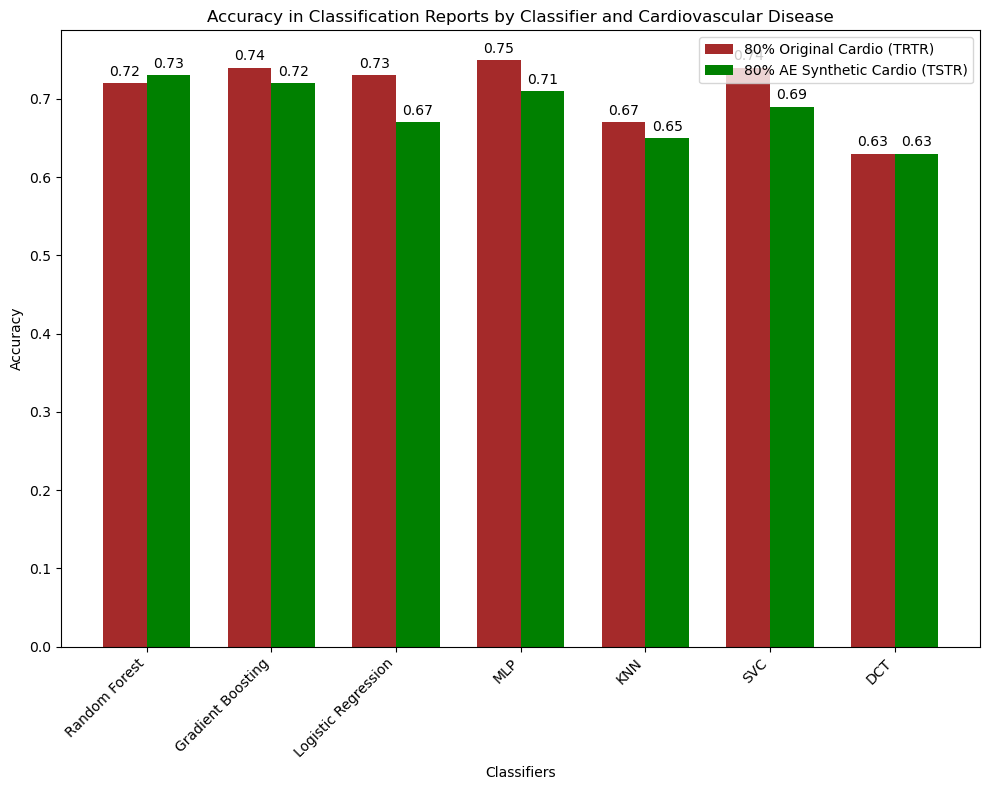

In [158]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the classification reports
classifiers = ['Random Forest', 'Gradient Boosting', 'Logistic Regression', 'MLP', 'KNN', 'SVC', 'DCT']
# Accuracy for TRTR - Original
accuracy_original = [0.72, 0.74, 0.73, 0.75, 0.67, 0.74, 0.63]
# Accuracy for TSTR - AE Synthetic
accuracy_synthetic = [0.73, 0.72, 0.67, 0.71, 0.65, 0.69, 0.63]

x = np.arange(len(classifiers))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 8))
rects1 = ax.bar(x - width/2, accuracy_original, width, label='80% Original Cardio (TRTR)', color='brown')
rects2 = ax.bar(x + width/2, accuracy_synthetic, width, label='80% AE Synthetic Cardio (TSTR)', color='green')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.xlabel('Classifiers')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy in Classification Reports by Classifier and Cardiovascular Disease')  
ax.set_xticks(x)
ax.set_xticklabels(classifiers, rotation=45, ha="right")
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()


# CORRELATION MATRIX FOR ORIGINAL AND AE SYNTHETIC CARDIOVASCULAR DISEASE

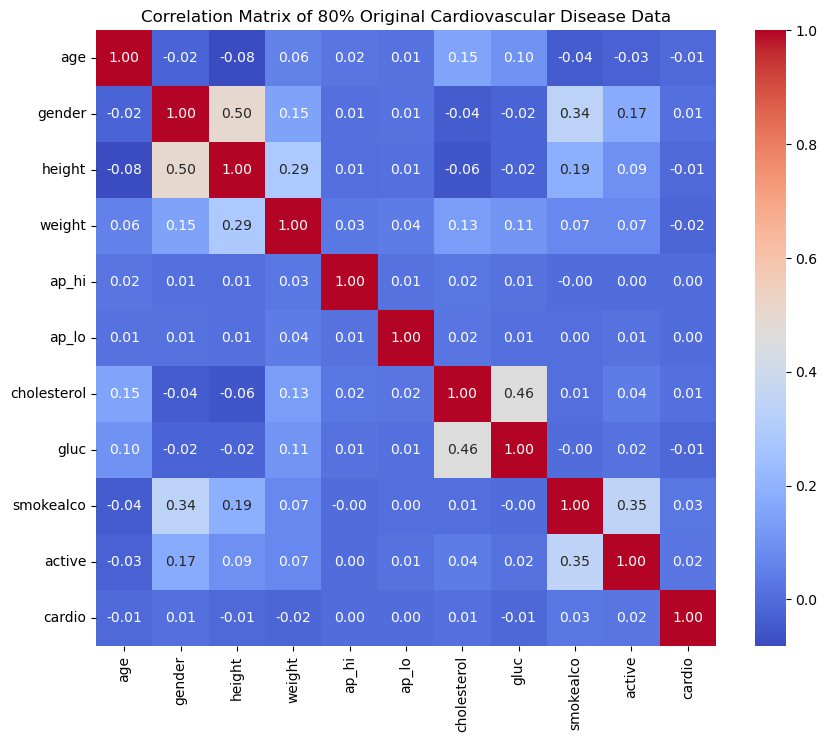

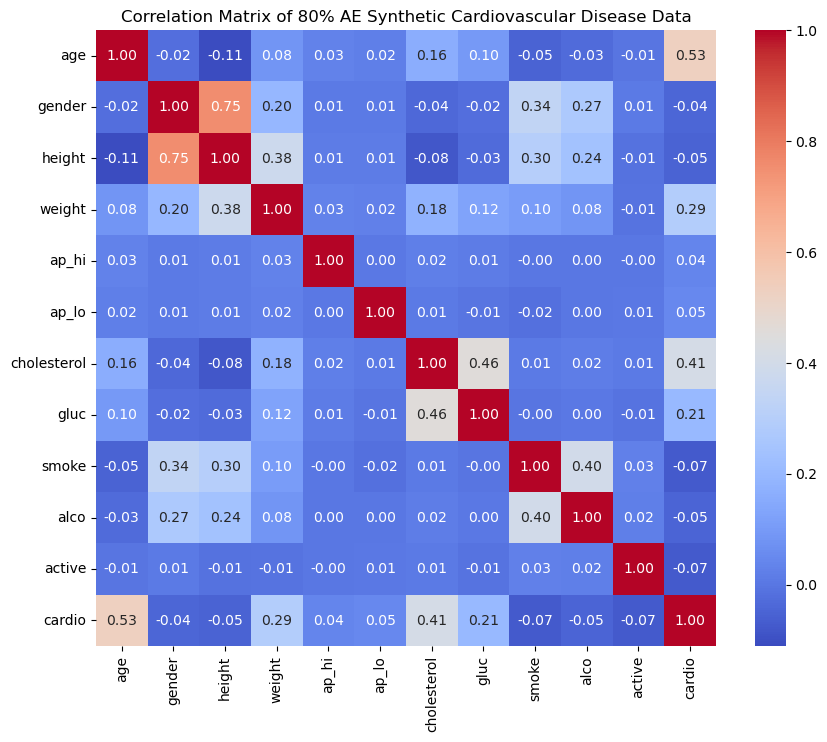

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

columns = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke' 'alco', 'active', 'cardio']

def plot_correlation_matrix(data, title):
    # Calculate the correlation matrix
    corr_matrix = data.corr()

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title(title)
    plt.show()

    
    
# Assuming 'columns' is a list of column names for your original dataset
X_train_orig_df = pd.DataFrame(X_train_orig_scaled, columns=columns)

# Plot correlation matrix for original data
plot_correlation_matrix(X_train_orig_df, "Correlation Matrix of 80% Original Cardiovascular Disease Data")

# Plot correlation matrix for synthetic data   
# plot_correlation_matrix(ae_synthetic_data_df, "Correlation Matrix of AE Synthetic Data")

# Plot correlation matrix for synthetic data   ae_synthetic_data_df
plot_correlation_matrix(ae_synthetic_cardio_data_labels_df, "Correlation Matrix of 80% AE Synthetic Cardiovascular Disease Data")


# Computing Numerical Correlation Matrices of Original and Synthetic Datasets

In [94]:
# For the original dataset
print('80% Original Cardiovascular Disease Numerical Correlation Matrix:')
print(X_train_orig_df.corr())

# For the AE synthetic dataset
print('80% AE-Synthetic Cardiovascular Disease Numerical Correlation Matrix:')
print(ae_synthetic_cardio_data_labels_df.corr())

80% Original Cardiovascular Disease Numerical Correlation Matrix:
                  age    gender    height    weight     ap_hi     ap_lo  \
age          1.000000 -0.020278 -0.081830  0.056823  0.021680  0.014829   
gender      -0.020278  1.000000  0.499212  0.149952  0.009822  0.013883   
height      -0.081830  0.499212  1.000000  0.288823  0.006378  0.008180   
weight       0.056823  0.149952  0.288823  1.000000  0.031023  0.039502   
ap_hi        0.021680  0.009822  0.006378  0.031023  1.000000  0.014467   
ap_lo        0.014829  0.013883  0.008180  0.039502  0.014467  1.000000   
cholesterol  0.152158 -0.040235 -0.056692  0.133434  0.024208  0.022338   
gluc         0.098642 -0.020276 -0.019545  0.105221  0.012083  0.010565   
smokealco   -0.039929  0.339518  0.188967  0.070610 -0.000748  0.003986   
active      -0.027936  0.174355  0.093014  0.071846  0.001241  0.011548   
cardio      -0.009441  0.008349 -0.009704 -0.018160  0.001909  0.002647   

             cholesterol      glu

# BAR GRAPH AND SCATTER PLOTS FOR RESULTS FROM CORRELATION MATRIX

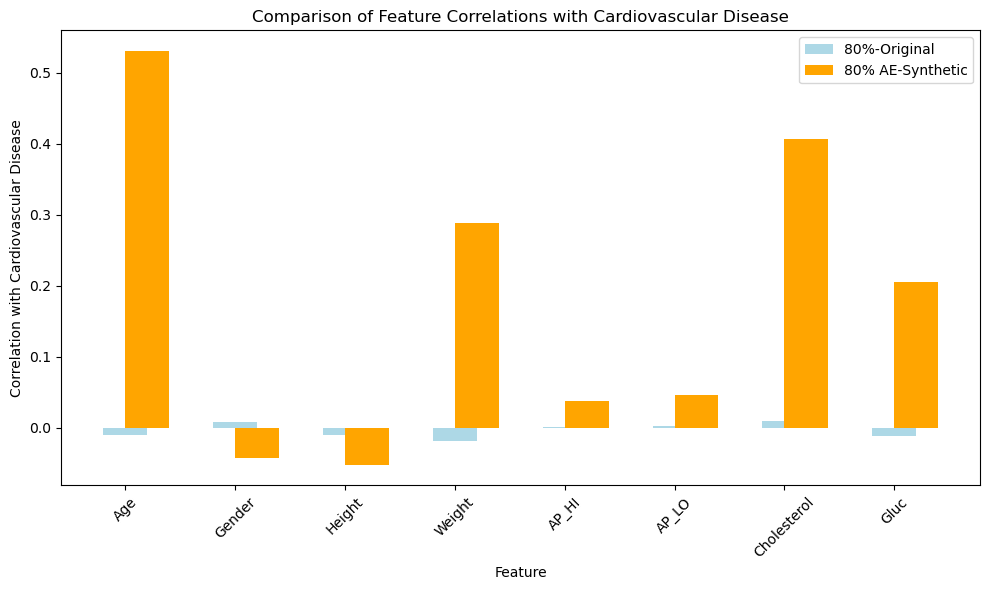

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Creating a simplified version of the correlation matrices for illustration purposes
# Original Dataset Correlations
original_corrs = {
    'Feature': ['Age', 'Gender', 'Height', 'Weight', 'AP_HI', 'AP_LO', 'Cholesterol', 'Gluc'],
    'Cardio': [-0.009441, 0.008349, -0.009704, -0.018160, 0.001909, 0.002647, 0.009375, -0.010868]
}

# AE-Synthetic Dataset Correlations
synthetic_corrs = {
    'Feature': ['Age', 'Gender', 'Height', 'Weight', 'AP_HI', 'AP_LO', 'Cholesterol', 'Gluc'],
    'Cardio': [0.530706, -0.041845, -0.051751, 0.289010, 0.037267, 0.045784, 0.407007, 0.205468]
}

original_df = pd.DataFrame(original_corrs)
synthetic_df = pd.DataFrame(synthetic_corrs)

# Plotting the Bar Graph of Key Correlations
plt.figure(figsize=(10, 6))
plt.bar(original_df['Feature'], original_df['Cardio'], width=0.4, label='80%-Original', align='center', color='lightblue')
plt.bar(synthetic_df['Feature'], synthetic_df['Cardio'], width=0.4, label='80% AE-Synthetic', align='edge', color='orange')
plt.xlabel('Feature')
plt.ylabel('Correlation with Cardiovascular Disease')
plt.title('Comparison of Feature Correlations with Cardiovascular Disease')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


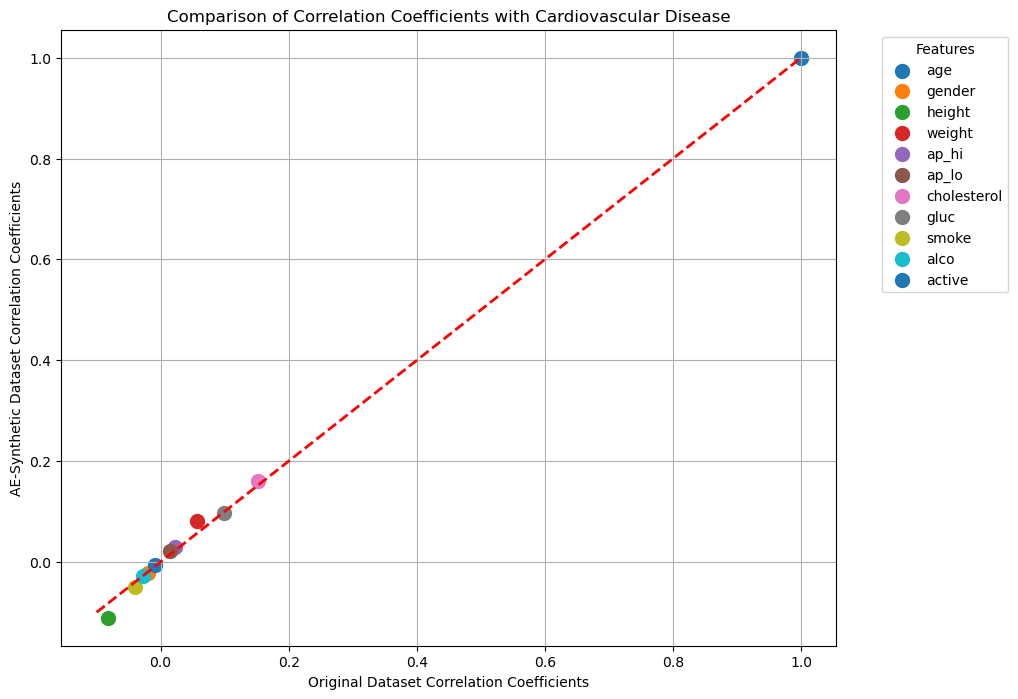

In [128]:
# Choosing a scatter plot for enriching the report, as it can vividly showcase the dynamics of correlation shifts
# between the original and synthetic datasets for each feature with cardiovascular disease.

# Preparing data for the scatter plot
features = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
orig_corrs = [1.00, -0.020278, -0.081830, 0.056823, 0.021680, 0.014829, 0.152158, 0.098642, -0.039929, -0.027936, -0.009441]
synth_corrs = [1.00, -0.022764, -0.110796, 0.081774, 0.029132, 0.020848, 0.161116, 0.096139, -0.050787, -0.028871, -0.006088]

# Plotting
plt.figure(figsize=(10, 8))
for i, feature in enumerate(features):
    plt.scatter(orig_corrs[i], synth_corrs[i], label=f'{feature}', s=100)
    
# Plotting a line for perfect agreement
plt.plot([-0.1, 1.0], [-0.1, 1.0], 'r--', lw=2)

plt.title('Comparison of Correlation Coefficients with Cardiovascular Disease')
plt.xlabel('Original Dataset Correlation Coefficients')
plt.ylabel('AE-Synthetic Dataset Correlation Coefficients')
plt.legend(title="Features", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


# INSTALL THE PRIVACY ASSESSMENT TOOL KITS KNOWN AS ANONYMETER AS MENTIONED ABOVE IN STEP 2

In [ ]:
!pip install anonymeter

# IMPORTING THE INSTALLED ANONYMETER'S PRIVACY RISK EVALUATORS FOR PRIVACY PRESERVATION ASSESSMENT ON THE GENERATED SYNTHETIC DATASET
For more detailed information on the usage of this tool do visit the author's website(blogger) via the links below.

https://www.anonos.com/blog/presenting-anonymeter-the-tool-for-assessing-privacy-risks-in-synthetic-datasets

https://github.com/statice/anonymeter

In [202]:
import pandas as pd
from anonymeter.evaluators import SinglingOutEvaluator, LinkabilityEvaluator, InferenceEvaluator

In [201]:
# Convert float32 columns to float64 in the synthetic dataset
float_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
ae_synthetic_cardio_data_labels_df[float_cols] = ae_synthetic_cardio_data_labels_df[float_cols].astype('float64')

# Convert categorical columns back to category in the synthetic dataset
category_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
for col in category_cols:
    # It's important to ensure the category mappings are consistent across datasets
    ae_synthetic_cardio_data_labels_df[col] = ae_synthetic_cardio_data_labels_df[col].astype('category')

# Now, check the info again to ensure the conversion is successful
ae_synthetic_cardio_data_labels_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          56000 non-null  float64 
 1   gender       56000 non-null  category
 2   height       56000 non-null  float64 
 3   weight       56000 non-null  float64 
 4   ap_hi        56000 non-null  float64 
 5   ap_lo        56000 non-null  float64 
 6   cholesterol  56000 non-null  category
 7   gluc         56000 non-null  category
 8   smoke        56000 non-null  category
 9   alco         56000 non-null  category
 10  active       56000 non-null  category
 11  cardio       56000 non-null  category
dtypes: category(7), float64(5)
memory usage: 9.4 MB


# STEP 3A: PRIVACY RISK ASSESSMENT VIA UNIVARIATE MODE ON 80% AE-SYNTHETIC CARDIO DISEASE DATASET

In [154]:
singling_out = SinglingOutEvaluator(ori=cardiovascular_train_dataframe, 
                                              syn=ae_synthetic_cardio_data_labels_df, 
                                              control=control_cardio_dataframe,
                                              n_attacks=1500)

try:
    singling_out.evaluate(mode='univariate')  # For univariate analysis
    # For multivariate analysis, you can change mode to 'multivariate'
    singling_out_risk = singling_out.risk()
    print("Singling Out Risk Type via Univariate Analysis When n_attacks=1500 for AE Synthetc Cardiovascular Data:", singling_out_risk)
except RuntimeError as ex:
    print(f"Singling out evaluation failed: {ex}")

Singling Out Risk Type via Univariate Analysis When n_attacks=1500 for AE Synthetc Cardiovascular Data: PrivacyRisk(value=0.0, ci=(0.0, 0.0018085652115795217))


C:\Users\Ede\anaconda3\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.001277215360090744, baseline = 0.001277215360090744. Analysis results cannot be trusted.
  self._sanity_check()


In [155]:
res = singling_out.results()

print("The Singling Out Risk Type via Univariate Analysis When n_attacks=1500 for AE Synthetc Cardiovascular Data:")
print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

The Singling Out Risk Type via Univariate Analysis When n_attacks=1500 for AE Synthetc Cardiovascular Data:
Successs rate of main attack: SuccessRate(value=0.001277215360090744, error=0.001277215360090744)
Successs rate of baseline attack: SuccessRate(value=0.001277215360090744, error=0.001277215360090744)
Successs rate of control attack: SuccessRate(value=0.001277215360090744, error=0.001277215360090744)


In [156]:
singling_out1 = SinglingOutEvaluator(ori=cardiovascular_train_dataframe, 
                                              syn=ae_synthetic_cardio_data_labels_df, 
                                              control=control_cardio_dataframe,
                                              n_attacks=500)

try:
    singling_out1.evaluate(mode='univariate')  # For univariate analysis
    # For multivariate analysis, you can change mode to 'multivariate'
    singling_out_risk = singling_out1.risk()
    print("Singling Out Risk Type via Univariate Analysis When n_attacks=500 for AE Synthetc Cardiovascular Data:", singling_out_risk)
except RuntimeError as ex:
    print(f"Singling out evaluation failed: {ex}")

Singling Out Risk Type via Univariate Analysis When n_attacks=500 for AE Synthetc Cardiovascular Data: PrivacyRisk(value=0.0, ci=(0.0, 0.005411853750198381))


C:\Users\Ede\anaconda3\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.0038121702307761206, baseline = 0.0038121702307761206. Analysis results cannot be trusted.
  self._sanity_check()


In [157]:
res = singling_out1.results()

print("The Singling Out Risk Type via Univariate Analysis When n_attacks=500 for AE Synthetc Cardiovascular Data:")
print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

The Singling Out Risk Type via Univariate Analysis When n_attacks=500 for AE Synthetc Cardiovascular Data:
Successs rate of main attack: SuccessRate(value=0.0038121702307761206, error=0.00381217023077612)
Successs rate of baseline attack: SuccessRate(value=0.0038121702307761206, error=0.00381217023077612)
Successs rate of control attack: SuccessRate(value=0.0038121702307761206, error=0.00381217023077612)


# GRAPHICAL REPRESENTATIONS OF THE ABOVE PRIVACY RISK NUMERICAL RESULTS

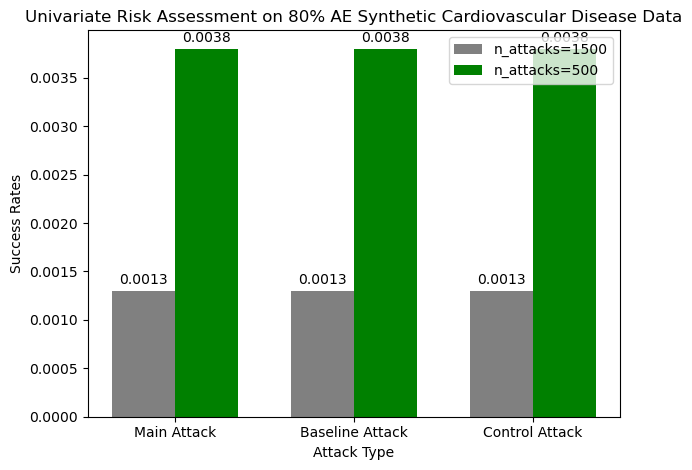

In [168]:
import matplotlib.pyplot as plt

# Data from the attacks
attacks = ["Main Attack", "Baseline Attack", "Control Attack"]
success_rates_1500 = [0.0013, 0.0013, 0.0013]
success_rates_500 = [0.0038, 0.0038, 0.0038]

# Bar Chart
fig, ax = plt.subplots()
bar_width = 0.35
index = range(len(attacks))

bar1 = ax.bar(index, success_rates_1500, bar_width, label='n_attacks=1500', color='grey')
bar2 = ax.bar([p + bar_width for p in index], success_rates_500, bar_width, label='n_attacks=500', color='green')

# Success Rates by Attack Type and Number of Attacks
ax.set_xlabel('Attack Type')
ax.set_ylabel('Success Rates')
ax.set_title('Univariate Risk Assessment on 80% AE Synthetic Cardiovascular Disease Data')
ax.set_xticks([p + bar_width/2 for p in index])
ax.set_xticklabels(attacks)
ax.legend()
    
ax.bar_label(bar1, padding=3, fmt='%.4f')
ax.bar_label(bar2, padding=3, fmt='%.4f')

plt.tight_layout()
plt.show()


Univariate Risk Assessment Success vs. Failure Rates via 1500 and 500 Attacks on 80% AE Synthetic Cardiovascular Disease


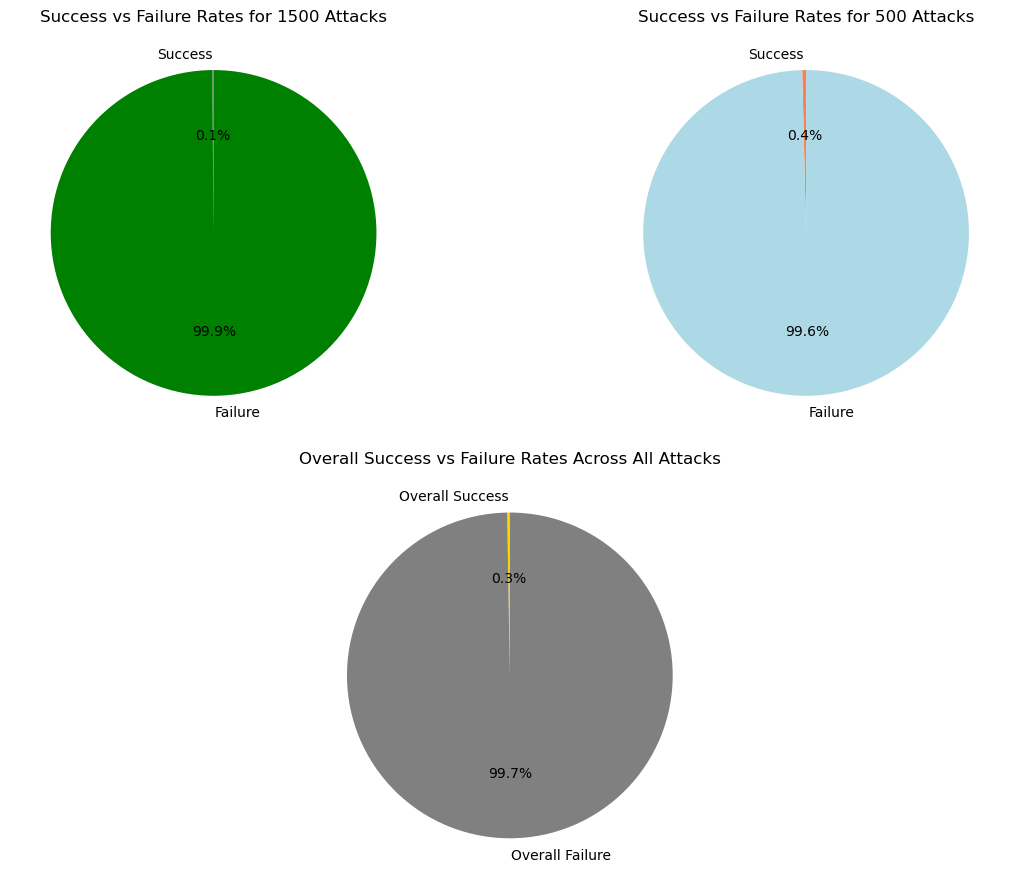

In [170]:
import matplotlib.pyplot as plt

print('Univariate Risk Assessment Success vs. Failure Rates via 1500 and 500 Attacks on 80% AE Synthetic Cardiovascular Disease')

# Data for 1500 attacks
success_rate_1500 = 0.0013
failure_rate_1500 = 1 - success_rate_1500

# Data for 500 attacks
success_rate_500 = 0.0038
failure_rate_500 = 1 - success_rate_500

# Overall success rate considering all attacks
overall_success_rate = (success_rate_1500 + success_rate_500) / 2
overall_failure_rate = 1 - overall_success_rate

# Custom colors
colors_1500 = ['grey', 'green']  # Custom colors for the 1500 attacks chart
colors_500 = ['coral', 'lightblue']  # Custom colors for the 500 attacks chart
overall_colors = ['gold', 'grey']  # Custom colors for the overall chart

# Pie chart for 1500 attacks
plt.figure(figsize=(12, 9))
plt.subplot(2, 2, 1)
plt.pie([success_rate_1500, failure_rate_1500], labels=['Success', 'Failure'], autopct='%1.1f%%', startangle=90, colors=colors_1500)
plt.title('Success vs Failure Rates for 1500 Attacks')

# Pie chart for 500 attacks
plt.subplot(2, 2, 2)
plt.pie([success_rate_500, failure_rate_500], labels=['Success', 'Failure'], autopct='%1.1f%%', startangle=90, colors=colors_500)
plt.title('Success vs Failure Rates for 500 Attacks')

# Overall pie chart
plt.subplot(2, 1, 2)
plt.pie([overall_success_rate, overall_failure_rate], labels=['Overall Success', 'Overall Failure'], autopct='%1.1f%%', startangle=90, colors=overall_colors)
plt.title('Overall Success vs Failure Rates Across All Attacks')

plt.tight_layout()
plt.show()


# STEP 3B: PRIVACY RISK ASSESSMENT VIA MULTIVARIATE MODE ON 80% AE-SYNTHETIC CARDIO DISEASE DATASET

In [158]:
singling_out2 = SinglingOutEvaluator(ori=cardiovascular_train_dataframe, 
                                              syn=ae_synthetic_cardio_data_labels_df, 
                                              control=control_cardio_dataframe,
                                              n_attacks=1500)

try:
    singling_out2.evaluate(mode='multivariate')  # For univariate analysis
    # For multivariate analysis, you can change mode to 'multivariate'
    singling_out_risk = singling_out2.risk()
    print("Singling Out Risk Type via Multivariate Analysis When n_attacks=1500 for AE Synthetc Cardiovascular Data:", singling_out_risk)
except RuntimeError as ex:
    print(f"Singling out evaluation failed: {ex}")

Singling Out Risk Type via Multivariate Analysis When n_attacks=1500 for AE Synthetc Cardiovascular Data: PrivacyRisk(value=0.0, ci=(0.0, 0.0018085652115795217))


C:\Users\Ede\anaconda3\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.001277215360090744, baseline = 0.0019421790729439565. Analysis results cannot be trusted.
  self._sanity_check()


In [159]:
res = singling_out2.results()

print("The Singling Out Risk Type via Multivariate Analysis When n_attacks=1500 for AE Synthetc Cardiovascular Data:")
print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

The Singling Out Risk Type via Multivariate Analysis When n_attacks=1500 for AE Synthetc Cardiovascular Data:
Successs rate of main attack: SuccessRate(value=0.001277215360090744, error=0.001277215360090744)
Successs rate of baseline attack: SuccessRate(value=0.0019421790729439565, error=0.0018244863412695928)
Successs rate of control attack: SuccessRate(value=0.001277215360090744, error=0.001277215360090744)


In [160]:
singling_out3 = SinglingOutEvaluator(ori=cardiovascular_train_dataframe, 
                                              syn=ae_synthetic_cardio_data_labels_df, 
                                              control=control_cardio_dataframe,
                                              n_attacks=500)

try:
    singling_out3.evaluate(mode='multivariate')  # For univariate analysis
    # For multivariate analysis, you can change mode to 'multivariate'
    singling_out_risk = singling_out3.risk()
    print("Singling Out Risk Type via Multivariate Analysis When n_attacks=500 for AE Synthetc Cardiovascular Data:", singling_out_risk)
except RuntimeError as ex:
    print(f"Singling out evaluation failed: {ex}")

Singling Out Risk Type via Multivariate Analysis When n_attacks=500 for AE Synthetc Cardiovascular Data: PrivacyRisk(value=0.0, ci=(0.0, 0.005411853750198381))


C:\Users\Ede\anaconda3\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.0038121702307761206, baseline = 0.0038121702307761206. Analysis results cannot be trusted.
  self._sanity_check()


In [161]:
res = singling_out3.results()

print("The Singling Out Risk Type via Multivariate Analysis When n_attacks=500 for AE Synthetc Cardiovascular Data:")
print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

The Singling Out Risk Type via Multivariate Analysis When n_attacks=500 for AE Synthetc Cardiovascular Data:
Successs rate of main attack: SuccessRate(value=0.0038121702307761206, error=0.00381217023077612)
Successs rate of baseline attack: SuccessRate(value=0.0038121702307761206, error=0.00381217023077612)
Successs rate of control attack: SuccessRate(value=0.0038121702307761206, error=0.00381217023077612)


# GRAPHICAL REPRESENTATIONS OF THE ABOVE PRIVACY RISK NUMERICAL RESULTS

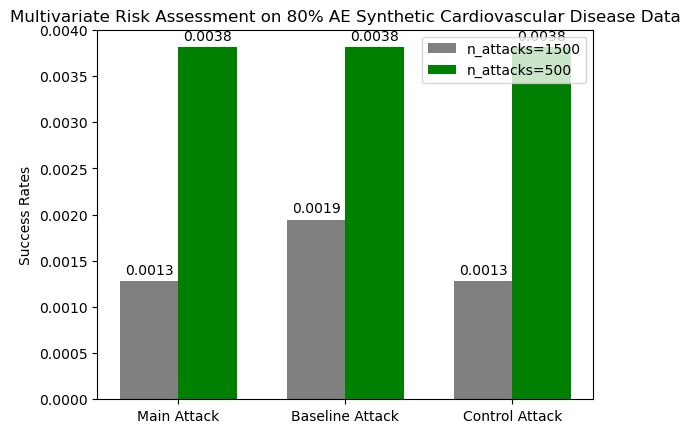

In [165]:
import matplotlib.pyplot as plt
import numpy as np

# Data setup
labels = ['Main Attack', 'Baseline Attack', 'Control Attack']
attacks_1500 = [0.001277, 0.001942, 0.001277]
attacks_500 = [0.003812, 0.003812, 0.003812]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, attacks_1500, width, label='n_attacks=1500', color='grey')
rects2 = ax.bar(x + width/2, attacks_500, width, label='n_attacks=500', color='green')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Success Rates')
ax.set_title('Multivariate Risk Assessment on 80% AE Synthetic Cardiovascular Disease Data')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3, fmt='%.4f')
ax.bar_label(rects2, padding=3, fmt='%.4f')

plt.show()


Multivariate Risk Assessment Success vs. Failure Rates via 1500 and 500 Attacks on 80% AE Synthetic Cardiovascular Disease


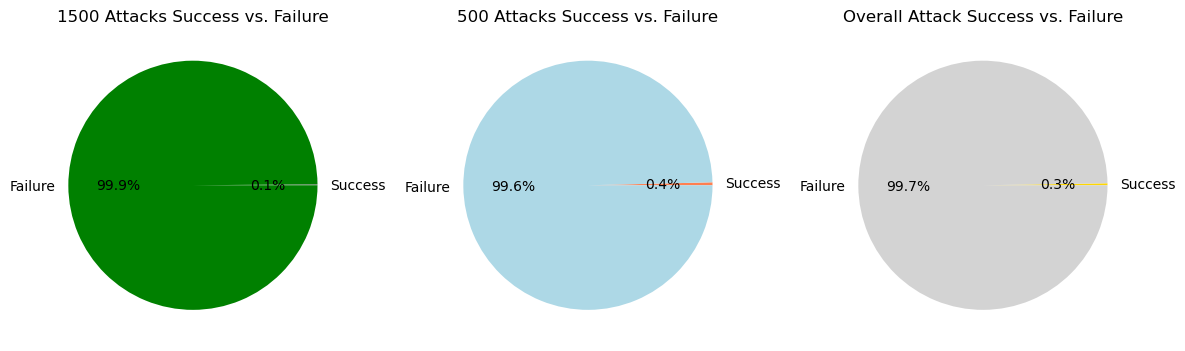

In [177]:
# Defining colors for each pie chart
colors_1500 = ['grey', 'green']  # Custom colors for the 1500 attacks chart
colors_500 = ['coral', 'lightblue']  # Custom colors for the 500 attacks chart
overall_colors = ['gold', 'gray']  # Custom colors for the overall chart

# Data preparation for overall success and failure rates
overall_success = 0.001277215360090744 + 0.0038121702307761206  # Sum of successes
overall_failure = 2 - overall_success  # Subtract from total attempts (2)

# Pie chart data
data_1500 = [0.001277215360090744, 1-0.001277215360090744]
data_500 = [0.0038121702307761206, 1-0.0038121702307761206]
data_overall = [overall_success, overall_failure]

# Labels for pie charts
labels = ['Success', 'Failure']

print('Multivariate Risk Assessment Success vs. Failure Rates via 1500 and 500 Attacks on 80% AE Synthetic Cardiovascular Disease')

# Plotting all pie charts side-by-side
plt.figure(figsize=(12, 9))

# Pie chart for 1500 attacks
plt.subplot(131)
plt.pie(data_1500, labels=labels, colors=colors_1500, autopct='%1.1f%%')
plt.title('1500 Attacks Success vs. Failure')

# Pie chart for 500 attacks
plt.subplot(132)
plt.pie(data_500, labels=labels, colors=colors_500, autopct='%1.1f%%')
plt.title('500 Attacks Success vs. Failure')

# Overall pie chart
plt.subplot(133)
plt.pie(data_overall, labels=labels, colors=colors_overall, autopct='%1.1f%%')
plt.title('Overall Attack Success vs. Failure')

plt.tight_layout()
plt.show()


# STEP 4: PRIVACY RISK ASSESSMENT VIA LINKABILITY ON 80% AE-SYNTHETIC CARDIO DISEASE DATASET

In [153]:
# Dynamically setting n_attacks based on the smallest dataset size
# Assuming you have similar datasets for original and control in the context of cardiovascular data
min_dataset_size = min(len(cardiovascular_train_dataframe), len(ae_synthetic_cardio_data_labels_df), len(control_cardio_dataframe))
n_attacks = min_dataset_size  # Or some fraction of the smallest size, if desired

# Choosing appropriate columns based on your ae_synthetic_cardio_data_labels_df information
aux_cols = [
    ['gender', 'smoke'],  # Attributes in dataset A
    ['age', 'cholesterol']  # Attributes in dataset B
]

linkability_eval = LinkabilityEvaluator(ori=cardiovascular_train_dataframe, 
                                              syn=ae_synthetic_cardio_data_labels_df, 
                                              control=control_cardio_dataframe,
                                              n_attacks=n_attacks,
                                              aux_cols=aux_cols,
                                              n_neighbors=10)

linkability_eval.evaluate(n_jobs=-1)  # Adjust 'n_jobs' as needed
linkability_risk1 = linkability_eval.risk()
print("Linkability Risk When the n_attacks = the smallest size of dataset and n_neighbors = 10 for AE Synthetic Cardiovascular Data:", linkability_risk1)


Linkability Risk When the n_attacks = the smallest size of dataset and n_neighbors = 10 for AE Synthetic Cardiovascular Data: PrivacyRisk(value=0.0003576558191407496, ci=(0.0, 0.001357082280095145))


In [163]:
link = linkability_eval.results()

print("Linkability Risk When the n_attacks = the smallest size of dataset and n_neighbors = 10 for AE Synthetic Cardiovascular Data:", linkability_risk1)
print("Successs rate of main attack:", link.attack_rate)
print("Successs rate of baseline attack:", link.baseline_rate)
print("Successs rate of control attack:", link.control_rate)

Linkability Risk When the n_attacks = the smallest size of dataset and n_neighbors = 10 for AE Synthetic Cardiovascular Data: PrivacyRisk(value=0.0003576558191407496, ci=(0.0, 0.001357082280095145))
Successs rate of main attack: SuccessRate(value=0.002065199716477122, error=0.0007393797375995098)
Successs rate of baseline attack: SuccessRate(value=0.001636745851325661, error=0.0006554038371771961)
Successs rate of control attack: SuccessRate(value=0.0017081548288509045, error=0.0006701362200731721)


In [164]:
# Dynamically setting n_attacks based on the smallest dataset size
# Assuming you have similar datasets for original and control in the context of cardiovascular data
min_dataset_size = min(len(cardiovascular_train_dataframe), len(ae_synthetic_cardio_data_labels_df), len(control_cardio_dataframe))
n_attacks = min_dataset_size  # Or some fraction of the smallest size, if desired

# Choosing appropriate columns based on your ae_synthetic_cardio_data_labels_df information
aux_cols = [
    ['gender', 'smoke'],  # Attributes in dataset A
    ['age', 'cholesterol']  # Attributes in dataset B
]

linkability_eval2 = LinkabilityEvaluator(ori=cardiovascular_train_dataframe, 
                                              syn=ae_synthetic_cardio_data_labels_df, 
                                              control=control_cardio_dataframe,
                                              n_attacks=n_attacks,
                                              aux_cols=aux_cols,
                                              n_neighbors=5)

linkability_eval2.evaluate(n_jobs=-1)  # Adjust 'n_jobs' as needed
linkability_risk1 = linkability_eval2.risk()
print("Linkability Risk When the n_attacks = the smallest size of dataset and n_neighbors = 5 for AE Synthetic Cardiovascular Data:", linkability_risk1)


Linkability Risk When the n_attacks = the smallest size of dataset and n_neighbors = 5 for AE Synthetic Cardiovascular Data: PrivacyRisk(value=0.0, ci=(0.0, 0.0004318583496833187))


C:\Users\Ede\anaconda3\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.0004942022109217651, baseline = 0.0005656111884470086. Analysis results cannot be trusted.
  self._sanity_check()


In [165]:
link = linkability_eval2.results()

print("Linkability Risk When the n_attacks = the smallest size of dataset and n_neighbors = 5 for AE Synthetic Cardiovascular Data:", linkability_risk1)
print("Successs rate of main attack:", link.attack_rate)
print("Successs rate of baseline attack:", link.baseline_rate)
print("Successs rate of control attack:", link.control_rate)

Linkability Risk When the n_attacks = the smallest size of dataset and n_neighbors = 5 for AE Synthetic Cardiovascular Data: PrivacyRisk(value=0.0, ci=(0.0, 0.0004318583496833187))
Successs rate of main attack: SuccessRate(value=0.0004942022109217651, error=0.0003416427871108698)
Successs rate of baseline attack: SuccessRate(value=0.0005656111884470086, error=0.0003691787255944275)
Successs rate of control attack: SuccessRate(value=0.0005656111884470086, error=0.0003691787255944275)


# GRAPHICAL REPRESENTATIONS OF THE ABOVE PRIVACY RISK NUMERICAL RESULTS

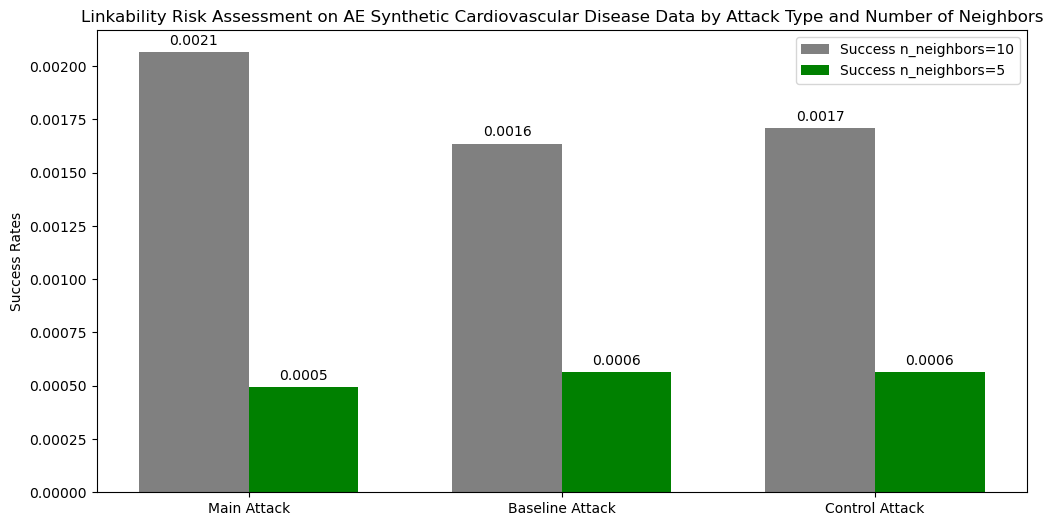

In [179]:
import matplotlib.pyplot as plt
import numpy as np

# Success rates data for n_neighbors=10 and n_neighbors=5
categories = ['Main Attack', 'Baseline Attack', 'Control Attack']
success_rates_10 = [0.0020652, 0.0016367, 0.0017082]  # Success rates for n_neighbors=10
success_rates_5 = [0.0004942, 0.0005656, 0.0005656]   # Success rates for n_neighbors=5
failure_rates_10 = [1 - rate for rate in success_rates_10]
failure_rates_5 = [1 - rate for rate in success_rates_5]

x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, success_rates_10, width, label='Success n_neighbors=10', color='grey')
rects2 = ax.bar(x + width/2, success_rates_5, width, label='Success n_neighbors=5', color='green')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Success Rates')
ax.set_title('Linkability Risk Assessment on AE Synthetic Cardiovascular Disease Data by Attack Type and Number of Neighbors')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

ax.bar_label(rects1, padding=3, fmt='%.4f')
ax.bar_label(rects2, padding=3, fmt='%.4f')

plt.show()


Linkability Risk Assessment Success/Overall Success vs. Failure Rates via 10 and 5 Neighbors on 80% AE Synthetic Cardiovascular Disease


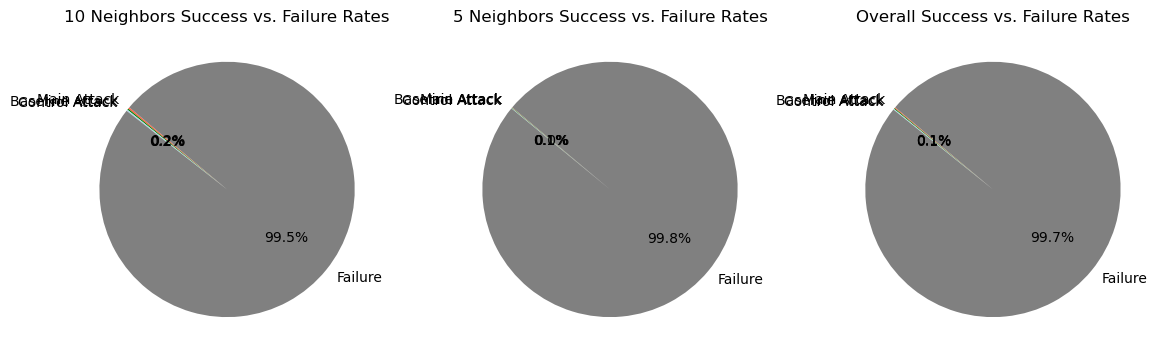

In [199]:
import matplotlib.pyplot as plt
print('Linkability Risk Assessment Success/Overall Success vs. Failure Rates via 10 and 5 Neighbors on 80% AE Synthetic Cardiovascular Disease')

# Success rates for 10 neighbors
success_rates_10_neighbors = {
    'Main Attack': 0.0021,
    'Baseline Attack': 0.0016,
    'Control Attack': 0.0017,
    'Failure': 1 - (0.0021 + 0.0016 + 0.0017)
}

# Success rates for 5 neighbors
success_rates_5_neighbors = {
    'Main Attack': 0.00049,
    'Baseline Attack': 0.00056,
    'Control Attack': 0.00056,
    'Failure': 1 - (0.00049 + 0.00056 + 0.00056)
}

# Combined success rates for all neighbors
overall_success_rates = {
    'Main Attack': 0.0013,
    'Baseline Attack': 0.0011,
    'Control Attack': 0.0011,
    'Failure': 1 - (0.0013 + 0.0011 + 0.0011)
}

# Colors for the pie charts
colors = ['tomato', 'green', 'lightblue', 'grey']  # Updated color codes to valid values

fig, axs = plt.subplots(1, 3, figsize=(14, 6))

axs[0].pie(success_rates_10_neighbors.values(), labels=success_rates_10_neighbors.keys(), colors=colors, autopct='%1.1f%%', startangle=140)
axs[0].set_title('10 Neighbors Success vs. Failure Rates')

axs[1].pie(success_rates_5_neighbors.values(), labels=success_rates_5_neighbors.keys(), colors=colors, autopct='%1.1f%%', startangle=140)
axs[1].set_title('5 Neighbors Success vs. Failure Rates')

axs[2].pie(overall_success_rates.values(), labels=overall_success_rates.keys(), colors=colors, autopct='%1.1f%%', startangle=140)
axs[2].set_title('Overall Success vs. Failure Rates')

plt.show()


# STEP 5: PRIVACY RISK ASSESSMENT VIA INFERENCE PER-COLUMN ON 80% AE-SYNTHETIC CARDIO DISEASE DATASET

C:\Users\Ede\anaconda3\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.26035147142528287, baseline = 0.46122492520379277. Analysis results cannot be trusted.
  self._sanity_check()
C:\Users\Ede\anaconda3\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.5599835411212045, baseline = 0.6066136034451886. Analysis results cannot be trusted.
  self._sanity_check()
C:\Users\Ede\anaconda3\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.5717660224128697, baseline = 0.6415325934550326. Analysis results cannot be trusted.
  self._sanity_check()
C:\Users\Ede\anaconda3\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.4743641770684376, 

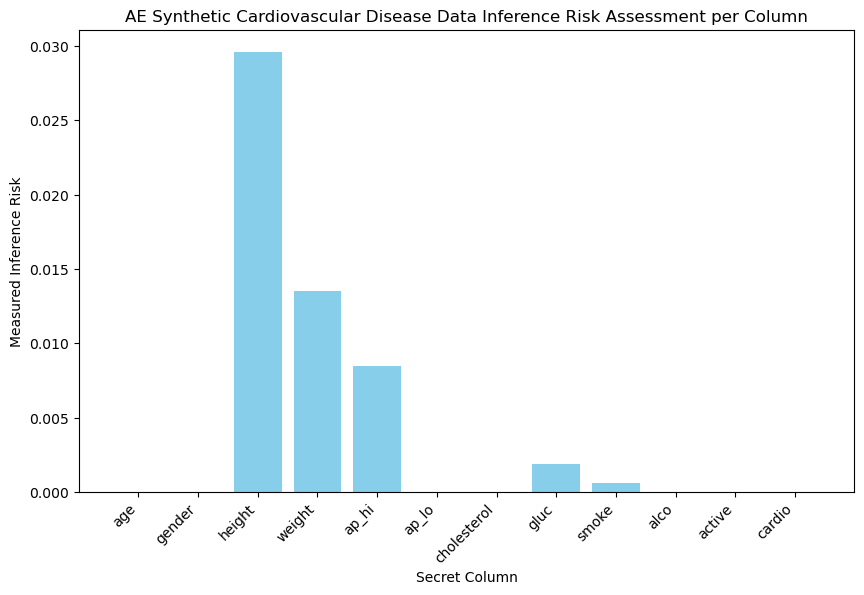

In [214]:
# Dynamically setting n_attacks based on the smallest dataset size
min_dataset_size = min(len(cardiovascular_train_dataframe), len(ae_synthetic_cardio_data_labels_df), len(control_cardio_dataframe))
n_attacks_attempted = min_dataset_size  # Or some fraction of the smallest size, if desired 


columns = cardiovascular_train_dataframe.columns
inference_results4 = []

for secret in columns:
    aux_cols = [col for col in columns if col != secret]
    
    evaluator_inferense4 = InferenceEvaluator(ori=cardiovascular_train_dataframe, 
                                   syn=ae_synthetic_cardio_data_labels_df, 
                                   control=control_cardio_dataframe,
                                   aux_cols=aux_cols,
                                   secret=secret,
                                   n_attacks=n_attacks_attempted) # Use the dynamically set value
    evaluator_inferense4.evaluate(n_jobs=-1)  # Adjust 'n_jobs' as needed
    inference_results4.append((secret,  evaluator_inferense4.risk()))

# Plotting the inference risks
import matplotlib.pyplot as plt

risks = [res[1].value for res in inference_results4]
columns = [res[0] for res in inference_results4]

plt.figure(figsize=(10, 6))
plt.bar(columns, risks, color='skyblue')
plt.xlabel('Secret Column')
plt.ylabel('Measured Inference Risk')
plt.xticks(rotation=45, ha='right')
plt.title('AE Synthetic Cardiovascular Disease Data Inference Risk Assessment per Column')
plt.show()

In [218]:
print('Inference Risk Assessment on AE Synthetic Cardiovascular Data when n_attempted_attacks = smallest dataset size used:', inference_results4)



Inference Risk Assessment on AE Synthetic Cardiovascular Data when n_attempted_attacks = smallest dataset size used: [('age', PrivacyRisk(value=0.0, ci=(0.0, 0.006324761029714701))), ('gender', PrivacyRisk(value=0.0, ci=(0.0, 0.005044508715823681))), ('height', PrivacyRisk(value=0.02960666880914854, ci=(0.004306572273536688, 0.05490676534476039))), ('weight', PrivacyRisk(value=0.013489236601371695, ci=(0.0, 0.0400311396302286))), ('ap_hi', PrivacyRisk(value=0.008486081990399155, ci=(0.0, 0.030449530734974046))), ('ap_lo', PrivacyRisk(value=0.0, ci=(0.0, 0.0))), ('cholesterol', PrivacyRisk(value=0.0, ci=(0.0, 0.00019399635480410872))), ('gluc', PrivacyRisk(value=0.001853392392865319, ci=(0.0, 0.017418549211721472))), ('smoke', PrivacyRisk(value=0.0005786233088247416, ci=(0.0, 0.00325743062713853))), ('alco', PrivacyRisk(value=0.0, ci=(0.0, 0.00019399635480410872))), ('active', PrivacyRisk(value=0.0, ci=(0.0, 0.021774893427995413))), ('cardio', PrivacyRisk(value=0.0, ci=(0.0, 0.0)))]


In [219]:
tells = evaluator_inferense4.results()

print("Inference Risk When n_attacks_attempted = min_dataset_size for AE Synthetic Cardiovascular Data:")
print("Successs rate of main attack:", tells.attack_rate)
print("Successs rate of baseline attack:", tells.baseline_rate)
print("Successs rate of control attack:", tells.control_rate)

Inference Risk When n_attacks_attempted = min_dataset_size for AE Synthetic Cardiovascular Data:
Successs rate of main attack: SuccessRate(value=0.5319198129537839, error=0.008264326516467848)
Successs rate of baseline attack: SuccessRate(value=0.4995001371573233, error=0.008281219299591353)
Successs rate of control attack: SuccessRate(value=0.5469871072116103, error=0.008244565896240173)


# GRAPHICAL REPRESENTATIONS OF THE ABOVE PRIVACY RISK NUMERICAL RESULTS

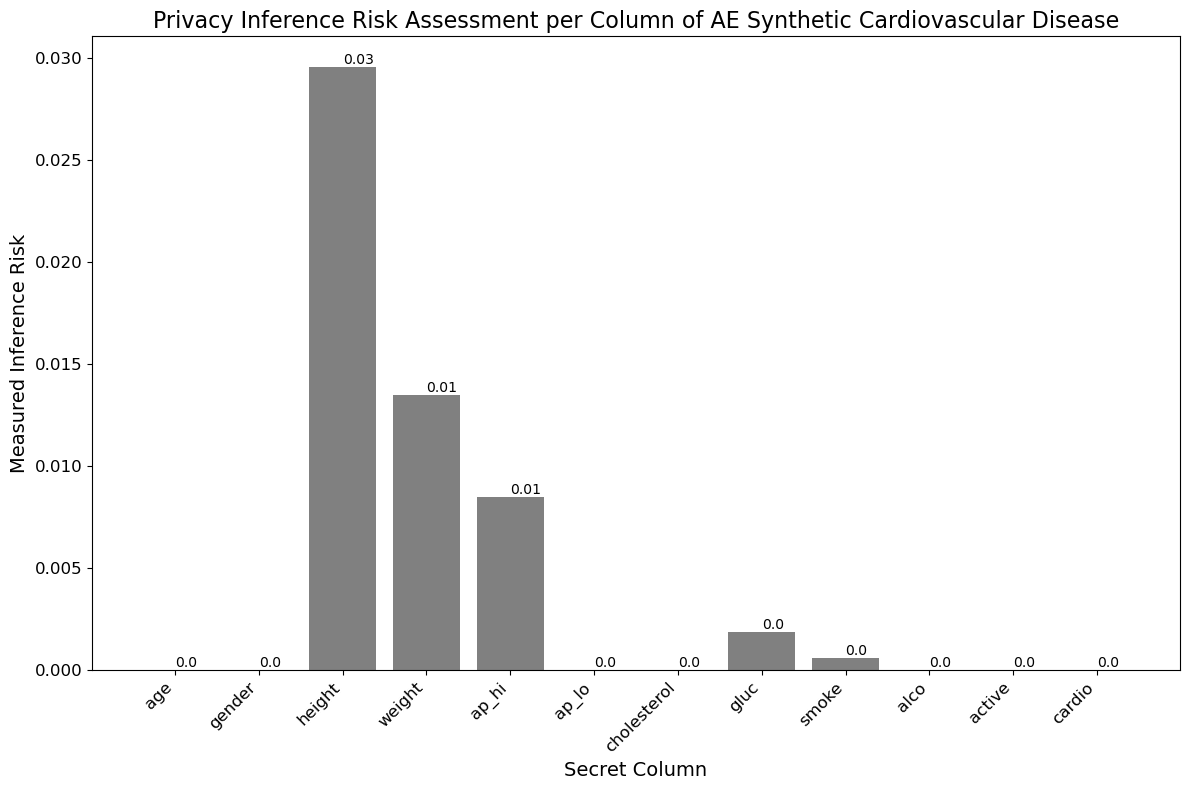

In [224]:
import matplotlib.pyplot as plt

# Extracting risk values and columns for plotting
risks = [res[1].value for res in inference_results4]
columns = [res[0] for res in inference_results4]

plt.figure(figsize=(12, 8))
bars = plt.bar(columns, risks, color='grey')

plt.xlabel('Secret Column', fontsize=14)
plt.ylabel('Measured Inference Risk', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Privacy Inference Risk Assessment per Column of AE Synthetic Cardiovascular Disease', fontsize=16)

# Adding the risk value above each bar for clarity
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval,2), va='bottom') # va: vertical alignment

plt.tight_layout()
plt.show()


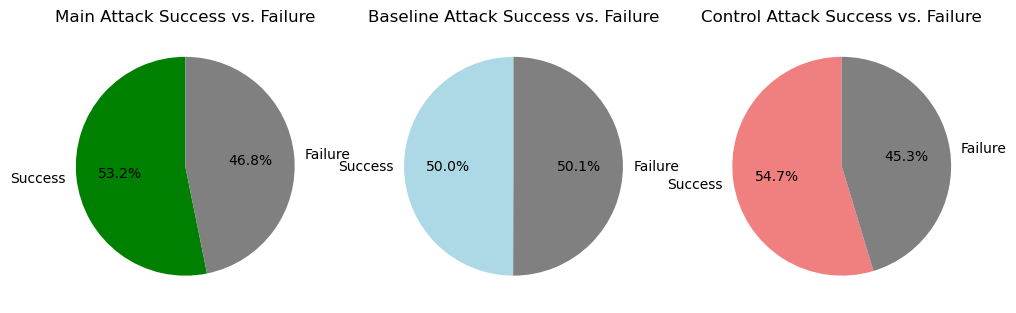

In [236]:
import matplotlib.pyplot as plt

# Success rates and failure for each attack based on provided data
attacks_data = {
    'Main Attack': 0.5319,
    'Baseline Attack': 0.4995,
    'Control Attack': 0.5469,
}

# Adding failure rates by calculating the complement to 1 for each
failure_rates = {key: 1 - value for key, value in attacks_data.items()}

# Colors for the pie chart
colors = ['green', 'lightblue', 'lightcoral']

# Create pie charts for each type of attack
fig, axs = plt.subplots(1, 3, figsize=(12, 8))

for i, (key, value) in enumerate(attacks_data.items()):
    axs[i].pie([value, failure_rates[key]], labels=['Success', 'Failure'], colors=[colors[i], 'gray'], autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'{key} Success vs. Failure')

plt.show()


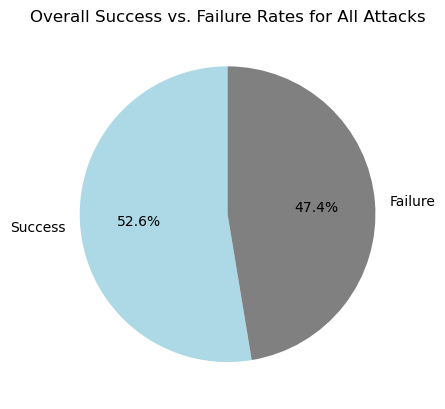

In [228]:
# Calculate the overall success rate combining all attacks
overall_success_rate = (0.5319 + 0.4995 + 0.5469) / 3
overall_failure_rate = 1 - overall_success_rate

# Success rates for combined attacks
overall_success = {
    'Success': overall_success_rate,
    'Failure': overall_failure_rate
}

# Define colors for the pie chart
colors = ['lightblue', 'grey']

# Plotting the pie chart for the combined success and failure rates
fig, ax = plt.subplots()
ax.pie(overall_success.values(), labels=overall_success.keys(), colors=colors, autopct='%1.1f%%', startangle=90)
ax.set_title('Overall Success vs. Failure Rates for All Attacks')

plt.show()
